## Module 3 Project: NYTimes articles & comments analysis

* Student name: Paul Raymond
* Student pace: Full time
* Instructor name: Brandon Lewis

__Objective__

My primary focus for my Module 3 Project will be executing various classification methods on a set of data from the New York Times. Additionally, I will integrate Time Series and NLP analysis into the workflow.

I've chosen a dataset provided by The New York Times that includes data on articles and comments written during Jan-April 2017 and Jan-April 2018.

I plan to measure whether features - numerical, categorical, text - can be used to accurately predict which comments are selected by NYTimes editors.

## Data analysis

### Load libraries and packages

__Import initial libraries and packages__

_Standard libraries and packages_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
plt.style.use('seaborn-colorblind')

In [3]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize

In [5]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, ADASYN  #reinstall
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from scipy.spatial.distance import euclidean as euc
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.
/Users/paulraymond/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [6]:
import datetime

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tsa.stattools import adfuller

In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import svm

In [9]:
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
from sklearn.pipeline import Pipeline

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [12]:
import glob

In [13]:
import itertools

In [14]:
import warnings
warnings.filterwarnings('ignore')

### Import files and compile the rows

I'll be working with the following files made available by the New York Times on Kaggle: 
<br>
<br> ArticlesJan2017
<br> ArticlesFeb2017
<br> ArticlesMarch2017
<br> ArticlesApril2017
<br> ArticlesJan2018
<br> ArticlesFeb2018
<br> ArticlesMarch2018
<br> ArticlesApril2018
<br> CommentsJan2017
<br> CommmentsFeb2017
<br> CommentsMarch2017
<br> CommentsApril2017
<br> CommentsJan2018
<br> CommentsFeb2018
<br> CommentsMarch2018
<br> CommentsApril2018

__Import articles data__

_Create loop to load each file in the Articles folder_

In [15]:
path = '/Users/paulraymond/Downloads/nyt-comments/Articles'
all_files = glob.glob(path + "/*")

files = []

for filename in all_files:
    df = pd.read_csv(filename, index_col = None, header=0)
    files.append(df)

_View first rows in dataframe_

In [16]:
articles = pd.concat(files, axis=0, ignore_index=True)
articles.head()

abstract                 articleID  articleWordCount  \
0      NaN  58927e0495d0e0392607e1b3              1129   
1      NaN  5893033d95d0e0392607e2d6              3082   
2      NaN  5893039595d0e0392607e2da               693   
3      NaN  5893109995d0e0392607e2ef              1049   
4      NaN  5893114495d0e0392607e2f1              1283   

                   byline documentType  \
0           By KEN BELSON      article   
1              By UNKNOWN      article   
2       By MANOHLA DARGIS      article   
3  By ALEXANDRA S. LEVINE      article   
4          By BONNIE TSUI      article   

                                            headline  \
0  N.F.L. vs. Politics Has Been Battle All Season...   
1                             Voice. Vice. Veracity.   
2                        A Stand-Up’s Downward Slide   
3            New York Today: A Groundhog Has Her Day   
4               A Swimmer’s Communion With the Ocean   

                                            keywords  multimedia  \
0  ['Football', 'Super Bowl', 'National Football ...           1   
1  ['Television', 'Home Box Office', 'Girls (TV P...           1   
2  ['Movies', 'The Comedian (Movie)', 'De Niro, R...           1   
3                    ['New York City', 'Groundhogs']           1   
4  ['Travel and Vacations', 'Swimming', 'Oceans a...           1   

        newDesk  printPage              pubDate   sectionName  \
0        Sports         12  2017-02-02 00:26:16  Pro Football   
1  Arts&Leisure          1  2017-02-02 10:00:24    Television   
2       Weekend          5  2017-02-02 10:01:53       Unknown   
3         Metro          0  2017-02-02 10:57:25       Unknown   
4        Travel          4  2017-02-02 11:00:03       Unknown   

                                             snippet              source  \
0  Despite the national tumult over immigration s...  The New York Times   
1  Our critics look at the impact of the HBO show...  The New York Times   
2  Joined by a cast that includes Edie Falco and ...  The New York Times   
3  Thursday: A meet-and-greet with Staten Island ...  The New York Times   
4  “We swam in that heaving body of aquamarine, a...  The New York Times   

  typeOfMaterial                                             webURL  
0           News  https://www.nytimes.com/2017/02/01/sports/supe...  
1           News  https://www.nytimes.com/2017/02/02/arts/televi...  
2         Review  https://www.nytimes.com/2017/02/02/movies/the-...  
3       briefing  https://www.nytimes.com/2017/02/02/nyregion/ne...  
4           News  https://www.nytimes.com/2017/02/02/travel/hawa...

__Import comments data__

_Create loop to import comment files_

In [17]:
path2 = '/Users/paulraymond/Downloads/nyt-comments/Comments'
all_files2 = glob.glob(path2 + "/*")

files2 = []

for filename in all_files2:
    df = pd.read_csv(filename, index_col = None, header=0)
    files2.append(df)

_View first rows in dataframe_

In [18]:
comments = pd.concat(files2, axis=0, ignore_index=True)
comments.head()

approveDate                 articleID  articleWordCount  \
0   1517529462  5a7258e410f40f00018bed7d             835.0   
1   1517529428  5a7258e410f40f00018bed7d             835.0   
2   1517529427  5a7258e410f40f00018bed7d             835.0   
3   1517529425  5a7258e410f40f00018bed7d             835.0   
4   1517529418  5a7258e410f40f00018bed7d             835.0   

                                         commentBody   commentID  \
0  The snake-filled heads comment made me think o...  25791250.0   
1                      She-devil reporting for duty!  25795675.0   
2                   XX is the new mark of the devil.  25792078.0   
3  "Courtland Sykes" should be writing for The On...  25791604.0   
4  I happen to descend for a few of them, because...  25795241.0   

   commentSequence commentTitle commentType    createDate  depth  ...  \
0       25791250.0        <br/>     comment  1.517508e+09    1.0  ...   
1       25795675.0        <br/>     comment  1.517527e+09    1.0  ...   
2       25792078.0        <br/>     comment  1.517511e+09    1.0  ...   
3       25791604.0        <br/>     comment  1.517510e+09    1.0  ...   
4       25795241.0        <br/>     comment  1.517525e+09    1.0  ...   

     status  timespeople trusted  typeOfMaterial  updateDate  userDisplayName  \
0  approved          1.0     0.0           Op-Ed  1517529462           Jennie   
1  approved          1.0     0.0           Op-Ed  1517529428  Nice White Lady   
2  approved          1.0     0.0           Op-Ed  1517529427      Stan Sutton   
3  approved          1.0     0.0           Op-Ed  1517529425      Phil Carson   
4  approved          1.0     0.0           Op-Ed  1517529418             Abby   

       userID            userLocation  userTitle  userURL  
0  79172841.0                      WA        NaN      NaN  
1  66376882.0                 Seattle        NaN      NaN  
2  27924638.0  Westchester County, NY        NaN      NaN  
3  31909107.0                  Denver        NaN      NaN  
4  55271958.0                  Tucson        NaN      NaN  

[5 rows x 34 columns]

__Add calculated columns__

The original datasets have many helpful features but I'd like to add calculations for word count, punctuation count, em-dash count, and stop word count. I believe these can provide better insights and improve model performance.

_Create new columns without values_

In [19]:
calc_cols = ['commentWordCount', 'stopWordCount', 'punctuationCount', 'emDashCount']
for col in calc_cols:
    comments[col] = None
original_cols = [col for col in comments.columns if col not in calc_cols] # delete later

_Create functions_

In [20]:
def word_count(comment):
    token = word_tokenize(comment)
    word_count = 0
    for item in token:
        if item not in string.punctuation:
            word_count += 1
    return word_count

In [21]:
def punc_count(comment):
    token = word_tokenize(comment)
    punc_count = 0
    for item in token:
        if item in string.punctuation:
            punc_count += 1
    return punc_count

def stopWord_count(comment):
    token = word_tokenize(comment)
    stopWord_count = 0
    for item in token:
        if item in stopwords.words('english'):
            stopWord_count += 1
    return stopWord_count

def emDash_count(comment):
    token = word_tokenize(comment)
    emDash_count = 0
    for item in token:
        if item in ['——', '--']:
            emDash_count += 1
    return emDash_count

_Apply functions to dataframe_

In [22]:
# comments.punctuationCount =  comments.commentBody.apply(punc_count)

In [23]:
# comments.commentWordCount = comments.commentBody.apply(word_count)

In [24]:
# # commnets.stopWordCount = comments.commentBody.apply(stopWord_count)
# for i, val in enumerate(comments['commentBody']):
#     token = word_tokenize(val)
#     stopWord_count = 0
#     for item in token:
#         if item in stopwords.words('english'):
#             stopWord_count +=1
#         comments['stopWordCount'][i] = stopWord_count

In [25]:
# comments.emDashCount = comments.commentBody.apply(emDash_count)

In [26]:
#save dataframe with current updates
# comments.to_csv('comments_v3')

_View first rows in dataframe_

In [27]:
# comments.head(50000)

The calculated columns were successfully added to the dataframe.

### Scrub and process data

In [28]:
# delete later

path  = '/Users/paulraymond/Documents/section1/dsc-3-final-project-online-ds-ft-021119/comments_v3'
reader = open(path)
comments = pd.read_csv(path, index_col=0)
comments.head()

approveDate                 articleID  articleWordCount  \
0   1517529462  5a7258e410f40f00018bed7d             835.0   
1   1517529428  5a7258e410f40f00018bed7d             835.0   
2   1517529427  5a7258e410f40f00018bed7d             835.0   
3   1517529425  5a7258e410f40f00018bed7d             835.0   
4   1517529418  5a7258e410f40f00018bed7d             835.0   

                                         commentBody   commentID  \
0  The snake-filled heads comment made me think o...  25791250.0   
1                      She-devil reporting for duty!  25795675.0   
2                   XX is the new mark of the devil.  25792078.0   
3  "Courtland Sykes" should be writing for The On...  25791604.0   
4  I happen to descend for a few of them, because...  25795241.0   

   commentSequence commentTitle commentType    createDate  depth  ...  \
0       25791250.0        <br/>     comment  1.517508e+09    1.0  ...   
1       25795675.0        <br/>     comment  1.517527e+09    1.0  ...   
2       25792078.0        <br/>     comment  1.517511e+09    1.0  ...   
3       25791604.0        <br/>     comment  1.517510e+09    1.0  ...   
4       25795241.0        <br/>     comment  1.517525e+09    1.0  ...   

   updateDate  userDisplayName      userID            userLocation userTitle  \
0  1517529462           Jennie  79172841.0                      WA       NaN   
1  1517529428  Nice White Lady  66376882.0                 Seattle       NaN   
2  1517529427      Stan Sutton  27924638.0  Westchester County, NY       NaN   
3  1517529425      Phil Carson  31909107.0                  Denver       NaN   
4  1517529418             Abby  55271958.0                  Tucson       NaN   

  userURL commentWordCount  stopWordCount  punctuationCount  emDashCount  
0     NaN               17            4.0                 7            0  
1     NaN                4            1.0                 1            0  
2     NaN                8            4.0                 1            0  
3     NaN               14            5.0                 2            0  
4     NaN               47           23.0                 7            0  

[5 rows x 38 columns]

Next, I'll work to scrub and process the data in order to complete exploratory data anlaysis, regression, and classification analysis.

__Check data set info__

_View data types for columns_

In [29]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8339 entries, 0 to 8338
Data columns (total 16 columns):
abstract            134 non-null object
articleID           8339 non-null object
articleWordCount    8339 non-null int64
byline              8339 non-null object
documentType        8339 non-null object
headline            8339 non-null object
keywords            8339 non-null object
multimedia          8339 non-null int64
newDesk             8339 non-null object
printPage           8339 non-null int64
pubDate             8339 non-null object
sectionName         8339 non-null object
snippet             8339 non-null object
source              8339 non-null object
typeOfMaterial      8339 non-null object
webURL              8339 non-null object
dtypes: int64(3), object(13)
memory usage: 1.0+ MB


In [30]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899975 entries, 0 to 1899974
Data columns (total 38 columns):
approveDate              int64
articleID                object
articleWordCount         float64
commentBody              object
commentID                float64
commentSequence          float64
commentTitle             object
commentType              object
createDate               float64
depth                    float64
editorsSelection         int64
inReplyTo                float64
newDesk                  object
parentID                 float64
parentUserDisplayName    object
permID                   object
picURL                   object
printPage                float64
recommendations          float64
recommendedFlag          float64
replyCount               float64
reportAbuseFlag          float64
sectionName              object
sharing                  int64
status                   object
timespeople              float64
trusted                  float64
typeOfMateri

_Convert calculated columns_

In [31]:
for col in calc_cols:
    try:
        comments[col] = comments[col].astype('int')
    except:
        pass

_Save dataframe to csv_

In [32]:
comments.to_csv('comments_v2')

In [33]:
## add comment

__Check for null values__

In [34]:
articles.isna().sum()

abstract            8205
articleID              0
articleWordCount       0
byline                 0
documentType           0
headline               0
keywords               0
multimedia             0
newDesk                0
printPage              0
pubDate                0
sectionName            0
snippet                0
source                 0
typeOfMaterial         0
webURL                 0
dtype: int64

In [35]:
comments.isna().sum()

approveDate                    0
articleID                      0
articleWordCount               0
commentBody                    0
commentID                      0
commentSequence                0
commentTitle               58645
commentType                    0
createDate                     0
depth                          0
editorsSelection               0
inReplyTo                      0
newDesk                        0
parentID                       0
parentUserDisplayName    1397733
permID                        22
picURL                         0
printPage                      0
recommendations                0
recommendedFlag          1899975
replyCount                     0
reportAbuseFlag          1899975
sectionName               149613
sharing                        0
status                         0
timespeople                    0
trusted                        0
typeOfMaterial                 0
updateDate                     0
userDisplayName              600
userID    

__Drop rows and columns__

_Drop articles columns_

In [36]:
articles.drop('abstract', axis=1, inplace=True)

_Drop comments columns_

In [37]:
comments.drop(['reportAbuseFlag','parentUserDisplayName', 'userTitle', 'userURL', 'updateDate', 'commentTitle'], axis=1, inplace=True)
comments.drop('recommendedFlag', axis=1, inplace=True)

__Replace NAs__

In [38]:
comments.userLocation = comments.userLocation.fillna('None')
comments.sectionName = comments.sectionName.fillna('None')
comments.userDisplayName = comments.userDisplayName.fillna('None')

__Convert necessary columns__

_Convert Articles comments to string format_

In [39]:
articles['multimedia'] = articles['multimedia'].astype('str')

_Convert Comments columns to string format_

In [40]:
comments['commentID'] = comments['commentID'].astype('str')
comments['parentID'] = comments['parentID'].astype('str')
comments['userID'] = comments['userID'].astype('str')
comments['inReplyTo'] = comments['inReplyTo'].astype('str')
comments['commentSequence'] = comments['commentSequence'].astype('str')
comments['editorsSelection'] = comments['editorsSelection'].astype('str')
comments['depth'] = comments['depth'].astype('str')
comments['sharing'] = comments['sharing'].astype('str')
comments['timespeople'] = comments['timespeople'].astype('str')
comments['trusted'] = comments['trusted'].astype('str')

_Create comment 'Day' column_

In [41]:
comments['createDate'] = comments['createDate'].astype(str)
comments['WeekDay'] = pd.to_datetime(comments['createDate'], unit='s')#convert to datetime later

In [42]:
comments['WeekDay'] = comments.WeekDay.dt.weekday
comments['WeekDay'] = comments['WeekDay'].astype('str')

__Check distribution of numerical columns__

Ideally, the data will have normal distributions to ensure better confidence in subsequent models. I'll do an initial check.

_Articles numerical distribution_

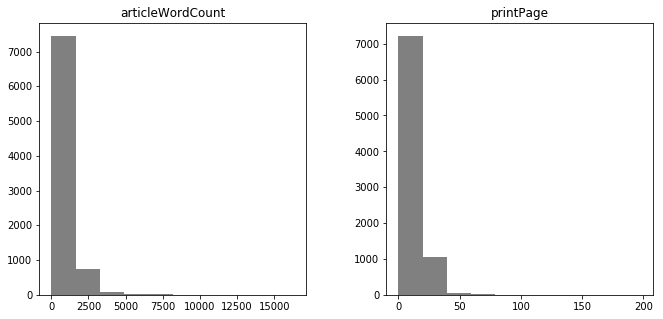

In [43]:
articles.hist(figsize=(11,5), grid=False, color='gray')
plt.show()

_Comments numerical distribution_

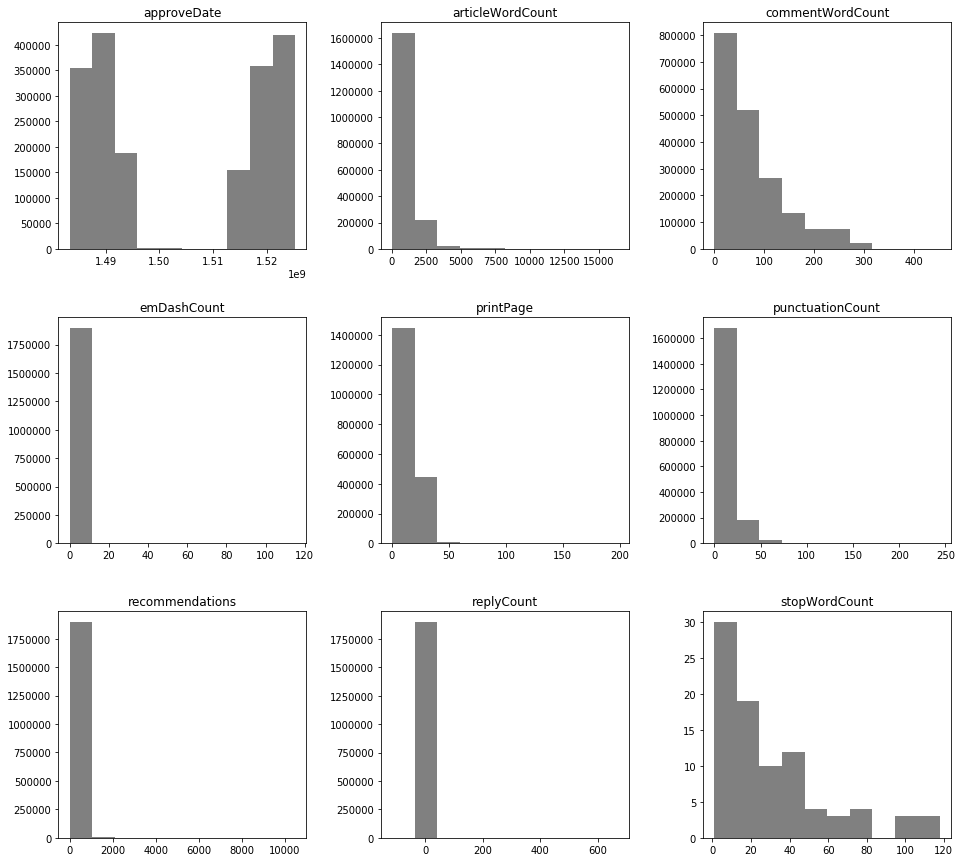

In [44]:
comments.hist(figsize=(16, 15), grid=False, color='gray')
plt.show()

None of these numerical columns are normally distributed. Each will need to be transformed and scaled for modeling.

__Check for multicolinearity__

_Plot covariance matrix for Articles_

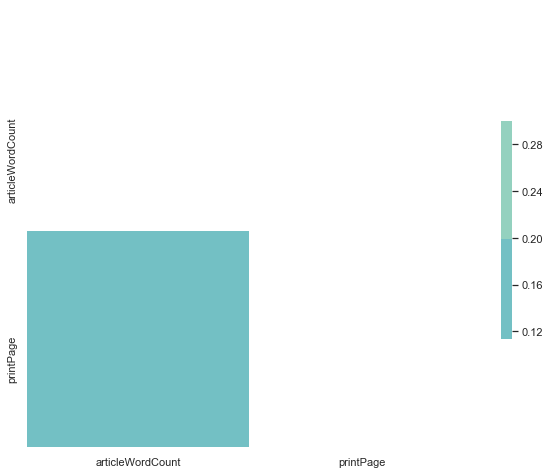

In [45]:
sns.set(style='white')
corr = articles.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10,8))

cmap = sns.color_palette("GnBu_d")

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

There is low correlation between the two Articles features.

_Plot covariance matrix for Comments_

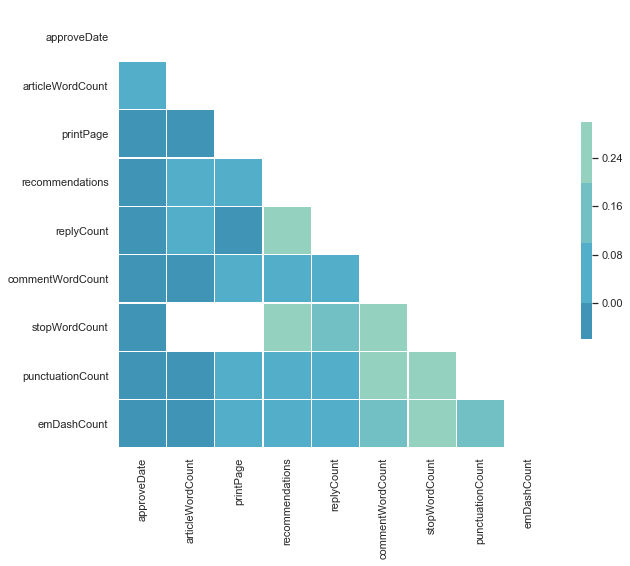

In [46]:
sns.set(style='white')
corr = comments.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10,8))

cmap = sns.color_palette("GnBu_d")

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.1, cbar_kws={'shrink': .5})
plt.show()

There are low correlation values among the Comments features.

__Create bins__

In [47]:
comments.describe()

approveDate  articleWordCount     printPage  recommendations  \
count  1.899975e+06      1.899975e+06  1.899975e+06     1.899975e+06   
mean   1.504211e+09      1.265181e+03  8.897808e+00     1.980795e+01   
std    1.606672e+07      8.398280e+02  1.064724e+01     1.041417e+02   
min    1.483318e+09      1.100000e+01  0.000000e+00     0.000000e+00   
25%    1.488636e+09      8.360000e+02  1.000000e+00     1.000000e+00   
50%    1.493591e+09      1.125000e+03  1.000000e+00     4.000000e+00   
75%    1.520390e+09      1.442000e+03  1.900000e+01     1.000000e+01   
max    1.525233e+09      1.633600e+04  1.980000e+02     1.047200e+04   

         replyCount  commentWordCount  stopWordCount  punctuationCount  \
count  1.899975e+06      1.899975e+06      88.000000      1.899975e+06   
mean   4.386637e-01      7.582526e+01      30.659091      1.117819e+01   
std    2.292060e+00      6.566603e+01      28.361333      1.176196e+01   
min   -1.150000e+02      0.000000e+00       1.000000      0.000000e+00   
25%    0.000000e+00      2.700000e+01       9.000000      3.000000e+00   
50%    0.000000e+00      5.500000e+01      20.500000      7.000000e+00   
75%    0.000000e+00      1.040000e+02      41.750000      1.500000e+01   
max    6.680000e+02      4.520000e+02     118.000000      2.440000e+02   

        emDashCount  
count  1.899975e+06  
mean   9.898551e-02  
std    6.554978e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.150000e+02

In [48]:
# comments.printPage

In [49]:
recomm_bins = [-1, 0, 5, 10, 20, 50, 100, 500, 1000, 1500]
comments['recommendations'] = pd.cut(comments['recommendations'], recomm_bins, include_lowest=True)

In [50]:
reply_bins = [-1, 0, 5, 10, 20, 50, 100, 500, 1000]
comments['replyCount'] = pd.cut(comments['replyCount'], reply_bins, include_lowest=True)

In [51]:
page_bins = [0 , 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
articles['printPage'] = pd.cut(articles['printPage'], page_bins, include_lowest=True)
comments['printPage'] = pd.cut(comments['printPage'], page_bins, include_lowest=True)

In [52]:
# consider adding bins for calculated columns

__Scale and transform data__

_Articles log transformation_

In [53]:
articles_log = pd.DataFrame()
articles_log['articleWordCount'] = np.log1p(articles['articleWordCount'])

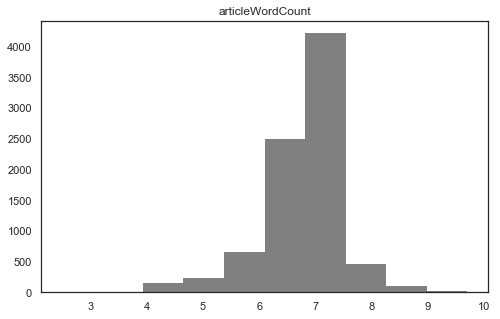

In [54]:
articles_log.hist(figsize=(8, 5), linewidth=0, grid=False, color='gray')
plt.show()

_Comments log transformation_

In [55]:
comments_log = pd.DataFrame()
for col in comments.describe().columns[1:]:
    comments_log[col] = np.log1p(comments[col])

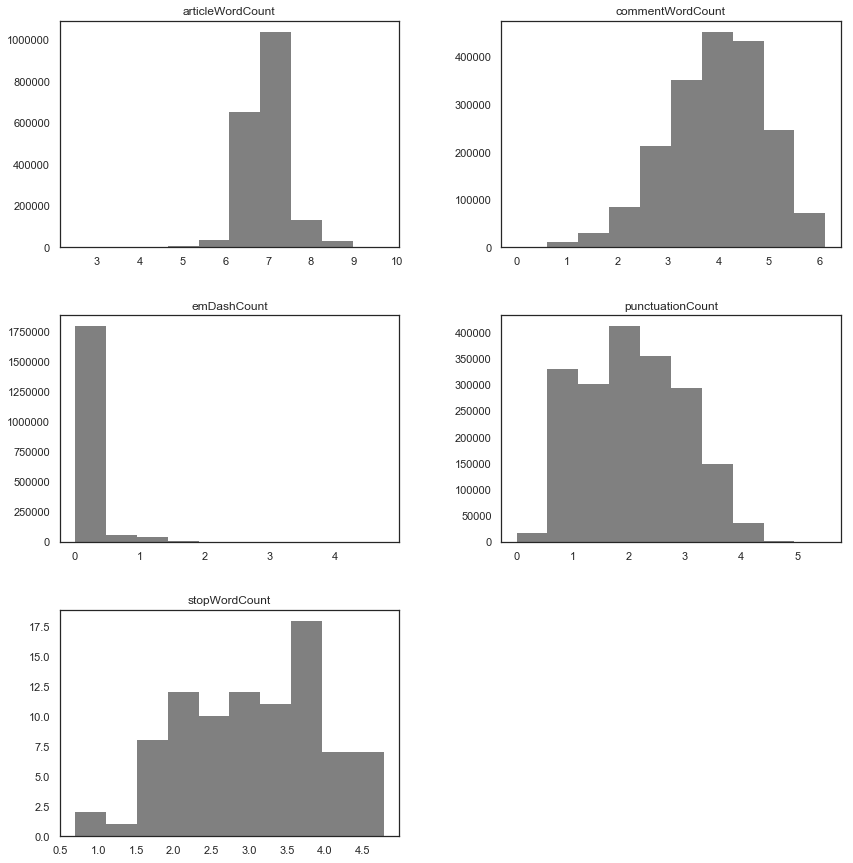

In [56]:
comments_log.hist(figsize=(14, 15), grid=False, linewidth=0, color='gray')
plt.show()

_Scale articles dataset_

In [57]:
articles_log_scale = pd.DataFrame()
articles_log_scale['articleWordCount'] = (articles_log['articleWordCount'] - articles_log['articleWordCount'].min())/(articles_log['articleWordCount'].max()-articles_log['articleWordCount'].min())

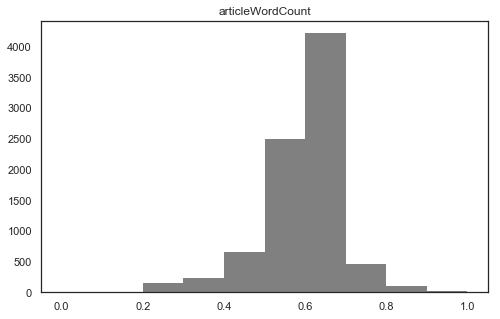

In [58]:
articles_log_scale.hist(figsize=(8,5), grid=False, linewidth=0, color='gray')
plt.show()

Most values greater than the mean but there is some normal distribution for 'articleWordCount' after transformation.

_Scale comments dataset_

In [59]:
comments_log_scale = pd.DataFrame()
for col in comments_log.columns:
    comments_log_scale[col] = (comments_log[col] - comments_log[col].min())/(comments_log[col].max() - comments_log[col].min())

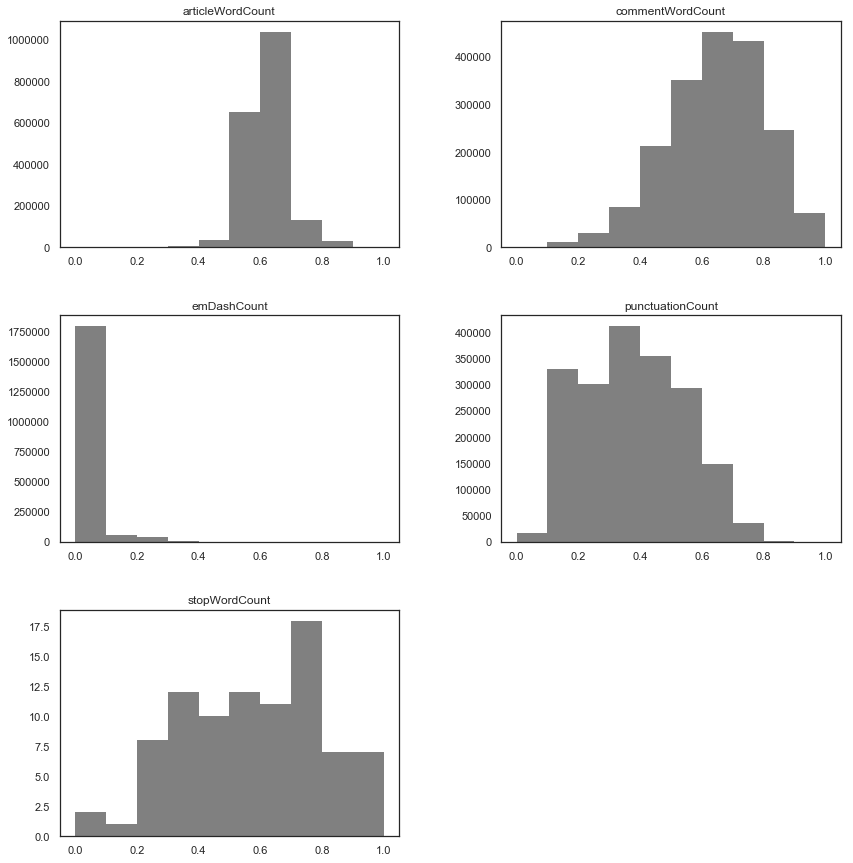

In [60]:
comments_log_scale.hist(figsize=(14, 15), grid=False, linewidth=0, color='gray')
plt.show()

The numerical columns for comments still don't have strong normal distribution but much better after transformation.

__One hot encoding__

_Create dataframe for Articles category data_

There are too many columns with too many distinct values for a complete label encoding. I'll choose what I believe are most insightful and reasonable.

In [61]:
articles_cat = articles[['documentType',
        'multimedia', 'newDesk', 'printPage',
       'sectionName', 'source', 'typeOfMaterial']]

_One hot encode articles data_

In [62]:
articles_one_hot = pd.get_dummies(articles_cat)

In [63]:
articles_one_hot.head()

documentType_article  documentType_blogpost  multimedia_0  multimedia_1  \
0                     1                      0             0             1   
1                     1                      0             0             1   
2                     1                      0             0             1   
3                     1                      0             0             1   
4                     1                      0             0             1   

   multimedia_2  multimedia_28  multimedia_3  multimedia_31  multimedia_35  \
0             0              0             0              0              0   
1             0              0             0              0              0   
2             0              0             0              0              0   
3             0              0             0              0              0   
4             0              0             0              0              0   

   multimedia_38  ...  typeOfMaterial_Editorial  typeOfMaterial_Interview  \
0              0  ...                         0                         0   
1              0  ...                         0                         0   
2              0  ...                         0                         0   
3              0  ...                         0                         0   
4              0  ...                         0                         0   

   typeOfMaterial_Letter  typeOfMaterial_News  typeOfMaterial_News Analysis  \
0                      0                    1                             0   
1                      0                    1                             0   
2                      0                    0                             0   
3                      0                    0                             0   
4                      0                    1                             0   

   typeOfMaterial_Obituary (Obit)  typeOfMaterial_Op-Ed  \
0                               0                     0   
1                               0                     0   
2                               0                     0   
3                               0                     0   
4                               0                     0   

   typeOfMaterial_Question  typeOfMaterial_Review  typeOfMaterial_briefing  
0                        0                      0                        0  
1                        0                      0                        0  
2                        0                      1                        0  
3                        0                      0                        1  
4                        0                      0                        0  

[5 rows x 164 columns]

_Create dataframe for Comments category data_

_Select columns_

In [64]:
comments_cat = comments[['commentType',
       'newDesk', 'printPage',
       'sectionName', 'status','trusted',
       'typeOfMaterial', 'WeekDay']]

_One hot encode comments data_

In [65]:
comments_one_hot = pd.get_dummies(comments_cat)

In [66]:
comments_one_hot.head()

commentType_comment  commentType_reporterReply  commentType_userReply  \
0                    1                          0                      0   
1                    1                          0                      0   
2                    1                          0                      0   
3                    1                          0                      0   
4                    1                          0                      0   

   newDesk_Arts&Leisure  newDesk_BookReview  newDesk_Business  \
0                     0                   0                 0   
1                     0                   0                 0   
2                     0                   0                 0   
3                     0                   0                 0   
4                     0                   0                 0   

   newDesk_Climate  newDesk_Culture  newDesk_Dining  newDesk_EdLife  ...  \
0                0                0               0               0  ...   
1                0                0               0               0  ...   
2                0                0               0               0  ...   
3                0                0               0               0  ...   
4                0                0               0               0  ...   

   typeOfMaterial_Question  typeOfMaterial_Review  typeOfMaterial_briefing  \
0                        0                      0                        0   
1                        0                      0                        0   
2                        0                      0                        0   
3                        0                      0                        0   
4                        0                      0                        0   

   WeekDay_0  WeekDay_1  WeekDay_2  WeekDay_3  WeekDay_4  WeekDay_5  WeekDay_6  
0          0          0          0          1          0          0          0  
1          0          0          0          1          0          0          0  
2          0          0          0          1          0          0          0  
3          0          0          0          1          0          0          0  
4          0          0          0          1          0          0          0  

[5 rows x 144 columns]

__Combine dataframes__

In [67]:
articles_df = pd.concat([articles_log_scale, articles_one_hot], axis=1)

In [68]:
comments_df = pd.concat([comments_log_scale, comments_one_hot], axis=1)

In [69]:
comments_df.head()

articleWordCount  commentWordCount  stopWordCount  punctuationCount  \
0          0.588076          0.472600       0.224253          0.377994   
1          0.588076          0.263157       0.000000          0.125998   
2          0.588076          0.359265       0.224253          0.125998   
3          0.588076          0.442789       0.268874          0.199702   
4          0.588076          0.632974       0.608155          0.377994   

   emDashCount  commentType_comment  commentType_reporterReply  \
0          0.0                    1                          0   
1          0.0                    1                          0   
2          0.0                    1                          0   
3          0.0                    1                          0   
4          0.0                    1                          0   

   commentType_userReply  newDesk_Arts&Leisure  newDesk_BookReview  ...  \
0                      0                     0                   0  ...   
1                      0                     0                   0  ...   
2                      0                     0                   0  ...   
3                      0                     0                   0  ...   
4                      0                     0                   0  ...   

   typeOfMaterial_Question  typeOfMaterial_Review  typeOfMaterial_briefing  \
0                        0                      0                        0   
1                        0                      0                        0   
2                        0                      0                        0   
3                        0                      0                        0   
4                        0                      0                        0   

   WeekDay_0  WeekDay_1  WeekDay_2  WeekDay_3  WeekDay_4  WeekDay_5  WeekDay_6  
0          0          0          0          1          0          0          0  
1          0          0          0          1          0          0          0  
2          0          0          0          1          0          0          0  
3          0          0          0          1          0          0          0  
4          0          0          0          1          0          0          0  

[5 rows x 149 columns]

### Exploratory data analysis

#### EDA processing

__View the columns and row info__

In [70]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8339 entries, 0 to 8338
Columns: 165 entries, articleWordCount to typeOfMaterial_briefing
dtypes: float64(1), uint8(164)
memory usage: 1.4 MB


In [71]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899975 entries, 0 to 1899974
Columns: 149 entries, articleWordCount to WeekDay_6
dtypes: float64(5), uint8(144)
memory usage: 347.9 MB


__View info on numerical columns__

In [72]:
articles_df.describe()

articleWordCount  documentType_article  documentType_blogpost  \
count       8339.000000           8339.000000            8339.000000   
mean           0.598130              0.983931               0.016069   
std            0.097778              0.125749               0.125749   
min            0.000000              0.000000               0.000000   
25%            0.569761              1.000000               0.000000   
50%            0.614140              1.000000               0.000000   
75%            0.651739              1.000000               0.000000   
max            1.000000              1.000000               1.000000   

       multimedia_0  multimedia_1  multimedia_2  multimedia_28  multimedia_3  \
count   8339.000000   8339.000000   8339.000000    8339.000000   8339.000000   
mean       0.036815      0.357357      0.001919       0.000120      0.203022   
std        0.188319      0.479250      0.043763       0.010951      0.402273   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%        0.000000      0.000000      0.000000       0.000000      0.000000   
50%        0.000000      0.000000      0.000000       0.000000      0.000000   
75%        0.000000      1.000000      0.000000       0.000000      0.000000   
max        1.000000      1.000000      1.000000       1.000000      1.000000   

       multimedia_31  multimedia_35  ...  typeOfMaterial_Editorial  \
count    8339.000000    8339.000000  ...               8339.000000   
mean        0.000120       0.000120  ...                  0.031179   
std         0.010951       0.010951  ...                  0.173811   
min         0.000000       0.000000  ...                  0.000000   
25%         0.000000       0.000000  ...                  0.000000   
50%         0.000000       0.000000  ...                  0.000000   
75%         0.000000       0.000000  ...                  0.000000   
max         1.000000       1.000000  ...                  1.000000   

       typeOfMaterial_Interview  typeOfMaterial_Letter  typeOfMaterial_News  \
count               8339.000000            8339.000000          8339.000000   
mean                   0.000120               0.001079             0.671064   
std                    0.010951               0.032836             0.469855   
min                    0.000000               0.000000             0.000000   
25%                    0.000000               0.000000             0.000000   
50%                    0.000000               0.000000             1.000000   
75%                    0.000000               0.000000             1.000000   
max                    1.000000               1.000000             1.000000   

       typeOfMaterial_News Analysis  typeOfMaterial_Obituary (Obit)  \
count                   8339.000000                     8339.000000   
mean                       0.005636                        0.002878   
std                        0.074867                        0.053573   
min                        0.000000                        0.000000   
25%                        0.000000                        0.000000   
50%                        0.000000                        0.000000   
75%                        0.000000                        0.000000   
max                        1.000000                        1.000000   

       typeOfMaterial_Op-Ed  typeOfMaterial_Question  typeOfMaterial_Review  \
count           8339.000000              8339.000000            8339.000000   
mean               0.179518                 0.001799               0.053604   
std                0.383808                 0.042376               0.225247   
min                0.000000                 0.000000               0.000000   
25%                0.000000                 0.000000               0.000000   
50%                0.000000                 0.000000               0.000000   
75%                0.000000                 0.000000               0.000000   
max                1.0

In [73]:
comments_df.describe()

articleWordCount  commentWordCount  stopWordCount  punctuationCount  \
count      1.899975e+06      1.899975e+06      88.000000      1.899975e+06   
mean       6.282626e-01      6.464880e-01       0.576901      3.852976e-01   
std        6.622960e-02      1.551266e-01       0.233494      1.592763e-01   
min        0.000000e+00      0.000000e+00       0.000000      0.000000e+00   
25%        5.882417e-01      5.448436e-01       0.393893      2.519959e-01   
50%        6.293436e-01      6.581790e-01       0.581167      3.779938e-01   
75%        6.637176e-01      7.609618e-01       0.749336      5.039917e-01   
max        1.000000e+00      1.000000e+00       1.000000      1.000000e+00   

        emDashCount  commentType_comment  commentType_reporterReply  \
count  1.899975e+06         1.899975e+06               1.899975e+06   
mean   1.080243e-02         7.355239e-01               1.568442e-04   
std    4.849331e-02         4.410540e-01               1.252277e-02   
min    0.000000e+00         0.000000e+00               0.000000e+00   
25%    0.000000e+00         0.000000e+00               0.000000e+00   
50%    0.000000e+00         1.000000e+00               0.000000e+00   
75%    0.000000e+00         1.000000e+00               0.000000e+00   
max    1.000000e+00         1.000000e+00               1.000000e+00   

       commentType_userReply  newDesk_Arts&Leisure  newDesk_BookReview  ...  \
count           1.899975e+06          1.899975e+06        1.899975e+06  ...   
mean            2.643193e-01          2.920038e-03        1.358965e-03  ...   
std             4.409702e-01          5.395844e-02        3.683910e-02  ...   
min             0.000000e+00          0.000000e+00        0.000000e+00  ...   
25%             0.000000e+00          0.000000e+00        0.000000e+00  ...   
50%             0.000000e+00          0.000000e+00        0.000000e+00  ...   
75%             1.000000e+00          0.000000e+00        0.000000e+00  ...   
max             1.000000e+00          1.000000e+00        1.000000e+00  ...   

       typeOfMaterial_Question  typeOfMaterial_Review  \
count             1.899975e+06           1.899975e+06   
mean              3.405308e-04           7.254306e-03   
std               1.845034e-02           8.486274e-02   
min               0.000000e+00           0.000000e+00   
25%               0.000000e+00           0.000000e+00   
50%               0.000000e+00           0.000000e+00   
75%               0.000000e+00           0.000000e+00   
max               1.000000e+00           1.000000e+00   

       typeOfMaterial_briefing     WeekDay_0     WeekDay_1     WeekDay_2  \
count             1.899975e+06  1.899975e+06  1.899975e+06  1.899975e+06   
mean              2.615298e-03  1.436666e-01  1.700549e-01  1.566231e-01   
std               5.107308e-02  3.507515e-01  3.756811e-01  3.634452e-01   
min               0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%               0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%               0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%               0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max               1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

          WeekDay_3     WeekDay_4     WeekDay_5     WeekDay_6  
count  1.899975e+06  1.899975e+06  1.899975e+06  1.899975e+06  
mean   1.609416e-01  1.726523e-01  9.811655e-02  9.794497e-02  
std    3.674772e-01  3.779465e-01  2.974723e-01  2.972403e-01  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  

[8 rows x 149 columns]

__Check for multicolinearity__

_Plot full Articles covariance plot_

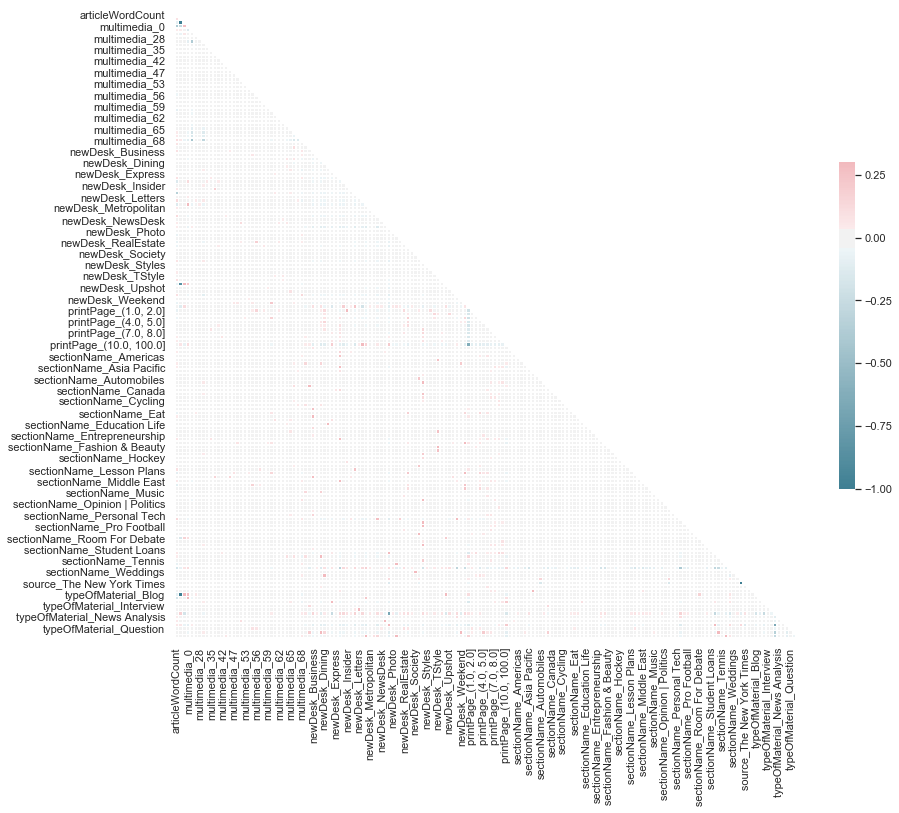

In [74]:
sns.set(style='white')
corr = articles_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(14,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

In [75]:
# find pairs with r greater than .8
col_list = []
for col in corr.columns:
    for row in corr.index:
        if corr[col][row] <= -.8 or corr[col][row] >= .8:
            col_list.append(col)

In [76]:
elim_df = pd.value_counts(col_list).to_frame().reset_index()
# elim_df

_Drop features with more than 1 multicolinear instances_

In [77]:
mc_art_cols = list(elim_df['index'][:18])
articles_df.drop(mc_art_cols, axis=1, inplace=True)

_Plot full Comments covaraince plot_

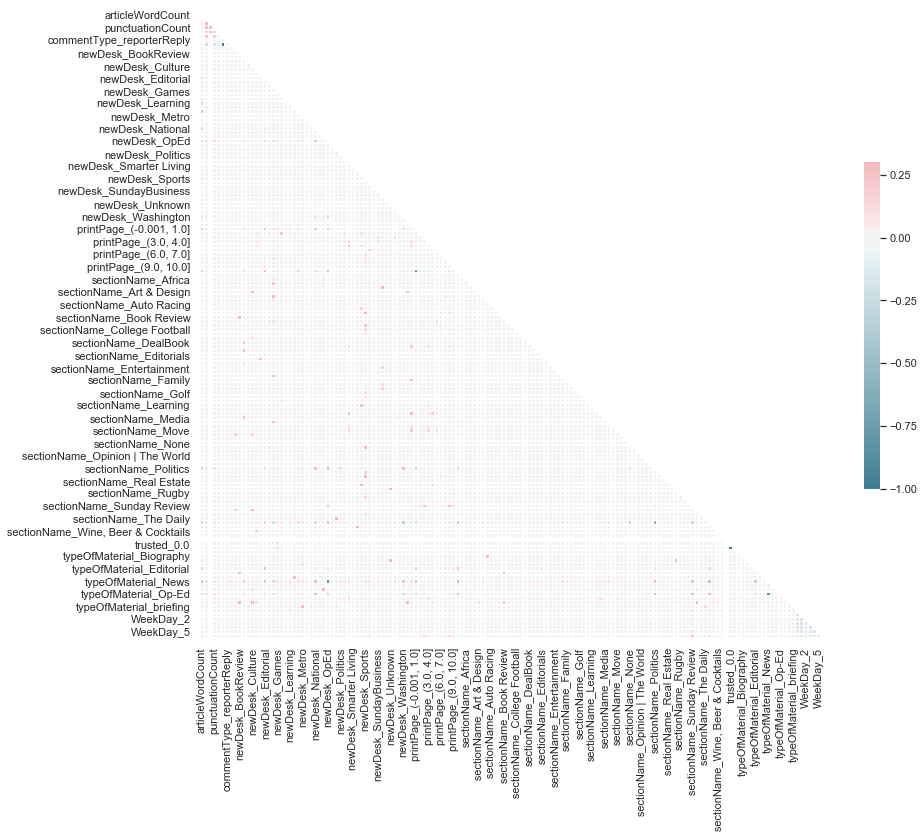

In [78]:
sns.set(style='white')
corr = comments_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(14,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

_Find pairs with r greater than .8_

In [79]:
col_list = []
for col in corr.columns:
    for row in corr.index:
        if corr[col][row] <= -.8 or corr[col][row] >= .8:
            col_list.append(col)

_Drop columns with more than 2 instances of high correlation_

In [80]:
elim_df = pd.value_counts(col_list).to_frame().reset_index()
elim_df.head(24)

index  0
0             punctuationCount  3
1          typeOfMaterial_News  3
2                 newDesk_OpEd  3
3             commentWordCount  3
4                stopWordCount  3
5         typeOfMaterial_Op-Ed  3
6              newDesk_Letters  2
7   sectionName_Education Life  2
8        typeOfMaterial_Letter  2
9      newDesk_SpecialSections  2
10              newDesk_EdLife  2
11                 trusted_0.0  2
12       commentType_userReply  2
13             newDesk_Society  2
14       sectionName_The Daily  2
15     sectionName_Book Review  2
16          newDesk_BookReview  2
17                 trusted_1.0  2
18        sectionName_Weddings  2
19    typeOfMaterial_Editorial  2
20         commentType_comment  2
21           newDesk_Editorial  2
22      sectionName_Retirement  2
23            newDesk_Podcasts  2

I'll drop these columns except commentWordCount and stopWordCount which could be inishgtful for modeling.

In [81]:
mc_com_cols = list(elim_df['index'][:24])

In [82]:
mc_com_cols.remove('commentWordCount')
mc_com_cols.remove('stopWordCount')

In [83]:
comments_df.drop(mc_com_cols, axis=1, inplace=True)

I'll next look into some initial exploratory data plots.

####  EDA plots

_Articles breakdown by type of material_

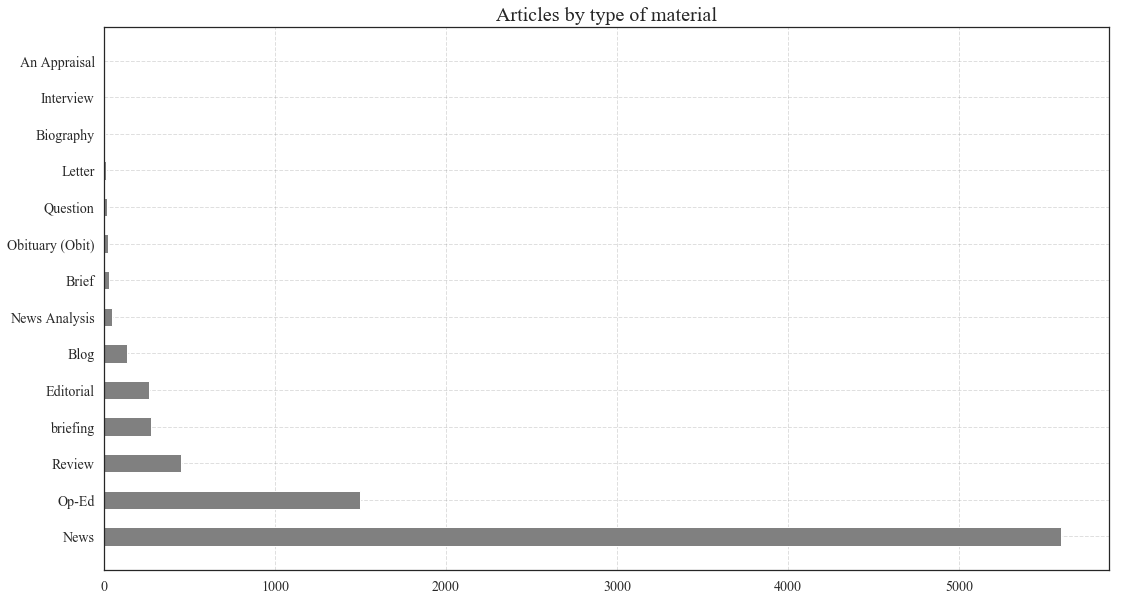

In [84]:
material_articles = articles.groupby('typeOfMaterial')['articleID'].count().sort_values(ascending=False)
plt.figure(figsize=(18,10))
plt.barh(material_articles.index, material_articles, align='center', height=0.5, color='gray')
plt.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
plt.title('Articles by type of material', fontname = 'Times New Roman', fontsize=20)
plt.yticks(fontname = 'Times New Roman', fontsize=14)
plt.xticks(fontname = 'Times New Roman', fontsize=14)
plt.show()

_Comments breakdown by type of material_

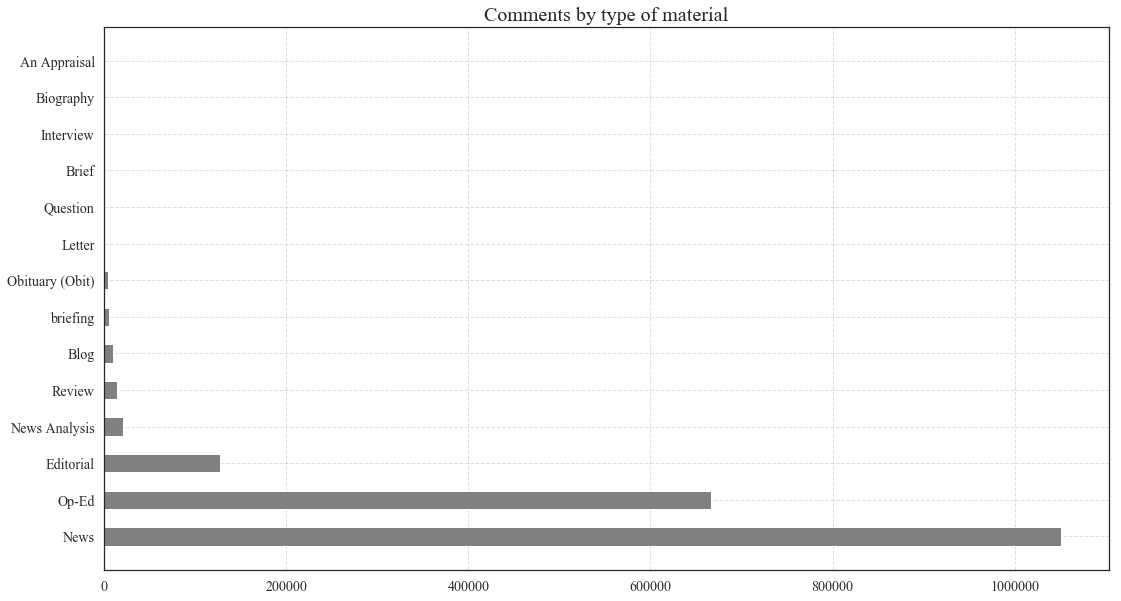

In [85]:
material_comments = comments.groupby('typeOfMaterial')['commentID'].count().sort_values(ascending=False)
plt.figure(figsize=(18,10))
plt.barh(material_comments.index, material_comments, align='center', height=0.5, color='gray')
plt.grid(True, linestyle= '--', which='major', color='grey', alpha=.25)
plt.title('Comments by type of material', fontname = 'Times New Roman', fontsize=20)
plt.yticks(fontname = 'Times New Roman', fontsize=14)
plt.xticks(fontname = 'Times New Roman', fontsize=14)
plt.show()

There appears to be more comments submitted per Op-Eds than ratio for any other main category — what I would expect.

_Articles breakdown by category_

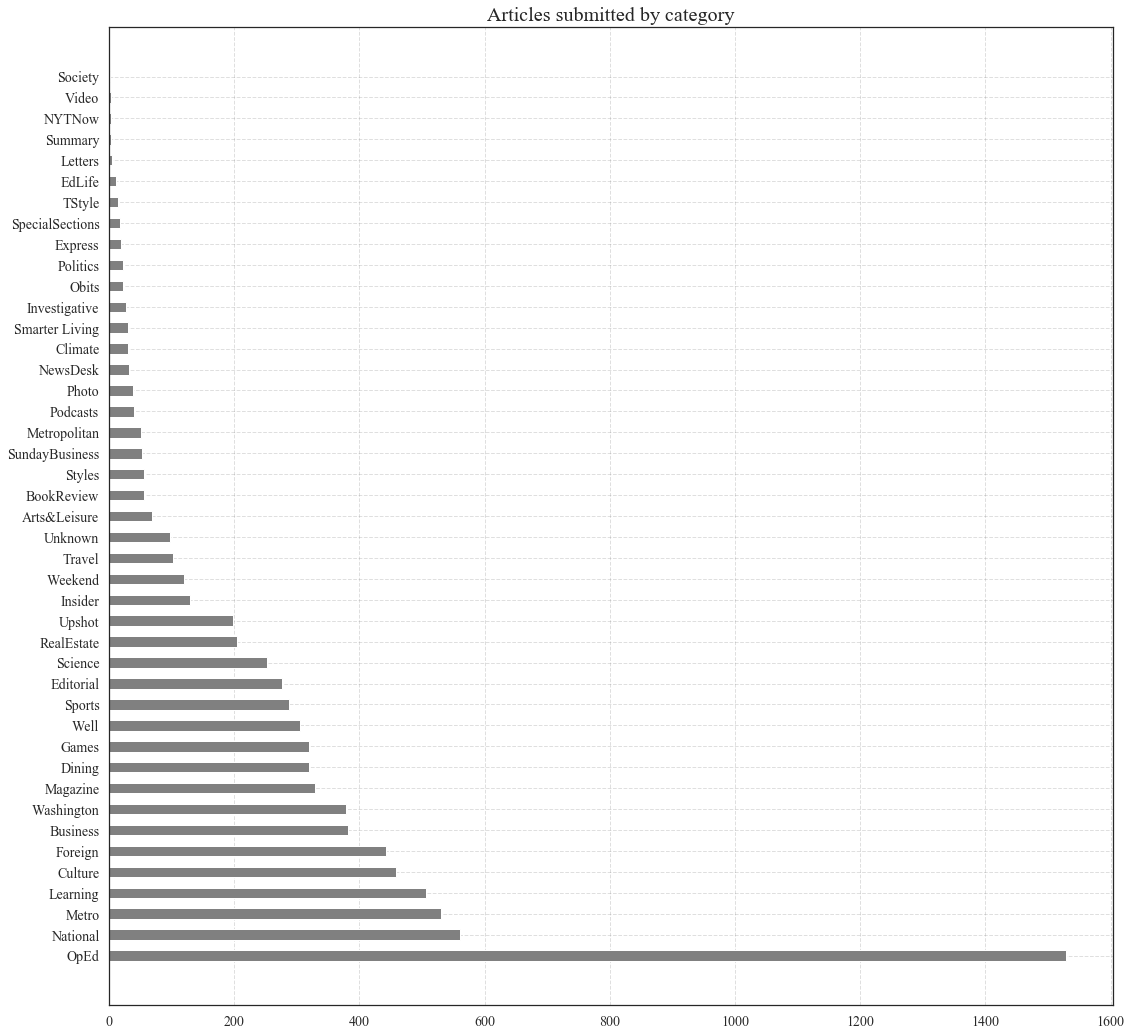

In [86]:
category_articles = articles.groupby('newDesk')['articleID'].count().sort_values(ascending=False)
plt.figure(figsize=(18,18))
plt.barh(category_articles.index, category_articles, align='center', height=0.5, color='gray')
plt.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
plt.title('Articles submitted by category', fontname = 'Times New Roman', fontsize=20)
plt.yticks(fontname = 'Times New Roman', fontsize=14)
plt.xticks(fontname = 'Times New Roman', fontsize=14)
plt.show()

In [87]:
category_articles[:5]

newDesk
OpEd        1528
National     560
Metro        530
Learning     507
Culture      458
Name: articleID, dtype: int64

_Comments breakdown by category_

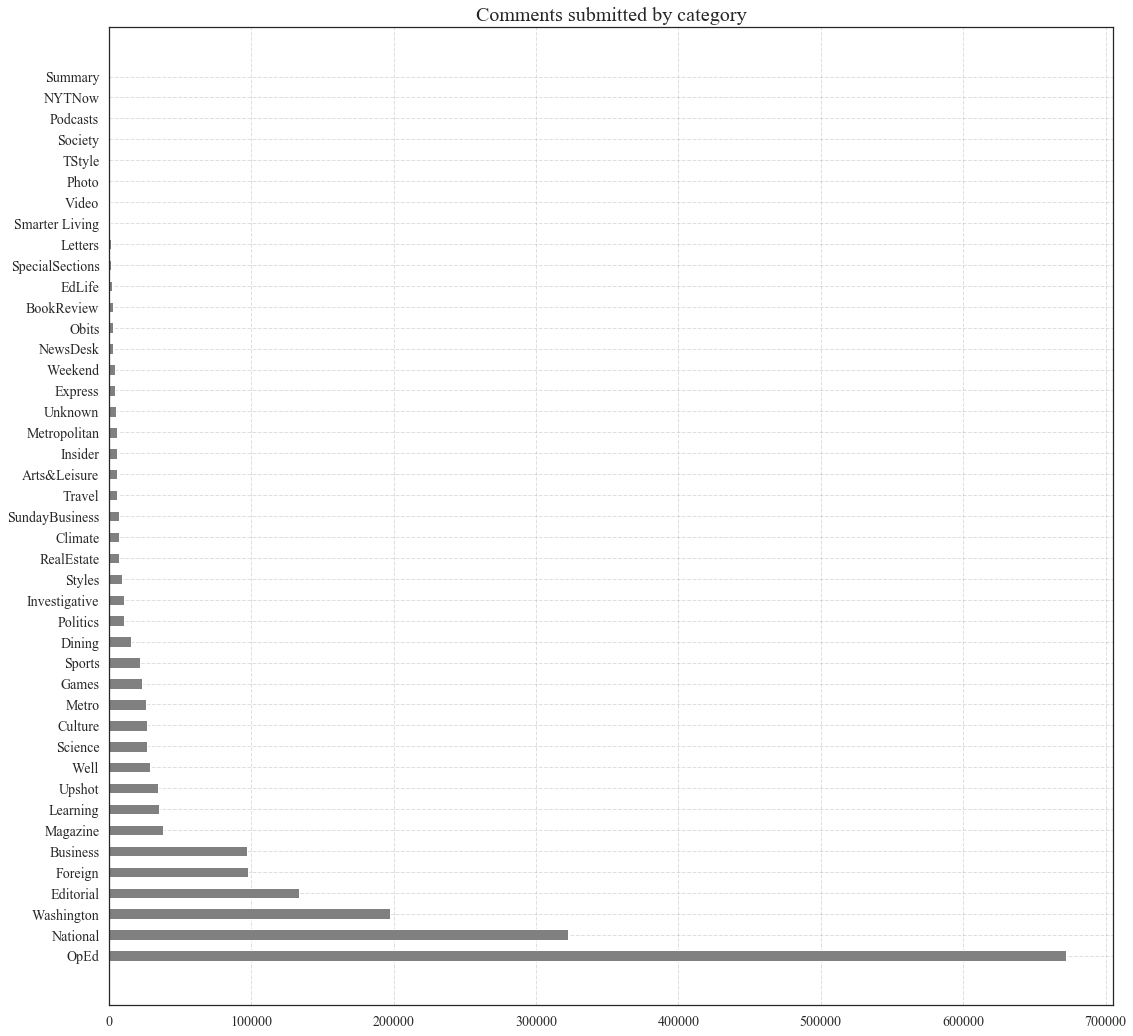

In [88]:
# udpate to top 10
category_comments =comments.groupby('newDesk')['articleID'].count().sort_values(ascending=False)
plt.figure(figsize=(18,18))
plt.barh(category_comments.index, category_comments, align='center', height=0.5, color = 'gray')
plt.grid(True, linestyle='--', which='major', color='gray', alpha=0.25)
plt.title('Comments submitted by category', fontname = 'Times New Roman', fontsize=20)
plt.yticks(fontname = 'Times New Roman', fontsize=14)
plt.xticks(fontname = 'Times New Roman', fontsize=14)
plt.show()

In [89]:
category_comments[:5]

newDesk
OpEd          671893
National      322771
Washington    197321
Editorial     133722
Foreign        97962
Name: articleID, dtype: int64

_Comments by editorSelection_

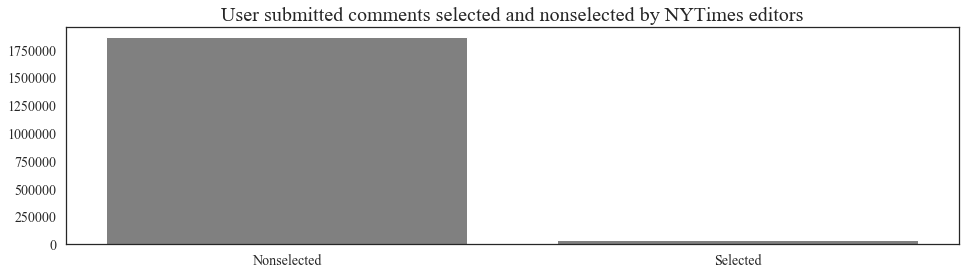

In [90]:
selection_comments =comments.groupby('editorsSelection')['articleID'].count().sort_values(ascending=False)
plt.figure(figsize=(16,4))
plt.title('User submitted comments selected and nonselected by NYTimes editors', fontname = 'Times New Roman', fontsize=20)
plt.bar(selection_comments.index, selection_comments, color = 'gray')
plt.yticks(fontname = 'Times New Roman', fontsize=14)
plt.xticks([0, 1], ['Nonselected', 'Selected'], fontname = 'Times New Roman', fontsize=14)
plt.grid(False)
plt.show()
# add percentage

In [91]:
# balanced_data.editorsSelection = balanced_data.editorsSelection.astype('int')
# comments.recommendations

In [92]:
selected_comments = comments[comments['editorsSelection']=='1']
nonselected_comments = comments[comments['editorsSelection']=='0']
nonselected_comments.head()

approveDate                 articleID  articleWordCount  \
0   1517529462  5a7258e410f40f00018bed7d             835.0   
1   1517529428  5a7258e410f40f00018bed7d             835.0   
2   1517529427  5a7258e410f40f00018bed7d             835.0   
3   1517529425  5a7258e410f40f00018bed7d             835.0   
4   1517529418  5a7258e410f40f00018bed7d             835.0   

                                         commentBody   commentID  \
0  The snake-filled heads comment made me think o...  25791250.0   
1                      She-devil reporting for duty!  25795675.0   
2                   XX is the new mark of the devil.  25792078.0   
3  "Courtland Sykes" should be writing for The On...  25791604.0   
4  I happen to descend for a few of them, because...  25795241.0   

  commentSequence commentType    createDate depth editorsSelection  ...  \
0      25791250.0     comment  1517508359.0   1.0                0  ...   
1      25795675.0     comment  1517527262.0   1.0                0  ...   
2      25792078.0     comment  1517511368.0   1.0                0  ...   
3      25791604.0     comment  1517509557.0   1.0                0  ...   
4      25795241.0     comment  1517524825.0   1.0                0  ...   

  trusted typeOfMaterial  userDisplayName      userID            userLocation  \
0     0.0          Op-Ed           Jennie  79172841.0                      WA   
1     0.0          Op-Ed  Nice White Lady  66376882.0                 Seattle   
2     0.0          Op-Ed      Stan Sutton  27924638.0  Westchester County, NY   
3     0.0          Op-Ed      Phil Carson  31909107.0                  Denver   
4     0.0          Op-Ed             Abby  55271958.0                  Tucson   

  commentWordCount stopWordCount punctuationCount emDashCount WeekDay  
0               17           4.0                7           0       3  
1                4           1.0                1           0       3  
2                8           4.0                1           0       3  
3               14           5.0                2           0       3  
4               47          23.0                7           0       3  

[5 rows x 32 columns]

In [93]:
nonselected_sample = nonselected_comments.sample(36104)
balanced_data = pd.concat([selected_comments, nonselected_sample], axis=0)

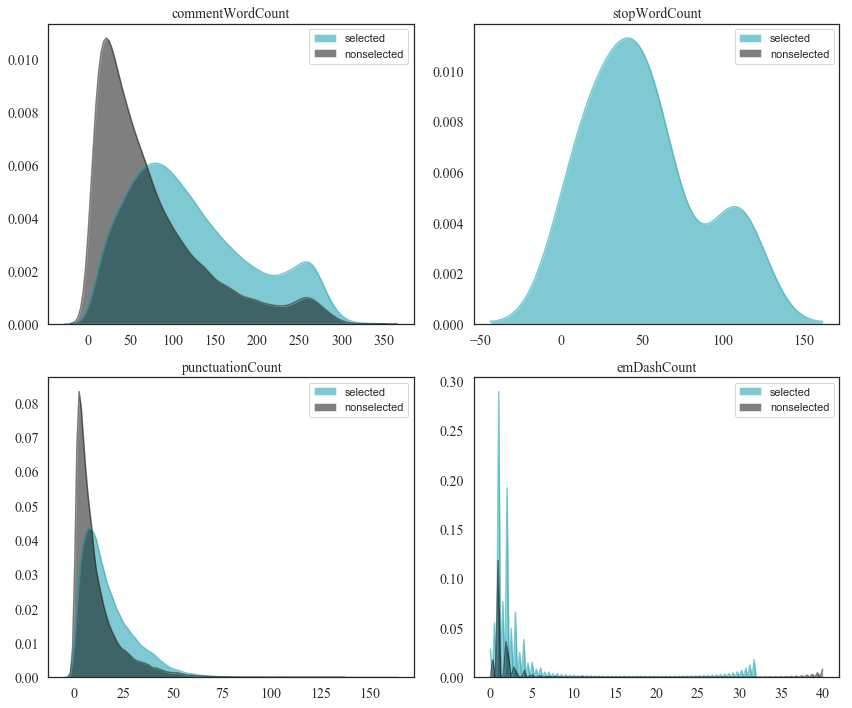

In [94]:
fig = plt.figure(figsize=(12, 10))

for i, col in zip(range(1,5), calc_cols):
    ax = fig.add_subplot(2, 2, i)
    selected = sns.kdeplot(balanced_data[balanced_data['editorsSelection']=='1'][col].dropna().values, color=("#0097A7"), shade=True, alpha=0.5)
    nonselected = sns.kdeplot(balanced_data[balanced_data['editorsSelection']=='0'][col].dropna().values, color='black', shade=True, alpha=0.5)
    plt.title(col, fontname='Times New Roman', fontsize=14)
    plt.yticks(fontname = 'Times New Roman', fontsize=14)
    plt.xticks(fontname = 'Times New Roman', fontsize=14)
    plt.legend(['selected', 'nonselected'])
plt.tight_layout()
plt.show()

There isn't consistent dilinearation between selected and nonselected comments with respect to numerical features. The word count distribution for nonselected comments is skewed right whereas that for selected comments is more normally distribution.

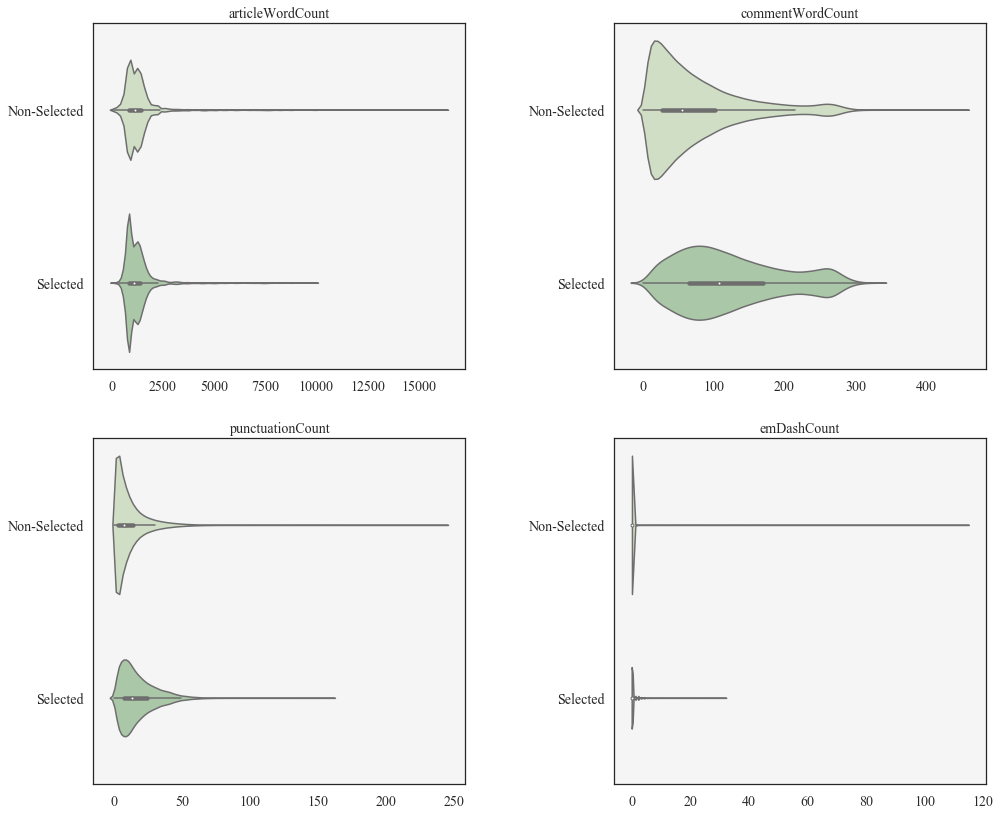

In [95]:
fig = plt.figure(figsize=(16, 14))
fig.subplots_adjust(wspace=.4)




for i, col in zip(range(1, 5), ['articleWordCount', 'commentWordCount', 'punctuationCount', 'emDashCount']):
    ax = fig.add_subplot(2, 2, i)
    df = pd.DataFrame({'Non-Selected': comments.groupby('editorsSelection').get_group('0')[col],
                  'Selected':   comments.groupby('editorsSelection').get_group('1')[col]})
#     print(df)
    ax = sns.violinplot(data=df, split=True, palette=sns.cubehelix_palette(rot=-.5, dark=.3), orient='h') 
    ax.set_facecolor('whitesmoke')

    plt.title(col, fontname='Times New Roman', fontsize=14)
    plt.yticks(fontname = 'Times New Roman', fontsize=14)
    plt.xticks(fontname = 'Times New Roman', fontsize=14)

plt.show()

The violin plots confirm this as well.

___Which article was 11 words?___

In [96]:
shortest_article = articles.loc[articles['articleWordCount'] == 11]
shortest_article

articleID  articleWordCount      byline documentType  \
59  5895098c95d0e0392607e8f2                11  By UNKNOWN     blogpost   

   headline  keywords multimedia  newDesk      printPage              pubDate  \
59  Unknown  ['News']          0  Unknown  (-0.001, 1.0]  2017-02-03 22:49:45   

   sectionName                        snippet              source  \
59     Unknown  Maybe you’re crazy. Probably.  The New York Times   

   typeOfMaterial                                             webURL  
59           Blog  https://krugman.blogs.nytimes.com/2017/02/03/f...

___16K+ words?___

In [97]:
longest_article = articles.loc[articles['articleWordCount'] == 16336]
longest_article

articleID  articleWordCount                   byline  \
6907  5a8f533b10f40f00018c2848             16336  By THE LEARNING NETWORK   

     documentType                                           headline keywords  \
6907      article  On the Shooting in Florida, Student Activism, ...       []   

     multimedia   newDesk      printPage              pubDate sectionName  \
6907         68  Learning  (-0.001, 1.0]  2018-02-22 23:33:05     Unknown   

                                                snippet              source  \
6907  The best teenage comments from last week’s wri...  The New York Times   

     typeOfMaterial                                             webURL  
6907           News  https://www.nytimes.com/2018/02/22/learning/on...

___How many comments were only 1 word?___

In [98]:
short_comment = comments.loc[comments['commentWordCount']==1]
short_comment

approveDate                 articleID  articleWordCount  \
743       1517503408  5a725f2410f40f00018bed89             864.0   
1884      1517526406  5a72728f10f40f00018bedac            1774.0   
2069      1517508731  5a72728f10f40f00018bedac            1774.0   
2156      1517510427  5a72728f10f40f00018bedac            1774.0   
2225      1517499149  5a72728f10f40f00018bedac            1774.0   
2294      1517498805  5a72728f10f40f00018bedac            1774.0   
2612      1517524554  5a7282d110f40f00018bedc8             337.0   
3095      1517700129  5a72e54510f40f00018bee9f             394.0   
3162      1517527952  5a72e54010f40f00018bee9a            1407.0   
5369      1517964421  5a7309a610f40f00018bef1b            1113.0   
5370      1518301541  5a7309a610f40f00018bef1b            1113.0   
7443      1517517094  5a7335a210f40f00018befb3            1517.0   
7755      1517509946  5a734b9110f40f00018bf011            1249.0   
7787      1517508415  5a734b9110f40f00018bf011            1249.0   
8076      1517603681  5a736f6410f40f00018bf092            1194.0   
8832      1517627108  5a73a8f210f40f00018bf145             856.0   
10006     1517593269  5a73a8f210f40f00018bf146             844.0   
12210     1517595224  5a73c0c210f40f00018bf171            1350.0   
12393     1517601080  5a73c62810f40f00018bf17b            1344.0   
13091     1517589356  5a73c9b410f40f00018bf186            1352.0   
13121     1517589351  5a73c9b410f40f00018bf186            1352.0   
13297     1517932907  5a73d45110f40f00018bf19a             658.0   
14137     1517606949  5a7436ce10f40f00018bf263            1370.0   
14822     1517664183  5a743db010f40f00018bf27c            1051.0   
15062     1517670992  5a74414810f40f00018bf287             833.0   
15568     1517671002  5a74414810f40f00018bf287             833.0   
16545     1517600105  5a74414910f40f00018bf289            1765.0   
16689     1517673862  5a74414910f40f00018bf288             850.0   
18616     1517781429  5a746efc10f40f00018bf300             883.0   
22312     1517711681  5a75884010f40f00018bf521            1503.0   
...              ...                       ...               ...   
1894572   1488481678  58b76cc795d0e024902fd043            2232.0   
1894686   1488473315  58b76cc795d0e024902fd043            2232.0   
1894769   1488475954  58b76cc795d0e024902fd043            2232.0   
1894941   1488466827  58b76cc795d0e024902fd043            2232.0   
1895140   1488464532  58b76cc795d0e024902fd043            2232.0   
1895715   1488505432  58b7d46895d0e024902fd10b            1660.0   
1895718   1488486312  58b7d46895d0e024902fd10b            1660.0   
1895735   1488513992  58b7d46895d0e024902fd10b            1660.0   
1895758   1488491050  58b7d46895d0e024902fd10b            1660.0   
1895877   1488467891  58b7d60395d0e024902fd113            1268.0   
1896225   1488565196  58b7ed4995d0e024902fd158            1329.0   
1896912   1488549955  58b9278a95d0e024902fd4c1             819.0   
1897252   1488824206  58b93eac95d0e024902fd502            1350.0   
1897327   1488632524  58b93eac95d0e024902fd502            1350.0   
1897750   1490553914  58b9a11995d0e024902fd643             880.0   
1898264   1488638792  58ba1fdb95d0e024902fd7b6             827.0   
1898273   1488628182  58ba1fdb95d0e024902fd7b6             827.0   
1898360   1488633511  58ba206995d0e024902fd7b8            1484.0   
1898410   1488629672  58ba206995d0e024902fd7b8            1484.0   
1898613   1488741624  58ba9e6195d0e024902fd831            1891.0   
1898737   1488717950  58babb9e95d0e024902fd849            2618.0   
1898890   1488741450  58badf2f95d0e024902fd87b            2241.0   
1899003   1488722192  58badf2f95d0e024902fd87b            2241.0   
1899071   1488730713  58badf2f95d0e024902fd87b            2241.0   
1899130   1488683204  58badf2f95d0e024902fd87b            2241.0   
1899157   1488692499  58badf2f95d0e024902fd87b            2241.0   
1899221   1488673345  58badf2f95d0e024902fd87b            2241.0 

4232 submissions!

___Which comment was 452 words?___

In [99]:
longest_comment = comments.loc[comments['commentWordCount']==452]
comments.loc[960602]['commentBody']

'   Beautifully written and deeply touching. It makes me wonder how many of us also have college classmates who died while homeless and suffering from mental illness. And it reminds me that I wish I’d done something to try to help Robert, the last time I saw him in 1972.<br/><br/>   We started Harvard together in 1968, arriving from different Brooklyn public high schools. We already knew each other because we’d taken advanced math classes together at Brooklyn College during the prior year -- we were the only high school students in the classes and got to know each other pretty well. As freshmen at Harvard, we were together for a famously difficult math class (math 55), an experience which was stressful for both of us. And by 1969, he was in long term care on a ward at "Mass Mental." When I visited the ward, I found him mumbling, perseverating &amp; clutching a copy of our math textbook from the prior year.  He was shuffling along with others our age, including a few faces I may have re

In [100]:
comments.describe()

approveDate  articleWordCount  commentWordCount  stopWordCount  \
count  1.899975e+06      1.899975e+06      1.899975e+06      88.000000   
mean   1.504211e+09      1.265181e+03      7.582526e+01      30.659091   
std    1.606672e+07      8.398280e+02      6.566603e+01      28.361333   
min    1.483318e+09      1.100000e+01      0.000000e+00       1.000000   
25%    1.488636e+09      8.360000e+02      2.700000e+01       9.000000   
50%    1.493591e+09      1.125000e+03      5.500000e+01      20.500000   
75%    1.520390e+09      1.442000e+03      1.040000e+02      41.750000   
max    1.525233e+09      1.633600e+04      4.520000e+02     118.000000   

       punctuationCount   emDashCount  
count      1.899975e+06  1.899975e+06  
mean       1.117819e+01  9.898551e-02  
std        1.176196e+01  6.554978e-01  
min        0.000000e+00  0.000000e+00  
25%        3.000000e+00  0.000000e+00  
50%        7.000000e+00  0.000000e+00  
75%        1.500000e+01  0.000000e+00  
max        2.440000e+02  1.150000e+02

__Additional data exploration__ 

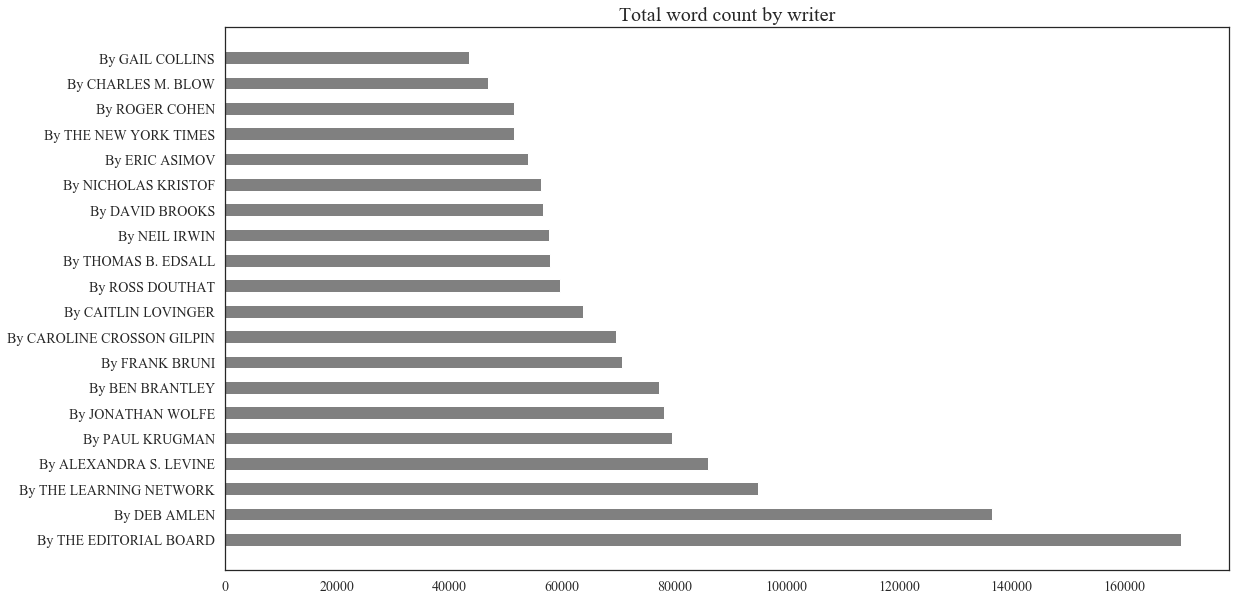

In [101]:
total_words_author = articles.groupby('byline')['articleWordCount'].sum().sort_values(ascending=False)[:20]
plt.figure(figsize=(18,10))
plt.barh(total_words_author.index, total_words_author, align='center', height=0.5, color='gray')
plt.title('Total word count by writer', fontname = 'Times New Roman', fontsize=20)
plt.yticks(fontname = 'Times New Roman', fontsize=14)
plt.xticks(fontname = 'Times New Roman', fontsize=14)
plt.show()

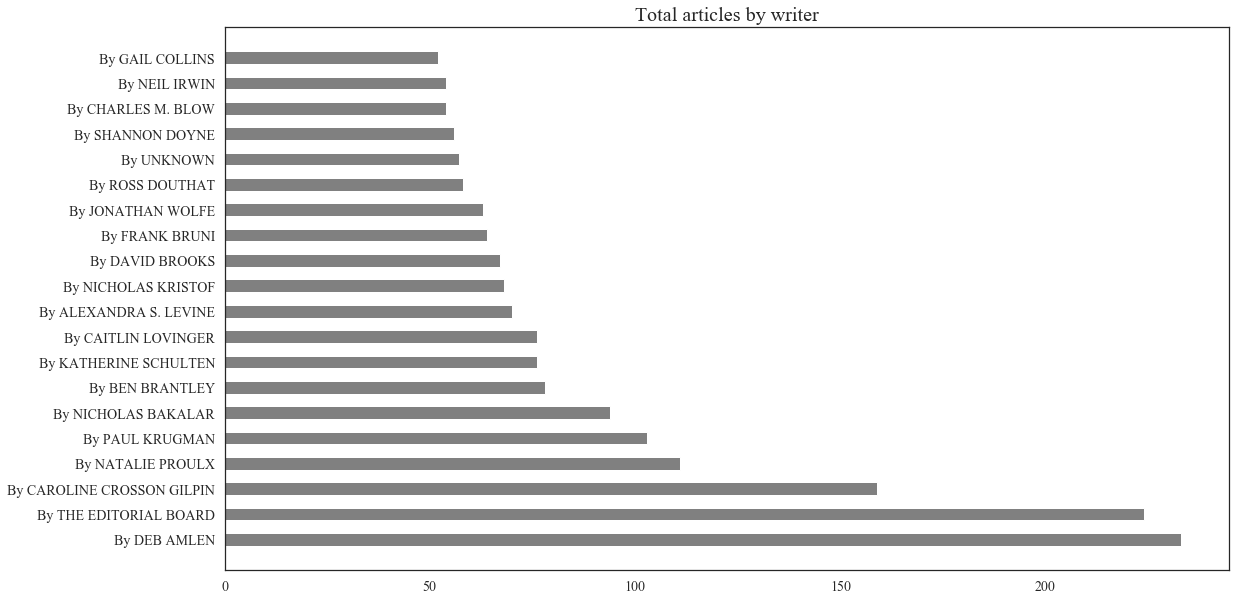

In [102]:
total_articles_author = articles.groupby('byline')['byline'].count().sort_values(ascending=False)[:20]
plt.figure(figsize=(18,10))
plt.barh(total_articles_author.index, total_articles_author, align='center', height=0.5, color='gray')
plt.title('Total articles by writer', fontname = 'Times New Roman', fontsize=20)
plt.yticks(fontname = 'Times New Roman', fontsize=14)
plt.xticks(fontname = 'Times New Roman', fontsize=14)
plt.show()

In [103]:
len(comments.userID.unique())

223953

Over 223K unique userIDs for comments.

In [104]:
total_comments_user = comments.groupby('userID')['userID'].count().sort_values(ascending=False)

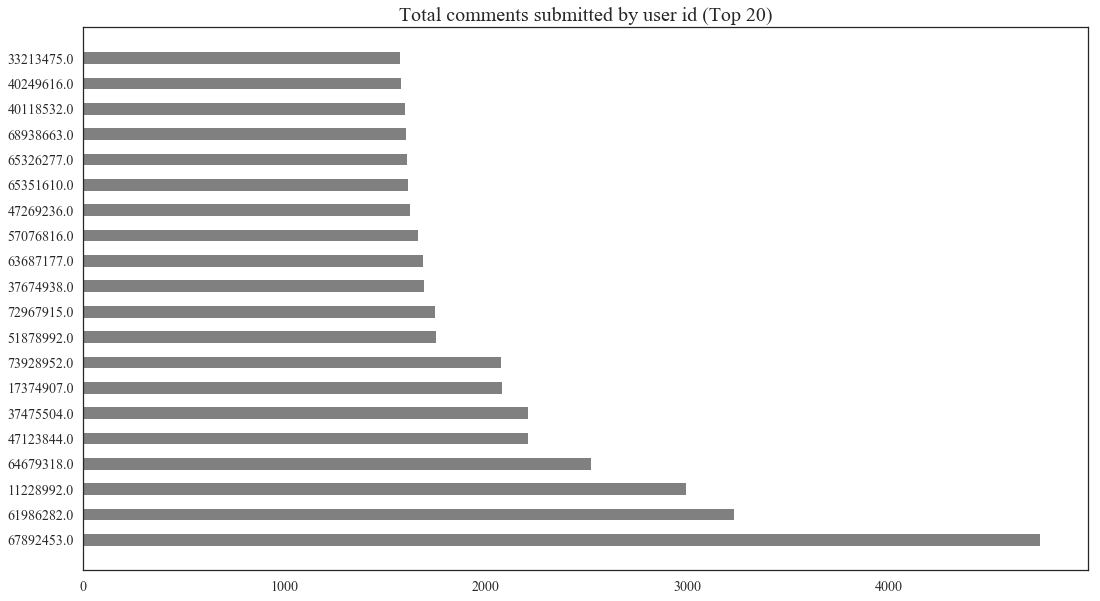

In [105]:
plt.figure(figsize=(18,10))
plt.barh(total_comments_user.index[:20], total_comments_user[:20], align='center', height=0.5, color='gray')
plt.title('Total comments submitted by user id (Top 20)', fontname = 'Times New Roman', fontsize=20)
plt.yticks(fontname = 'Times New Roman', fontsize=14)
plt.xticks(fontname = 'Times New Roman', fontsize=14)
plt.show()

In [106]:
total_comments_selection = comments.groupby(['userID','editorsSelection'])['userID'].count().sort_values(ascending=False)

Wow, the top commentor has posted nearly 5000 times! Many users have also submitted over 1000 comments.

_Number of users with over 100 comments_

In [107]:
np.sum(total_comments_user > 100) #diff count bc only a sample

3099

There are over 3K users who have submitted more than 100 comments.

.. but most users only comment once.

_Number of users with just one comment_

In [108]:
np.sum(total_comments_user == 1)

112785

_Percent of comments selected by editors_

In [109]:
np.sum(comments.editorsSelection == "1") / len(comments.editorsSelection)

0.019002355294148607

Roughly 2% of submitted comments were selected by editors.

__Boxplot distribution of comments by user__

A boxplot distribution for comments should reflect the observations above.

_With outliers_

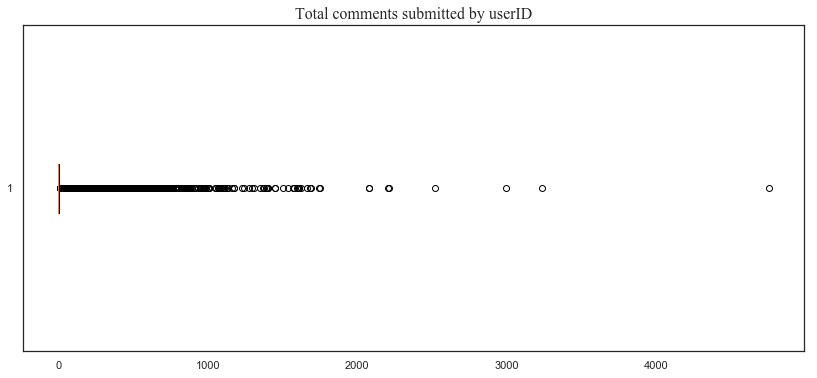

In [110]:
comment_vals = total_comments_user.get_values()
plt.figure(figsize=(14, 6))
plt.boxplot(comment_vals, meanline=True, vert=False)
plt.title('Total comments submitted by userID', fontname= 'Times New Roman', fontsize=16)
plt.show()

_Without outliers_

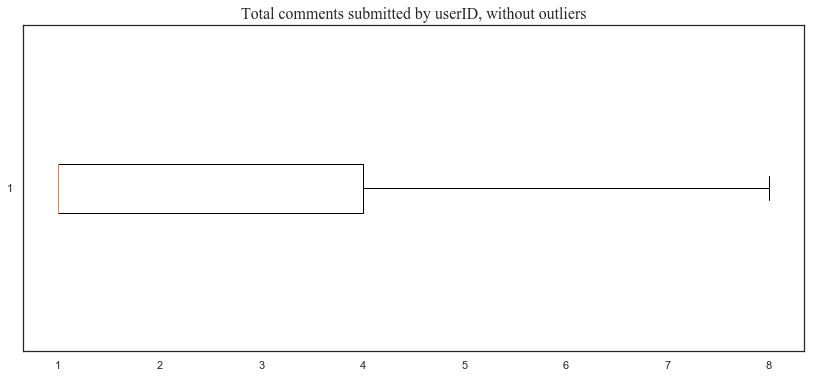

In [111]:
plt.figure(figsize=(14, 6))
plt.boxplot(comment_vals, vert=False, meanline=True, showfliers=False)
plt.title('Total comments submitted by userID, without outliers', fontname= 'Times New Roman', fontsize=16)
plt.show()

As evidenced above, there are significant outliers, yet the average reader has submitted closer to 1 comment.

Next, I'll explore the changes in our data over the two periods: Jan - May 2017 and Jan - May 2018.

### Time-series analysis

I'll use the preprocessed datasets to complete a quick time-series analysis on any trends in submitted articles and comments for 2016 and 2017.

_Copy dataframes_

In [112]:
articles_time = articles[['articleID', 'pubDate']]
comments_time = comments[['commentID', 'createDate']]

In [113]:
articles_time.head()
comments_time.head()

commentID    createDate
0  25791250.0  1517508359.0
1  25795675.0  1517527262.0
2  25792078.0  1517511368.0
3  25791604.0  1517509557.0
4  25795241.0  1517524825.0

_Change columns to datetime format_

In [114]:
articles_time['pubDate'] = pd.to_datetime(articles_time['pubDate'])
comments_time['createDate'] = pd.to_datetime(comments_time['createDate'], unit='s')

In [115]:
# articles_time.info()
# comments_time.info()

_Refine dates_

In [116]:
articles_time.pubDate = articles_time.pubDate.dt.date
comments_time.createDate = comments_time.createDate.dt.date

_Convert to DateTime again_

In [117]:
articles_time['pubDate'] = pd.to_datetime(articles_time['pubDate'])
comments_time['createDate'] = pd.to_datetime(comments_time['createDate'])

In [118]:
comments_time.head()

commentID createDate
0  25791250.0 2018-02-01
1  25795675.0 2018-02-01
2  25792078.0 2018-02-01
3  25791604.0 2018-02-01
4  25795241.0 2018-02-01

In [119]:
comments_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899975 entries, 0 to 1899974
Data columns (total 2 columns):
commentID     object
createDate    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 43.5+ MB


_Set index_

In [120]:
articles_time.set_index('pubDate', inplace=True)

In [121]:
comments_time.set_index('createDate', inplace=True)

In [122]:
comments_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1899975 entries, 2018-02-01 to 2017-03-07
Data columns (total 1 columns):
commentID    object
dtypes: object(1)
memory usage: 29.0+ MB


_Add 'articleCount' , 'commentCount' columns_

In [123]:
articles_time['articleCount'] = 1

In [124]:
comments_time['commentCount'] = 1

__Plot time visualizations__

_Group data_

In [125]:
# articles_time.head()
# comments_time.tail()

In [126]:
articles_count = articles_time.groupby('pubDate')['articleCount'].sum()
comments_count = comments_time.groupby('createDate')['commentCount'].sum()

In [127]:
articles_count.head()

pubDate
2017-01-01     4
2017-01-02     9
2017-01-03    30
2017-01-04    35
2017-01-05    33
Name: articleCount, dtype: int64

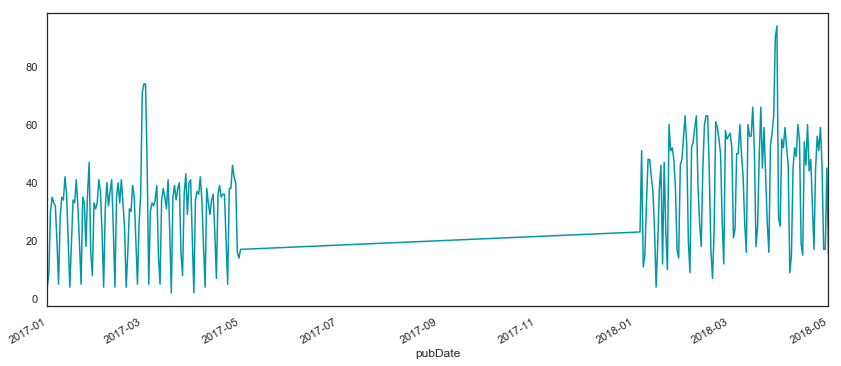

In [128]:
articles_count.plot(figsize=(14, 6), color =("#0097A7"))

In [129]:
comments_count.head()

createDate
2017-01-01       2
2017-01-02    2082
2017-01-03    6421
2017-01-04    6276
2017-01-05    9007
Name: commentCount, dtype: int64

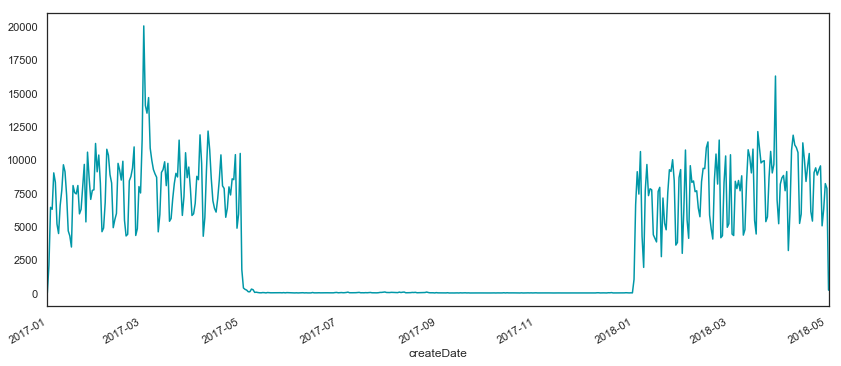

In [130]:
comments_count.plot(figsize=(14, 6), color =("#0097A7"))

In [131]:
articles_year = pd.DataFrame(articles_count).groupby(pd.Grouper(freq='A'))
comments_year = pd.DataFrame(comments_count).groupby(pd.Grouper(freq='A'))

_Article count over years_

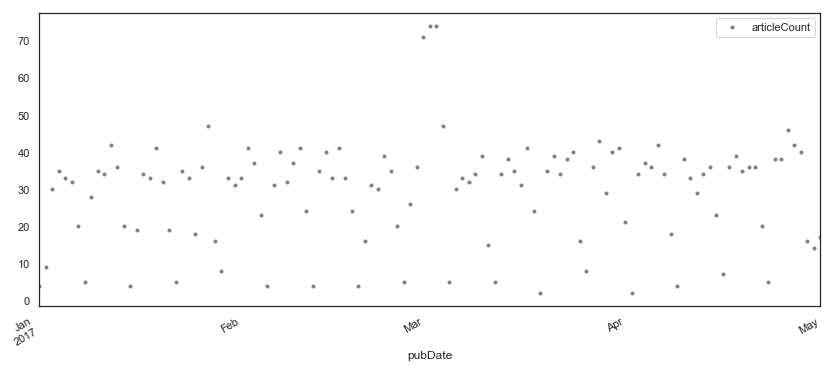

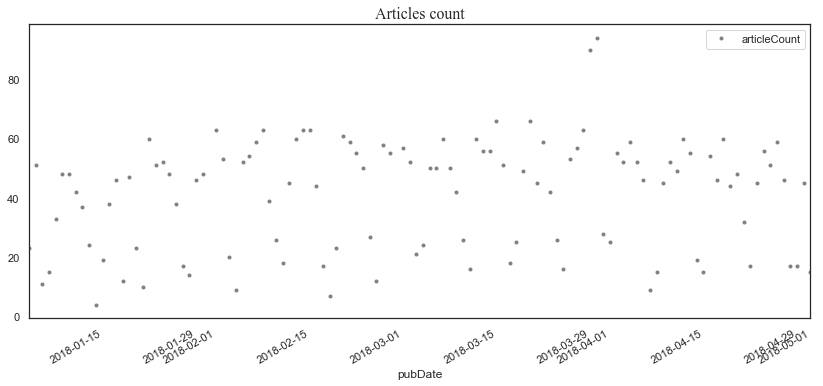

In [132]:
articles_year.plot(figsize=(14, 6), color='gray', style='.b', subplots=True)
plt.title('Articles count', fontname='Times New Roman', fontsize=16)
plt.show()

Visually, there appears to be an increase in articles from the period in 2017 to that in 2018.

_Comments count over years_

createDate
2017-12-31    [AxesSubplot(0.125,0.2;0.775x0.68)]
2018-12-31    [AxesSubplot(0.125,0.2;0.775x0.68)]
Freq: A-DEC, dtype: object

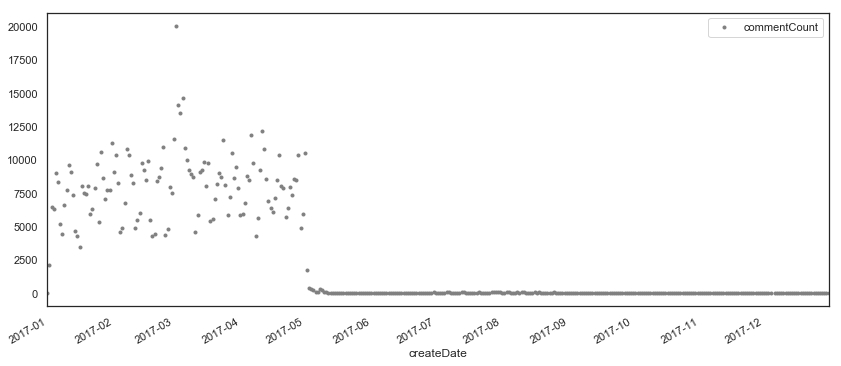

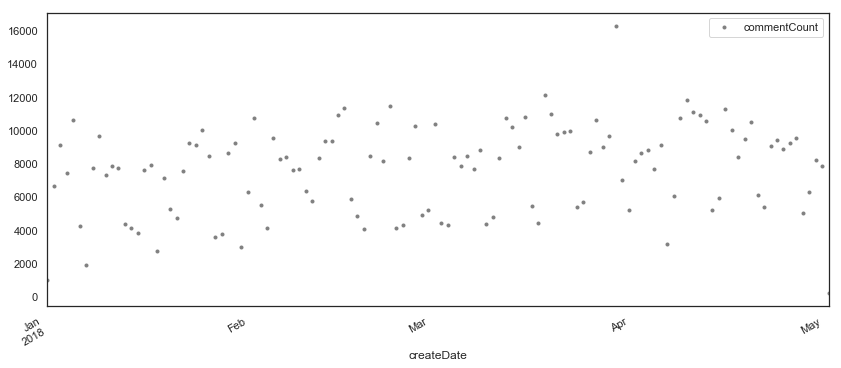

In [133]:
comments_year.plot(figsize=(14, 6), color='gray', style='.b', subplots=True)

There is less of an apparent trend in comments from the period in 2017 to that in 2018.

_Article and comment word counts over time_

In [134]:
articles_wordcount_time = articles[['articleWordCount', 'pubDate']]
comment_wordcount_time = comments[['commentWordCount', 'createDate']]
articles_wordcount_time.head()

articleWordCount              pubDate
0              1129  2017-02-02 00:26:16
1              3082  2017-02-02 10:00:24
2               693  2017-02-02 10:01:53
3              1049  2017-02-02 10:57:25
4              1283  2017-02-02 11:00:03

_Change columns to datetime format_

In [135]:
articles_wordcount_time.pubDate = pd.to_datetime(articles_wordcount_time.pubDate)
comment_wordcount_time.createDate = pd.to_datetime(comment_wordcount_time.createDate, unit = "s")

_Refine dates_

In [136]:
articles_wordcount_time.pubDate = articles_wordcount_time.pubDate.dt.date
comment_wordcount_time.createDate = comment_wordcount_time.createDate.dt.date

_Convert to datetime again_

In [137]:
articles_wordcount_time.pubDate = pd.to_datetime(articles_wordcount_time.pubDate)
comment_wordcount_time.createDate = pd.to_datetime(comment_wordcount_time.createDate)

_Set index_

In [138]:
articles_wordcount_time.set_index('pubDate', inplace=True)
comment_wordcount_time.set_index('createDate', inplace=True)

_Group data_

In [139]:
articles_wordcount = articles_wordcount_time.groupby('pubDate')['articleWordCount'].sum()
comments_wordcount = comment_wordcount_time.groupby('createDate')['commentWordCount'].sum()

In [140]:
articles_wordcount_year = pd.DataFrame(articles_wordcount).groupby(pd.Grouper(freq='A'))
comments_wordcount_year = pd.DataFrame(comments_wordcount).groupby(pd.Grouper(freq='A'))

_Total article word count over time_

Text(0.5, 1.0, 'Total article word count over time, by year')

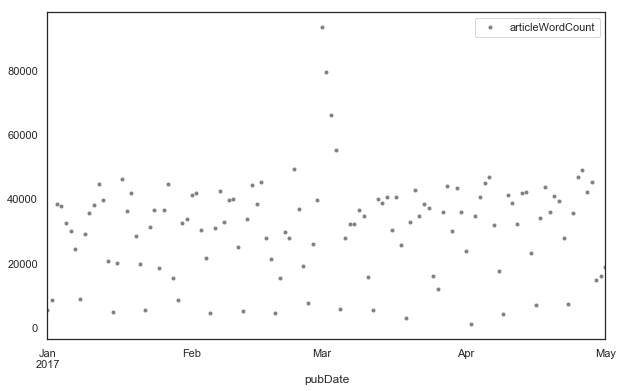

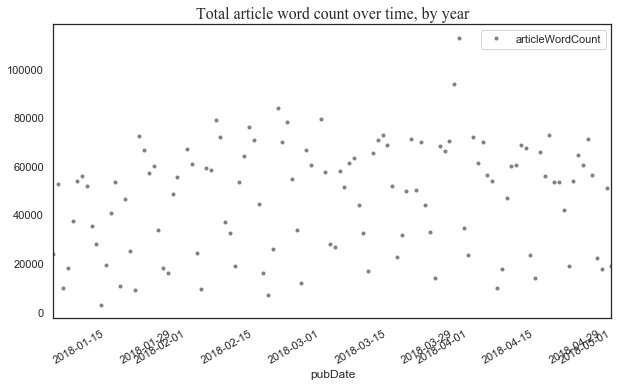

In [141]:
articles_wordcount_year.plot(style = '.', figsize = (10, 6), color = 'gray')
plt.title('Total article word count over time, by year', fontname = 'Times New Roman', fontsize = 16)

_Total comment word count over time_

Text(0.5, 1.0, 'Total comment word count over time, by year')

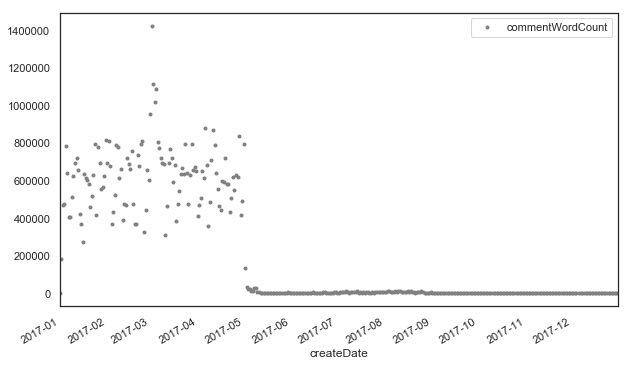

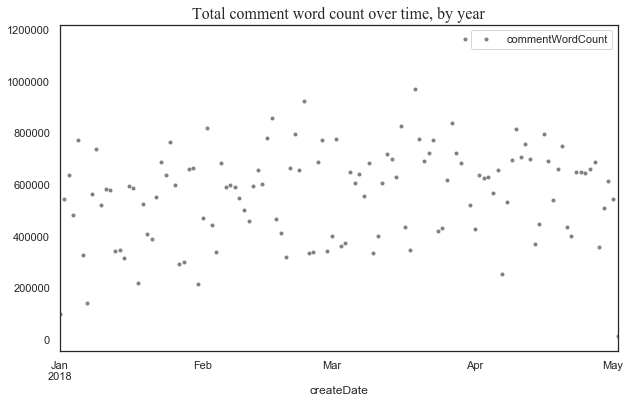

In [142]:
comments_wordcount_year.plot(style = '.', figsize = (10, 6), color = 'gray')
plt.title('Total comment word count over time, by year', fontname = 'Times New Roman', fontsize = 16)

_Articles by day_

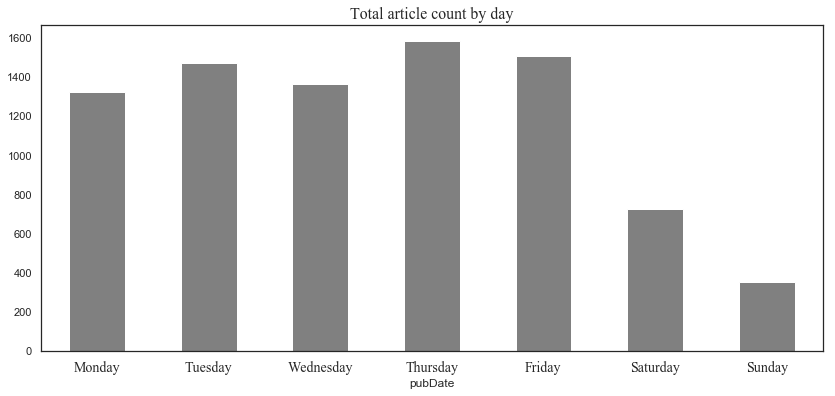

In [143]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
articles_day = pd.DataFrame(articles_count)
articles_day.index = articles_day.index.weekday
articles_day.groupby('pubDate')['articleCount'].sum().plot(kind='bar', figsize=(14, 6), color = 'gray')
plt.xticks(range(7), days, fontname = 'Times New Roman', fontsize= 14, rotation = 0)
plt.title('Total article count by day', fontname = 'Times New Roman', fontsize=16)
plt.show()

Over these periods, there were slightly more articles submitted on Thursday, and as expected, there was significant drop off during the weekend.

_Comments by day_

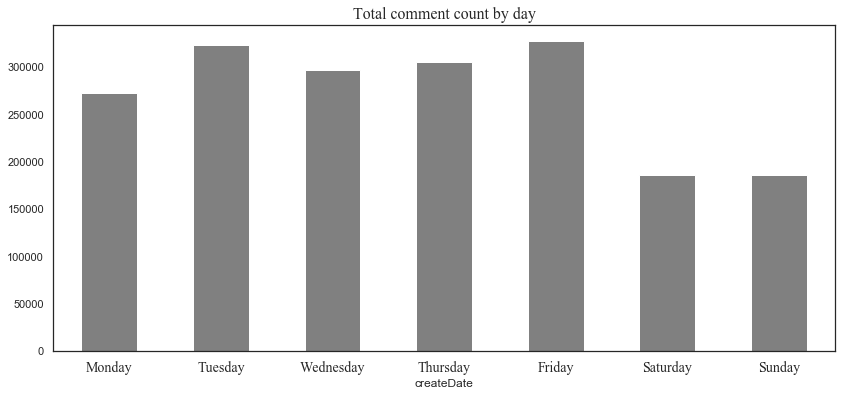

In [144]:
comments_day = pd.DataFrame(comments_count)
comments_day.index = comments_day.index.weekday
comments_day.groupby('createDate')['commentCount'].sum().plot(kind='bar', figsize=(14, 6), color = 'gray')
plt.xticks(range(7), days, fontname = 'Times New Roman', fontsize = 14, rotation = 0)
plt.title('Total comment count by day', fontname = 'Times New Roman', fontsize=16)
plt.show()

Pretty similar pattern with comments.

_Process data for trends and seasonality_

In [145]:
articles_rolmean = articles_count.rolling(window=4, center= False).mean()
articles_rolstd = articles_count.rolling(window=4, center=False).std()

In [146]:
comments_rolmean = comments_count.rolling(window=4, center=False).mean()
comments_rolstd = comments_count.rolling(window=4, center=False).std()

_Plot seasonality visualizations_

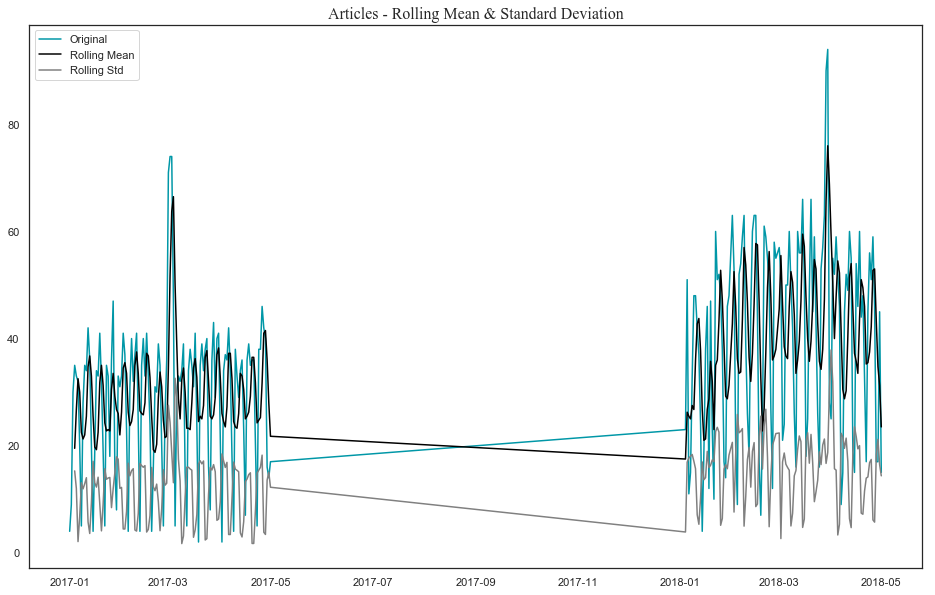

In [147]:
fig = plt.figure(figsize=(16, 10))
orig = plt.plot(articles_count, color =("#0097A7"), label='Original')
mean = plt.plot(articles_rolmean, color='black', label='Rolling Mean')
std = plt.plot(articles_rolstd, color='gray', label='Rolling Std')
plt.legend(loc='best')
plt.title('Articles - Rolling Mean & Standard Deviation', fontname = 'Times New Roman', fontsize = 16)
plt.show()
## use grouper and display by year, side by side

From the plot, it's apparent that the mean article count has increased and that there isn't considerable increase in variation of article counts between the two periods.

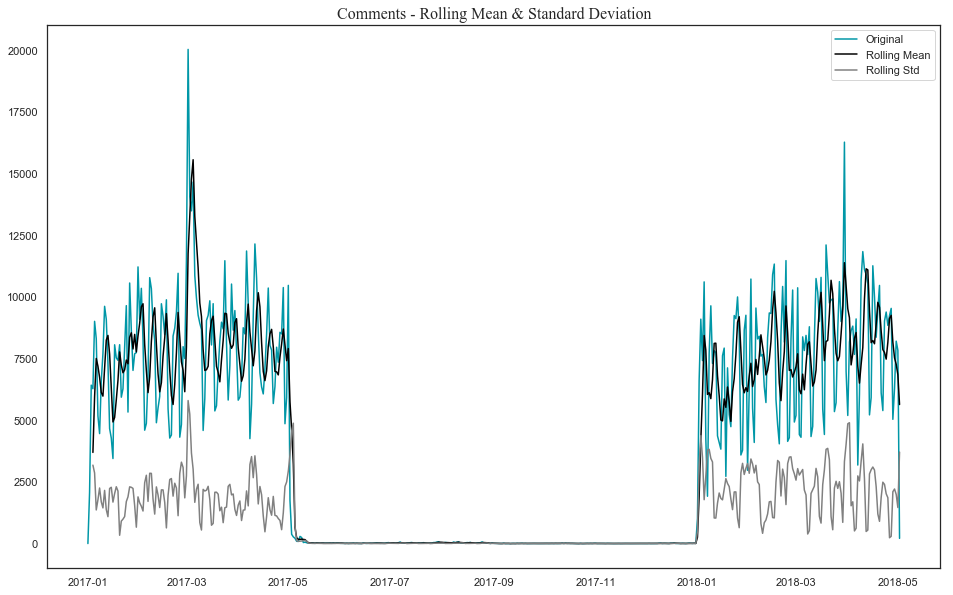

In [148]:
fig = plt.figure(figsize=(16, 10))
orig = plt.plot(comments_count, color =("#0097A7"), label='Original')
mean = plt.plot(comments_rolmean, color='black', label='Rolling Mean')
std = plt.plot(comments_rolstd, color='gray', label='Rolling Std')
plt.legend(loc='best')
plt.title('Comments - Rolling Mean & Standard Deviation', fontname = 'Times New Roman', fontsize = 16)
plt.show()
## use grouper and display by year, side by side

Upon further inspection, comments display consistent trends between both periods.

### Dickey-Fuller test for stationarity

_DF test for Articles_

In [149]:
articles_count.head()

pubDate
2017-01-01     4
2017-01-02     9
2017-01-03    30
2017-01-04    35
2017-01-05    33
Name: articleCount, dtype: int64

In [150]:
df_articles = adfuller(articles_count)

In [151]:
dfoutput_articles = pd.Series(df_articles[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in df_articles[4].items():
    dfoutput_articles['Critical Value (%s)'%key] = value
print('Results of Dickey-Fuller Test:')
print(dfoutput_articles)

Results of Dickey-Fuller Test:
Test Statistic                  -1.667666
p-value                          0.447844
Lags Used                       13.000000
Number of Observations Used    223.000000
Critical Value (1%)             -3.460019
Critical Value (5%)             -2.874590
Critical Value (10%)            -2.573725
dtype: float64


In [152]:
# add comment

_DF test for comments_

In [153]:
df_comments = adfuller(comments_count)

In [154]:
dfoutput_comments = pd.Series(df_comments[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in df_comments[4].items():
    dfoutput_comments['Critical Value (%s)'%key] = value
print('Results of Dickey-Fuller Test:')
print(dfoutput_comments)

Results of Dickey-Fuller Test:
Test Statistic                  -1.480802
p-value                          0.542986
Lags Used                       16.000000
Number of Observations Used    469.000000
Critical Value (1%)             -3.444370
Critical Value (5%)             -2.867722
Critical Value (10%)            -2.570063
dtype: float64


## Classification analysis

### Classification of comment features (comment text omitted)

#### Preprocessing

_Copy Comments dataset_

In [155]:
# create two datasets: without and with calculated columns
original_cols = [col for col in comments_df.columns if col not in calc_cols]
comments_df.head()
# comments_df.columns
#drop createDate

articleWordCount  commentWordCount  stopWordCount  emDashCount  \
0          0.588076          0.472600       0.224253          0.0   
1          0.588076          0.263157       0.000000          0.0   
2          0.588076          0.359265       0.224253          0.0   
3          0.588076          0.442789       0.268874          0.0   
4          0.588076          0.632974       0.608155          0.0   

   commentType_reporterReply  newDesk_Arts&Leisure  newDesk_Business  \
0                          0                     0                 0   
1                          0                     0                 0   
2                          0                     0                 0   
3                          0                     0                 0   
4                          0                     0                 0   

   newDesk_Climate  newDesk_Culture  newDesk_Dining  ...  \
0                0                0               0  ...   
1                0                0               0  ...   
2                0                0               0  ...   
3                0                0               0  ...   
4                0                0               0  ...   

   typeOfMaterial_Question  typeOfMaterial_Review  typeOfMaterial_briefing  \
0                        0                      0                        0   
1                        0                      0                        0   
2                        0                      0                        0   
3                        0                      0                        0   
4                        0                      0                        0   

   WeekDay_0  WeekDay_1  WeekDay_2  WeekDay_3  WeekDay_4  WeekDay_5  WeekDay_6  
0          0          0          0          1          0          0          0  
1          0          0          0          1          0          0          0  
2          0          0          0          1          0          0          0  
3          0          0          0          1          0          0          0  
4          0          0          0          1          0          0          0  

[5 rows x 127 columns]

In [156]:
data_original = pd.concat([comments_df[original_cols], comments['editorsSelection']], axis=1)    

In [157]:
data_updated = pd.concat([comments_df.drop(['stopWordCount'], axis=1), comments['editorsSelection']], axis=1)
data_updated.head()
#make sure createDate not in dataframes

articleWordCount  commentWordCount  emDashCount  commentType_reporterReply  \
0          0.588076          0.472600          0.0                          0   
1          0.588076          0.263157          0.0                          0   
2          0.588076          0.359265          0.0                          0   
3          0.588076          0.442789          0.0                          0   
4          0.588076          0.632974          0.0                          0   

   newDesk_Arts&Leisure  newDesk_Business  newDesk_Climate  newDesk_Culture  \
0                     0                 0                0                0   
1                     0                 0                0                0   
2                     0                 0                0                0   
3                     0                 0                0                0   
4                     0                 0                0                0   

   newDesk_Dining  newDesk_Express  ...  typeOfMaterial_Review  \
0               0                0  ...                      0   
1               0                0  ...                      0   
2               0                0  ...                      0   
3               0                0  ...                      0   
4               0                0  ...                      0   

   typeOfMaterial_briefing  WeekDay_0  WeekDay_1  WeekDay_2  WeekDay_3  \
0                        0          0          0          0          1   
1                        0          0          0          0          1   
2                        0          0          0          0          1   
3                        0          0          0          0          1   
4                        0          0          0          0          1   

   WeekDay_4  WeekDay_5  WeekDay_6  editorsSelection  
0          0          0          0                 0  
1          0          0          0                 0  
2          0          0          0                 0  
3          0          0          0                 0  
4          0          0          0                 0  

[5 rows x 127 columns]

In [158]:
data_updated.describe()

articleWordCount  commentWordCount   emDashCount  \
count      1.899975e+06      1.899975e+06  1.899975e+06   
mean       6.282626e-01      6.464880e-01  1.080243e-02   
std        6.622960e-02      1.551266e-01  4.849331e-02   
min        0.000000e+00      0.000000e+00  0.000000e+00   
25%        5.882417e-01      5.448436e-01  0.000000e+00   
50%        6.293436e-01      6.581790e-01  0.000000e+00   
75%        6.637176e-01      7.609618e-01  0.000000e+00   
max        1.000000e+00      1.000000e+00  1.000000e+00   

       commentType_reporterReply  newDesk_Arts&Leisure  newDesk_Business  \
count               1.899975e+06          1.899975e+06      1.899975e+06   
mean                1.568442e-04          2.920038e-03      5.089751e-02   
std                 1.252277e-02          5.395844e-02      2.197885e-01   
min                 0.000000e+00          0.000000e+00      0.000000e+00   
25%                 0.000000e+00          0.000000e+00      0.000000e+00   
50%                 0.000000e+00          0.000000e+00      0.000000e+00   
75%                 0.000000e+00          0.000000e+00      0.000000e+00   
max                 1.000000e+00          1.000000e+00      1.000000e+00   

       newDesk_Climate  newDesk_Culture  newDesk_Dining  newDesk_Express  ...  \
count     1.899975e+06     1.899975e+06    1.899975e+06     1.899975e+06  ...   
mean      3.734786e-03     1.392703e-02    8.038527e-03     2.414242e-03  ...   
std       6.099868e-02     1.171882e-01    8.929677e-02     4.907560e-02  ...   
min       0.000000e+00     0.000000e+00    0.000000e+00     0.000000e+00  ...   
25%       0.000000e+00     0.000000e+00    0.000000e+00     0.000000e+00  ...   
50%       0.000000e+00     0.000000e+00    0.000000e+00     0.000000e+00  ...   
75%       0.000000e+00     0.000000e+00    0.000000e+00     0.000000e+00  ...   
max       1.000000e+00     1.000000e+00    1.000000e+00     1.000000e+00  ...   

       typeOfMaterial_Question  typeOfMaterial_Review  \
count             1.899975e+06           1.899975e+06   
mean              3.405308e-04           7.254306e-03   
std               1.845034e-02           8.486274e-02   
min               0.000000e+00           0.000000e+00   
25%               0.000000e+00           0.000000e+00   
50%               0.000000e+00           0.000000e+00   
75%               0.000000e+00           0.000000e+00   
max               1.000000e+00           1.000000e+00   

       typeOfMaterial_briefing     WeekDay_0     WeekDay_1     WeekDay_2  \
count             1.899975e+06  1.899975e+06  1.899975e+06  1.899975e+06   
mean              2.615298e-03  1.436666e-01  1.700549e-01  1.566231e-01   
std               5.107308e-02  3.507515e-01  3.756811e-01  3.634452e-01   
min               0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%               0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%               0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%               0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max               1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

          WeekDay_3     WeekDay_4     WeekDay_5     WeekDay_6  
count  1.899975e+06  1.899975e+06  1.899975e+06  1.899975e+06  
mean   1.609416e-01  1.726523e-01  9.811655e-02  9.794497e-02  
std    3.674772e-01  3.779465e-01  2.974723e-01  2.972403e-01  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  

[8 rows x 126 columns]

#### Baseline log regression with sklearn

In [159]:
X_org_cols = [col for col in data_original.columns if col != 'editorsSelection']

In [160]:
X_upd_cols = [col for col in data_updated.columns if col != 'editorsSelection']

In [161]:
X_org = data_original[X_org_cols]

In [162]:
X_upd = data_updated[X_upd_cols]

In [163]:
y = comments['editorsSelection'] # confirm alignment

_Split model into train and test sets_

In [321]:
X_org_train, X_org_test, y_org_train, y_org_test = train_test_split(X_org, y)
X_upd_train, X_upd_test, y_upd_train, y_upd_test = train_test_split(X_upd, y)

In [322]:
y_org_test.value_counts()

0    465662
1      9332
Name: editorsSelection, dtype: int64

In [323]:
y_org_train.value_counts()

0    1398209
1      26772
Name: editorsSelection, dtype: int64

_Fit model and predict classes_

In [324]:
logreg_org = LogisticRegression()
model_log_org = logreg_org.fit(X_org_train, y_org_train)

In [325]:
logreg_upd = LogisticRegression()
model_log_upd = logreg_upd.fit(X_upd_train, y_upd_train)

In [326]:
y_org_hat = model_log_org.predict(X_org_test)

In [327]:
y_upd_hat = model_log_upd.predict(X_upd_test)

In [328]:
# find better solution
y_org_hat = y_org_hat.astype(int)
y_org_test = y_org_test.astype(int)

In [329]:
y_upd_hat = y_upd_hat.astype(int)
y_upd_test = y_upd_test.astype(int)

_View results_

In [330]:
accuracy_score(y_org_test, y_org_hat)

0.9803534360434026

In [331]:
print(metrics.classification_report(y_org_test, y_org_hat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    465662
           1       0.00      0.00      0.00      9332

    accuracy                           0.98    474994
   macro avg       0.49      0.50      0.50    474994
weighted avg       0.96      0.98      0.97    474994



In [332]:
accuracy_score(y_upd_test, y_upd_hat)

0.9810818662972585

In [333]:
print(metrics.classification_report(y_upd_test, y_upd_hat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    466008
           1       0.00      0.00      0.00      8986

    accuracy                           0.98    474994
   macro avg       0.49      0.50      0.50    474994
weighted avg       0.96      0.98      0.97    474994



_Print confusion matrix_

In [334]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.figure(figsize=(10,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Logistic Regression (Original columns)
[[465662      0]
 [  9332      0]]
Confusion matrix, without normalization
[[465662      0]
 [  9332      0]]


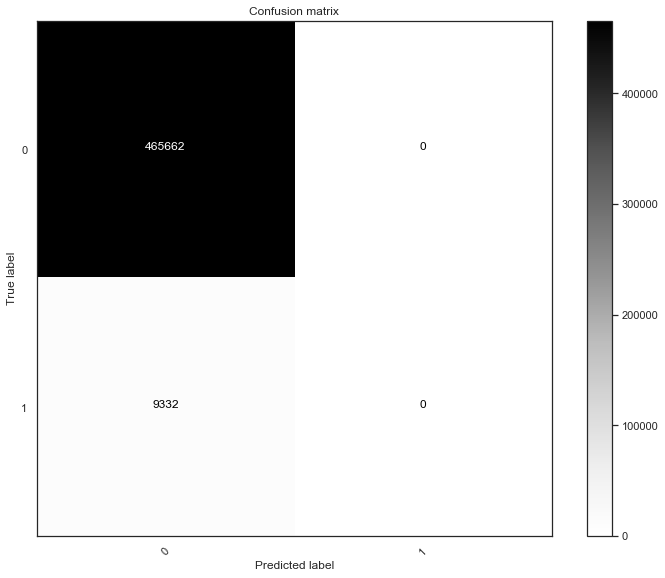

In [336]:
print("Logistic Regression (Original columns)")
cnf_matrix = confusion_matrix(y_org_test, y_org_hat)
print(cnf_matrix)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

Logistic Regression (Including calculated columns)
Confusion matrix, without normalization
[[466008      0]
 [  8986      0]]


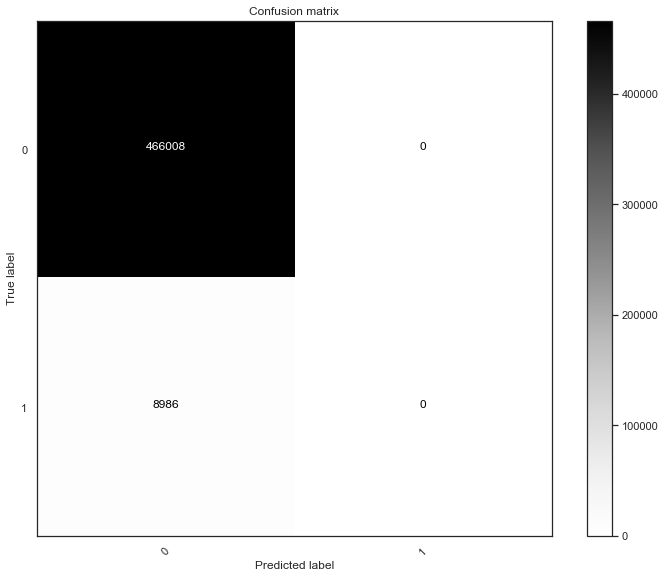

In [337]:
print("Logistic Regression (Including calculated columns)")
cnf_matrix = confusion_matrix(y_upd_test, y_upd_hat)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

Clearly, the class imbalance has an effect on model performance.

_View ROC curve_

In [180]:
y_org_score = logreg_org.fit(X_org_train, y_org_train).decision_function(X_org_test)

fpr, tpr, thresholds = roc_curve(np.array(y_org_test), y_org_score)

In [181]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.6033835936587516


In [182]:
y_upd_score = logreg_upd.fit(X_upd_train, y_upd_train).decision_function(X_upd_test)

fpr, tpr, thresholds = roc_curve(np.array(y_upd_test), y_upd_score)

In [183]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7448296493304949


Due to the class imbalance, no predictions were made for 'editorsSelected'. I'll address the class imbalance and rerun the model.

_View ROC for varying class weights_

AUC for None: 0.6032817934846761
AUC for Balanced: 0.602518834280567
AUC for 2 to 1: 0.6032805293440628
AUC for 10 to 1: 0.6031236275256615
AUC for 100 to 1: 0.6020824940350791
AUC for 1000 to 1: 0.6006196826921355


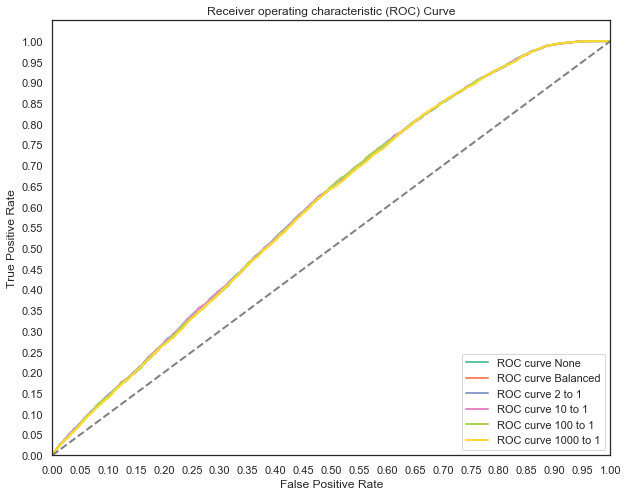

In [184]:
# need to update
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    #Fit a model
    logreg_org = LogisticRegression(fit_intercept = False, C = 1e12, class_weight=weight) #review class weights
    model_log_org = logreg_org.fit(X_org_train, y_org_train.astype(int))
#     print(model_log_org) #Preview model params

    #Predict
    y_hat = logreg_org.predict(X_org_test)

    y_score = logreg_org.fit(X_org_train, y_org_train.astype(int)).decision_function(X_org_test)

    y_org_hat = y_org_hat.astype(int)
    y_org_test = y_org_test.astype(int)
    fpr, tpr, thresholds = roc_curve(y_org_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Plotting ROCs for various class ratios doesn't improve the AUC for the orginal dataframe much.

AUC for None: 0.7448639965870932
AUC for Balanced: 0.7445463348790656
AUC for 2 to 1: 0.7448570247752307
AUC for 10 to 1: 0.7448076978179657
AUC for 100 to 1: 0.7443373377113363
AUC for 1000 to 1: 0.7432193015066033


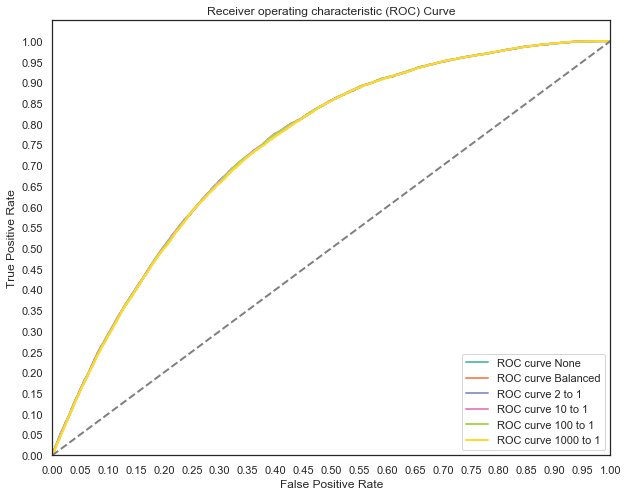

In [185]:
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    #Fit a model
    logreg_upd = LogisticRegression(fit_intercept = False, C = 1e12, class_weight=weight)
    model_log_upd = logreg_upd.fit(X_upd_train, y_upd_train.astype(int))
#     print(model_log_upd) #Preview model params

    #Predict
    y_hat = logreg_upd.predict(X_upd_test)

    y_score = logreg_upd.fit(X_upd_train, y_upd_train.astype(int)).decision_function(X_upd_test)


    fpr, tpr, thresholds = roc_curve(y_upd_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The variation of class weights also has minimal effect on the ROCs for the updated dataset. The updated dataset has better ratio of true positives than the orginal.

__Logistic regression with SMOTE__

To address the class imbalance, I'll first implement SMOTE and rerun the classification workflow.

In [186]:
X_org_resampled, y_org_resampled = SMOTE().fit_sample(X_org, y) 
print(pd.Series(y_org_resampled).value_counts())

1    1863871
0    1863871
dtype: int64


In [187]:
X_upd_resampled, y_upd_resampled = SMOTE().fit_sample(X_upd, y) 
print(pd.Series(y_upd_resampled).value_counts())

1    1863871
0    1863871
dtype: int64


_Split resampled data into train and test sets_

In [188]:
X_org_train, X_org_test, y_org_train, y_org_test = train_test_split(X_org_resampled, y_org_resampled, test_size=.2)
X_upd_train, X_upd_test, y_upd_train, y_upd_test = train_test_split(X_upd_resampled, y_upd_resampled, test_size=.2)

In [189]:
pd.Series(y_org_test).value_counts()

0    372940
1    372609
dtype: int64

_Rerun Log Regression_

In [190]:
logreg_org = LogisticRegression()
logreg_org.fit(X_org_train, y_org_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [191]:
logreg_upd = LogisticRegression()
logreg_upd.fit(X_upd_train, y_upd_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [192]:
y_org_hat = logreg_org.predict(X_org_test)
y_upd_hat = logreg_upd.predict(X_upd_test)

_View results_

In [193]:
accuracy_score(y_org_test.astype('int'), y_org_hat.astype('int'))

0.5798210446261748

In [194]:
print(metrics.classification_report(y_org_test.astype('int'), y_org_hat.astype('int')))

              precision    recall  f1-score   support

           0       0.64      0.38      0.47    372940
           1       0.56      0.78      0.65    372609

    accuracy                           0.58    745549
   macro avg       0.60      0.58      0.56    745549
weighted avg       0.60      0.58      0.56    745549



Confusion matrix, without normalization
[[465662      0]
 [  9332      0]]


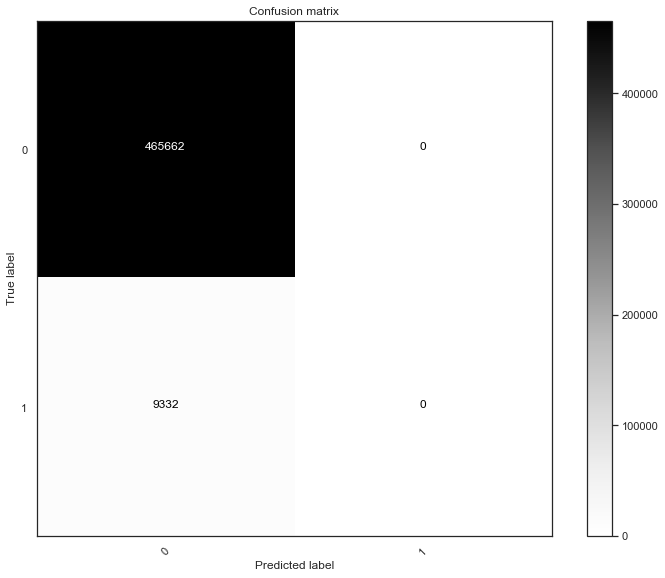

In [338]:
cnf_matrix = confusion_matrix(y_org_test.astype(int), y_org_hat.astype(int))
plot_confusion_matrix(cnf_matrix, classes=[0,1])

AUC: 0.5799115110789568


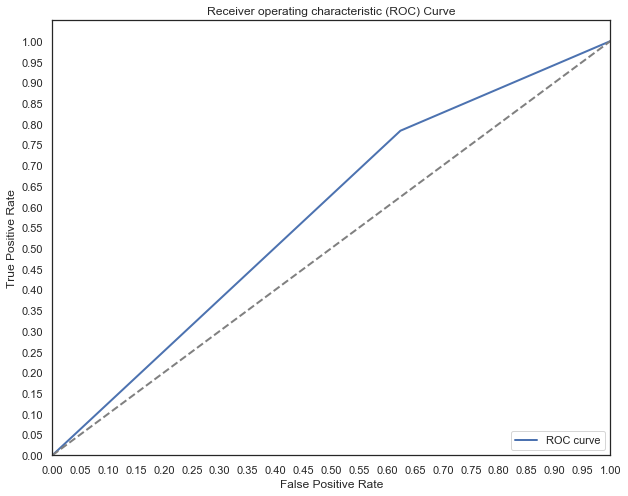

In [196]:
fpr, tpr, thresholds = roc_curve(y_org_test.astype('int'), y_org_hat.astype('int'))
print('AUC:', auc(fpr, tpr))
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, lw=lw, label='ROC curve' )
plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The SMOTE adjusted original model does a great job predicting selected comments, however the AUC decreased due to the decrease in overall accuracy.

In [197]:
accuracy_score(y_upd_test.astype(int), y_upd_hat.astype(int))

0.687054774401146

In [198]:
print(metrics.classification_report(y_upd_test.astype(int), y_upd_hat.astype(int)))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67    372687
           1       0.67      0.75      0.70    372862

    accuracy                           0.69    745549
   macro avg       0.69      0.69      0.69    745549
weighted avg       0.69      0.69      0.69    745549



Confusion matrix, without normalization
[[466008      0]
 [  8986      0]]


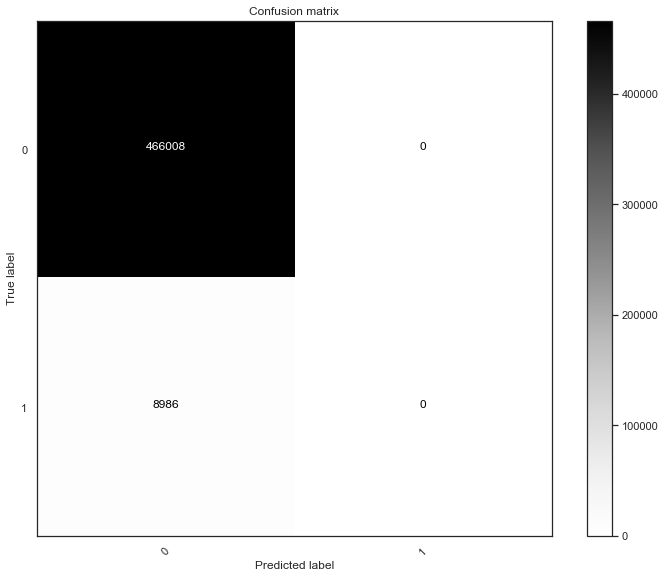

In [339]:
cnf_matrix = confusion_matrix(y_upd_test.astype(int), y_upd_hat.astype(int))
plot_confusion_matrix(cnf_matrix, classes=[0,1])

W0923 14:33:09.045428 140736124887936 legend.py:1289] No handles with labels found to put in legend.


AUC: 0.6870407557303857


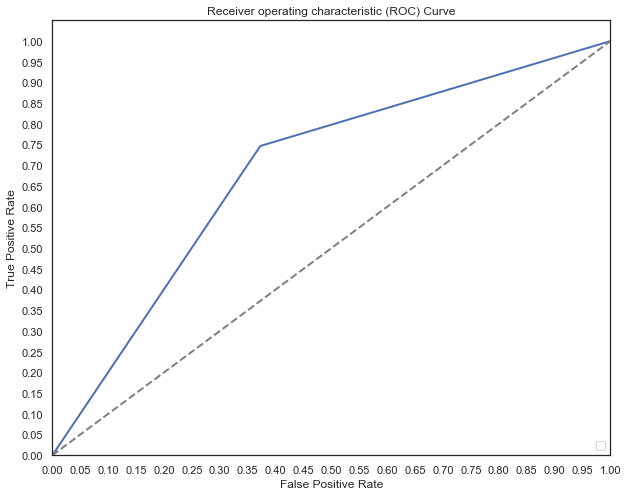

In [200]:
fpr, tpr, thresholds = roc_curve(y_upd_test.astype('int'), y_upd_hat.astype('int'))
print('AUC:', auc(fpr, tpr))
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, lw=lw)
plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The updated dataframe has slightly better performance than the original SMOTE classification. Similarly, the AUC decreased.

The model performance improved with SMOTE, however, given the significant imbalance, it is likely that the synthetic samples have cuased overfitting. I'll complete an undersampling approach for comparison.

__Logistic regression with undersampling__

I'll undersample my datasets so that all classes are equally balanced with the lower selected comments count.

In [201]:
comments_df.head()

articleWordCount  commentWordCount  stopWordCount  emDashCount  \
0          0.588076          0.472600       0.224253          0.0   
1          0.588076          0.263157       0.000000          0.0   
2          0.588076          0.359265       0.224253          0.0   
3          0.588076          0.442789       0.268874          0.0   
4          0.588076          0.632974       0.608155          0.0   

   commentType_reporterReply  newDesk_Arts&Leisure  newDesk_Business  \
0                          0                     0                 0   
1                          0                     0                 0   
2                          0                     0                 0   
3                          0                     0                 0   
4                          0                     0                 0   

   newDesk_Climate  newDesk_Culture  newDesk_Dining  ...  \
0                0                0               0  ...   
1                0                0               0  ...   
2                0                0               0  ...   
3                0                0               0  ...   
4                0                0               0  ...   

   typeOfMaterial_Question  typeOfMaterial_Review  typeOfMaterial_briefing  \
0                        0                      0                        0   
1                        0                      0                        0   
2                        0                      0                        0   
3                        0                      0                        0   
4                        0                      0                        0   

   WeekDay_0  WeekDay_1  WeekDay_2  WeekDay_3  WeekDay_4  WeekDay_5  WeekDay_6  
0          0          0          0          1          0          0          0  
1          0          0          0          1          0          0          0  
2          0          0          0          1          0          0          0  
3          0          0          0          1          0          0          0  
4          0          0          0          1          0          0          0  

[5 rows x 127 columns]

In [202]:
comments = pd.concat([comments_df, comments['editorsSelection']], axis=1)
comments.groupby(comments['editorsSelection'])['editorsSelection'].count() #is this needed?
selected = comments[comments['editorsSelection']=='1']
nonselected = comments[comments['editorsSelection']=='0']
nonselected = nonselected.sample(36104)

In [203]:
data_resampled = pd.concat([selected, nonselected], axis=0)
data_resampled.drop('stopWordCount', axis=1, inplace=True) #delete when comments updated with stopWords

In [204]:
X_upd_cols = [col for col in data_resampled.columns if col != 'editorsSelection']
X_resampled = data_resampled[X_upd_cols]
y_resampled = data_resampled['editorsSelection']

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

In [206]:
logreg = LogisticRegression()

In [207]:
model = logreg.fit(X_train, y_train)

In [208]:
preds = model.predict(X_test)

In [209]:
accuracy_score(y_test, preds)

0.6821404830489697

In [210]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.71      0.63      0.66      9021
           1       0.66      0.74      0.70      9031

    accuracy                           0.68     18052
   macro avg       0.68      0.68      0.68     18052
weighted avg       0.68      0.68      0.68     18052



Confusion matrix, without normalization
[[5644 2361]
 [3377 6670]]


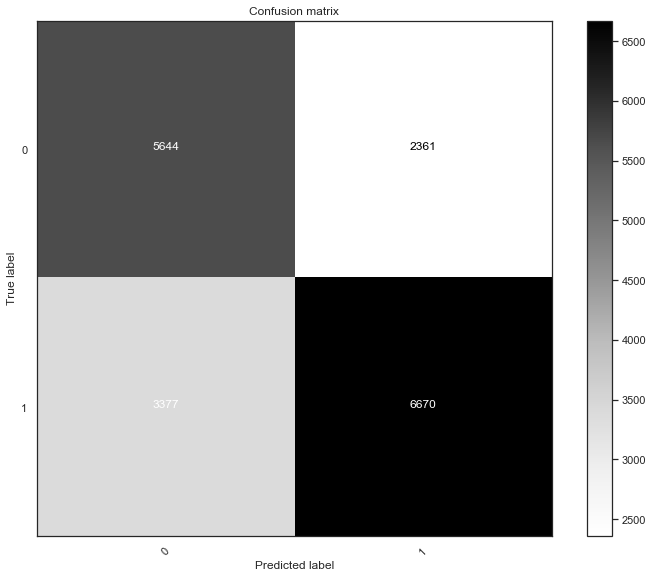

In [211]:
cnf_matrix = confusion_matrix(y_test, preds)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

With undersampling, the classification model has nearly 70% accuracy - an improvement on the baseline and random guessing yet lower than the SMOTE results. However, I have greater confidence in this approach given its use of real samples for all classes.

W0923 14:44:12.546060 140736124887936 legend.py:1289] No handles with labels found to put in legend.


AUC: 0.682109207871872


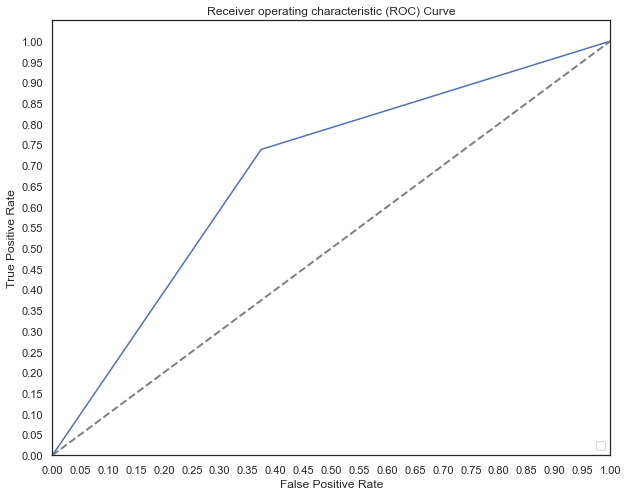

In [212]:
fpr, tpr, thresholds = roc_curve(y_test.astype('int'), preds.astype('int'))
print('AUC:', auc(fpr, tpr))
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The AUC results are about the same as that for SMOTE classification. 

Finally, I'll implement Pipelines for a comprehensive comparison of classification through various models.

__Ensemble model with Pipelines__

At this point, I've used various forms of Logistic Regression to fit and model the comments data. I'll now use Pipelines to perform a few additional models - SVM and Decision Tree - for additional insight and comparison. Thankfully, Pipelines will streamline the process of completing several models at once. Once I've determine which option is ideal for classification, I'll tune the model parameters thorugh grid search to approach optimal performance.

I'll continue using the undersampled set. Moreover, I'll begin the modeling process with PCA to determine a sufficient number of features to include without considerable lost of explained variation while also avoiding multicolinearity that can occur with too many dimensions.

_Downscale features with PCA_

In [213]:
pca_1 = PCA(n_components=20)
pca_2 = PCA(n_components=40)
pca_3 = PCA(n_components=60)
pca_4 = PCA(n_components=80)

principalComponents = pca_1.fit_transform(X_resampled)
principalComponents = pca_2.fit_transform(X_resampled)
principalComponents = pca_3.fit_transform(X_resampled)
principalComponents = pca_4.fit_transform(X_resampled)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))
print(np.sum(pca_4.explained_variance_ratio_))

0.8918631133198217
0.9668427386995518
0.9907804056865176
0.9984740520472561


I'll select a number of features that retains at least 90% of explained variance. 25 seems to be a good middle ground.

_Plot heatmap_

In [214]:
pca_1 = PCA(n_components=25)
principalComponents = pca_1.fit_transform(X_resampled)
print(np.sum(pca_1.explained_variance_ratio_))

0.918293120014324


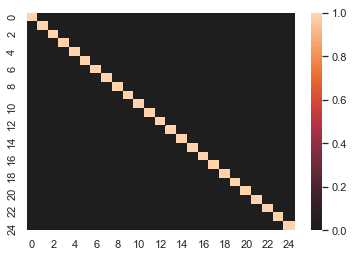

In [215]:
sns.heatmap(pd.DataFrame(principalComponents).corr(), center=0);

The plot confirms that the curse of dimensionality has been mitigated.

_Split resampled data into train and test sets_

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

_Create pipelines_

In [217]:
pipe_log = Pipeline([('log', FunctionTransformer(np.log1p, validate=True)),
                    ('scl', StandardScaler()),
                    ('pca', PCA(n_components=30)),
                    ('clf', LogisticRegression(fit_intercept=True))])
pipe_svm = Pipeline([('log', FunctionTransformer(np.log1p, validate=True)),
                    ('scl', StandardScaler()),
                    ('pca', PCA(n_components=30)),
                    ('clf', svm.SVC())])
pipe_tree = Pipeline([('log', FunctionTransformer(np.log1p, validate=True)),
                    ('scl', StandardScaler()),
                    ('pca', PCA(n_components=30)),
                    ('clf', tree.DecisionTreeClassifier())])

pipelines = [pipe_log, pipe_svm, pipe_tree] 

pipe_dict = {0: 'Logistic Regression', 1: 'Support Vector Machine', 2: 'Decision Tree'}

_View results and compare accuracies_

0.6304010635940616
              precision    recall  f1-score   support

           0       0.65      0.58      0.61      9092
           1       0.61      0.68      0.65      8960

    accuracy                           0.63     18052
   macro avg       0.63      0.63      0.63     18052
weighted avg       0.63      0.63      0.63     18052

Confusion matrix, without normalization
[[5257 2837]
 [3835 6123]]


W0923 14:48:12.563748 140736124887936 legend.py:1289] No handles with labels found to put in legend.


AUC: 0.6307855758201873


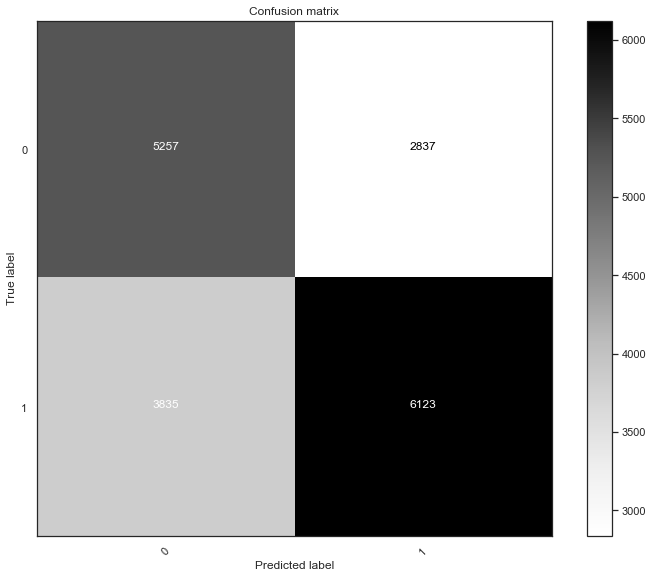

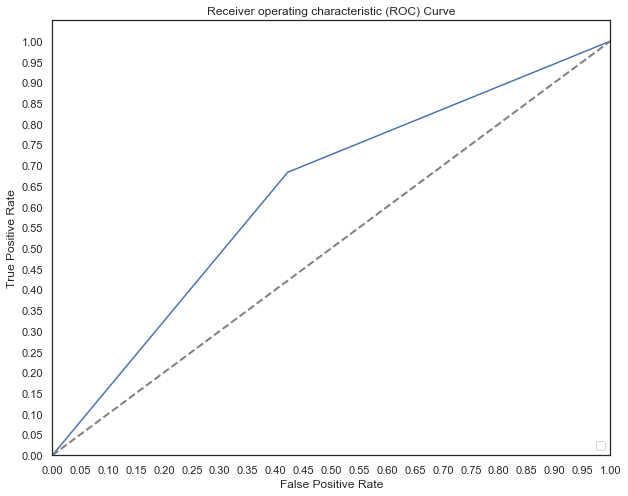

0.6749390649235542
              precision    recall  f1-score   support

           0       0.73      0.56      0.64      9092
           1       0.64      0.79      0.71      8960

    accuracy                           0.67     18052
   macro avg       0.68      0.68      0.67     18052
weighted avg       0.69      0.67      0.67     18052

Confusion matrix, without normalization
[[5126 1902]
 [3966 7058]]


W0923 14:52:10.805929 140736124887936 legend.py:1289] No handles with labels found to put in legend.


AUC: 0.6757577796021619


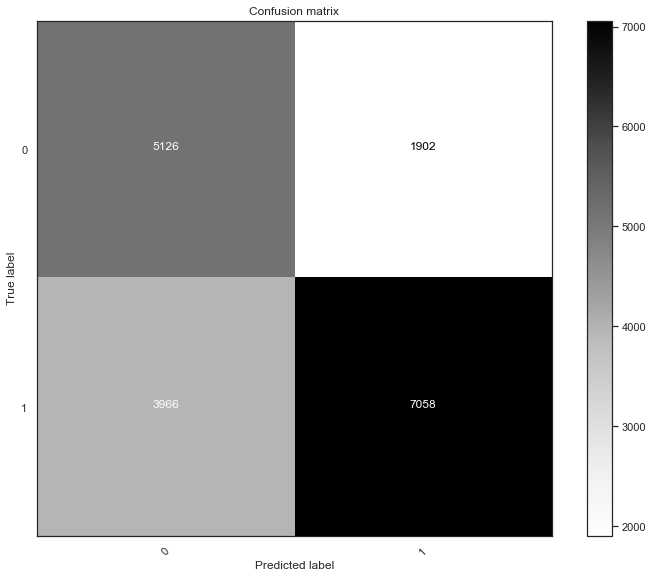

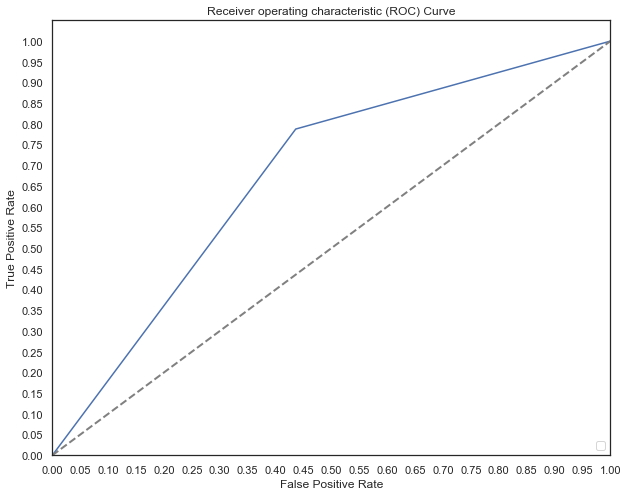

0.5797695546199867
              precision    recall  f1-score   support

           0       0.58      0.59      0.59      9092
           1       0.58      0.56      0.57      8960

    accuracy                           0.58     18052
   macro avg       0.58      0.58      0.58     18052
weighted avg       0.58      0.58      0.58     18052

Confusion matrix, without normalization
[[5408 3902]
 [3684 5058]]
AUC: 0.5796587757683365


W0923 14:52:16.725636 140736124887936 legend.py:1289] No handles with labels found to put in legend.


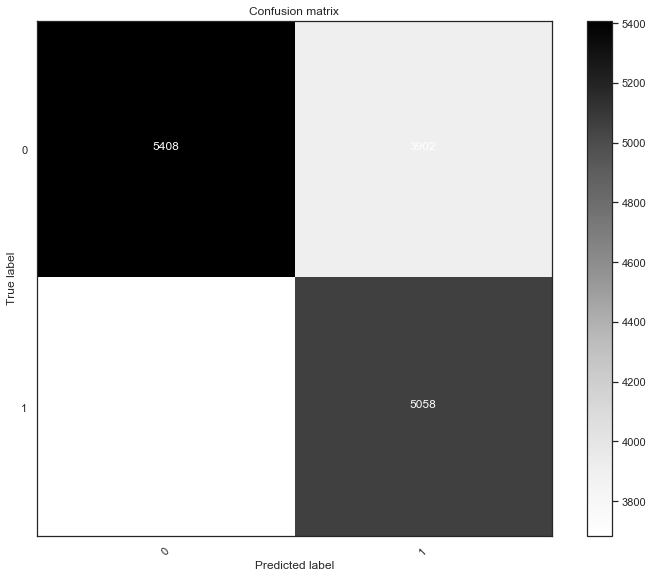

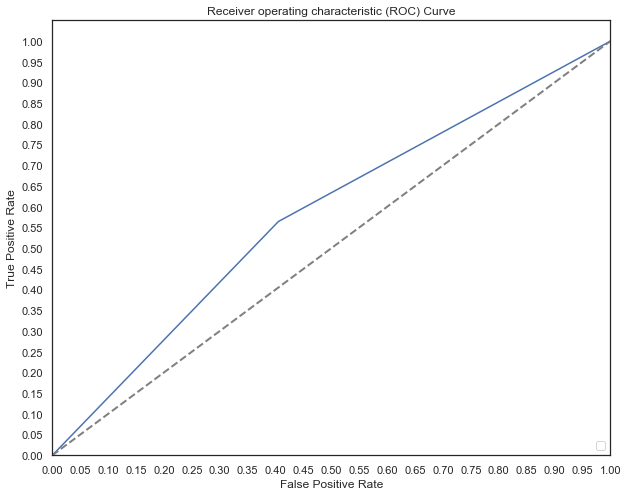

In [218]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    print(accuracy_score(y_test, preds))
    print(metrics.classification_report(y_test, preds))
    cnf_matrix = confusion_matrix(y_test, preds)
    plot_confusion_matrix(cnf_matrix, classes=[0,1])
    fpr, tpr, thresholds = roc_curve(y_test.astype('int'), preds.astype('int'))
    print('AUC:', auc(fpr, tpr))
    lw = 2
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

_Compare SVM and Decision Tree metrics_

The SVM model performed best. I'll rerun this model with gridsearch to determine the best parameters.

_Complete SVM with grid search_

In [219]:
pipe_svm = Pipeline([('log', FunctionTransformer(np.log1p, validate=True)),
                    ('scl', StandardScaler()),
                    ('pca', PCA(n_components=30)),
                    ('clf', svm.SVC())])
# Set grid search params
param_grid_svm = [
  {'clf__C': [0.1, 1, 10]  , 'clf__kernel': ['linear']},
  {'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']},
 ]

# Construct grid search
gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=param_grid_svm,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_svm.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_svm.best_score_)

# Best params
print('\nBest params:\n', gs_svm.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total= 1.5min
[CV] clf__C=0.1, clf__kernel=linear ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV] ................... clf__C=0.1, clf__kernel=linear, total= 1.5min
[CV] clf__C=0.1, clf__kernel=linear ..................................
[CV] ................... clf__C=0.1, clf__kernel=linear, total= 1.4min
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total= 2.5min
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total= 2.4min
[CV] clf__C=1, clf__kernel=linear ....................................
[CV] ..................... clf__C=1, clf__kernel=linear, total= 2.3min
[CV] clf__C=10, clf__kernel=linear ...................................
[CV] .................... clf__C=10, clf__kernel=linear, total= 7.9min
[CV] clf__C=10, clf__kernel=linear ...................................
[CV] .................... clf__C=10, clf__kernel=linear, total=55.8min
[CV] clf__C=10, clf__kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed: 119.4min finished


Best accuracy: 0.681

Best params:
 {'clf__C': 10, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}


In [220]:
gs_svm.cv_results_

{'mean_fit_time': array([  73.71721856,  131.24277568, 1422.58516391,   80.98874998,
          73.40560699,   74.38405871,   71.54974198]),
 'std_fit_time': array([1.85424222e+00, 4.79779064e+00, 1.35238061e+03, 1.00693883e+00,
        4.74590464e-01, 1.53233014e+00, 7.76916238e-01]),
 'mean_score_time': array([ 13.35896579,  13.8764716 ,  13.32194368, 130.14443771,
         17.96581872,  20.32144403,  17.18824442]),
 'std_score_time': array([2.76006491e-01, 4.04436371e-01, 3.35687324e-01, 1.55694921e+02,
        1.29791149e-01, 2.37818927e+00, 5.56712262e-02]),
 'param_clf__C': masked_array(data=[0.1, 1, 10, 1, 1, 10, 10],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_clf__kernel': masked_array(data=['linear', 'linear', 'linear', 'rbf', 'rbf', 'rbf',
                    'rbf'],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'pa

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] clf__C=10, clf__gamma=0.01, clf__kernel=rbf .....................
[CV] ...... clf__C=10, clf__gamma=0.01, clf__kernel=rbf, total= 1.8min
[CV] clf__C=10, clf__gamma=0.01, clf__kernel=rbf .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min remaining:    0.0s


[CV] ...... clf__C=10, clf__gamma=0.01, clf__kernel=rbf, total= 1.5min
[CV] clf__C=10, clf__gamma=0.01, clf__kernel=rbf .....................
[CV] ...... clf__C=10, clf__gamma=0.01, clf__kernel=rbf, total= 1.4min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.5min finished


0.6792045202747617
              precision    recall  f1-score   support

           0       0.74      0.57      0.64      9092
           1       0.64      0.79      0.71      8960

    accuracy                           0.68     18052
   macro avg       0.69      0.68      0.68     18052
weighted avg       0.69      0.68      0.68     18052

Confusion matrix, without normalization
[[5145 1844]
 [3947 7116]]


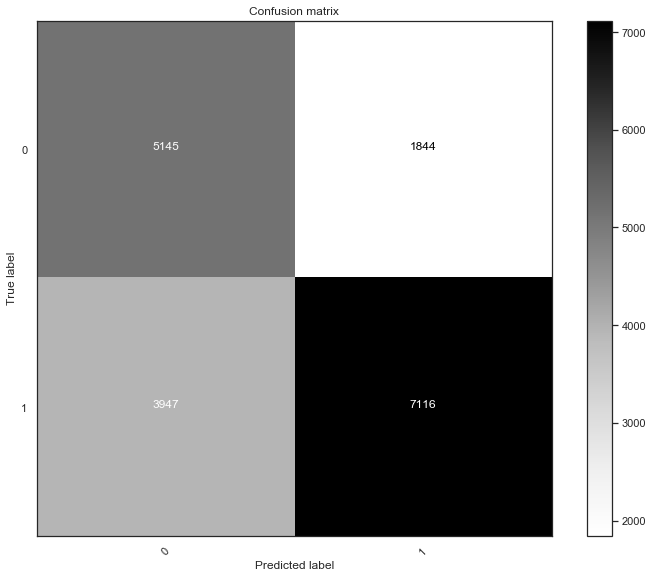

In [221]:
pipe_svm = Pipeline([('log', FunctionTransformer(np.log1p, validate=True)),
                    ('scl', StandardScaler()),
                    ('pca', PCA(n_components=30)),
                    ('clf', svm.SVC())])
# Set grid search params
param_grid_svm = [
  {'clf__C': [10], 'clf__gamma': [0.01], 'clf__kernel': ['rbf']},
 ]

# Construct grid search
gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=param_grid_svm,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_svm.fit(X_train, y_train)
preds = gs_svm.predict(X_test)
print(accuracy_score(y_test, preds))
print(metrics.classification_report(y_test, preds))
cnf_matrix = confusion_matrix(preds, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

AUC: 0.6800392613600653


W0923 17:34:02.269186 140736124887936 legend.py:1289] No handles with labels found to put in legend.


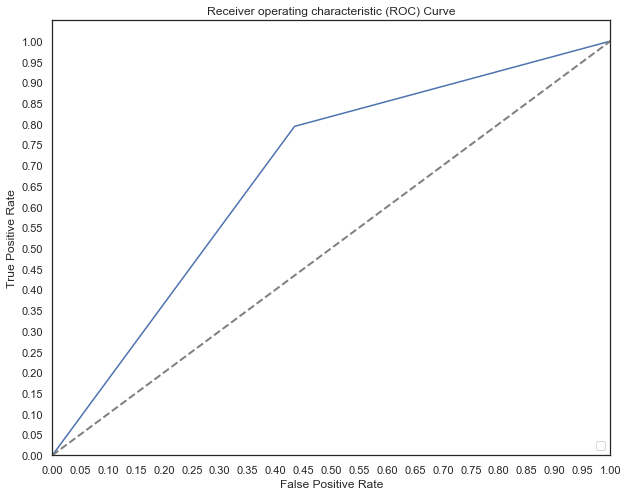

In [222]:
fpr, tpr, thresholds = roc_curve(y_test.astype('int'), preds.astype('int'))
print('AUC:', auc(fpr, tpr))
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

From Gridsearch optimization, the model with best performance results in an accuracy of 68%. This is actually marginally lower than other examples but there is slight improvement in precision and recall, particularly with the Selected class.

## NLP classification analysis

### Previous work

In [ ]:
# path2 = '/Users/paulraymond/Downloads/nyt-comments/Comments'
# all_files2 = glob.glob(path2 + "/*")

# files2 = []

# for filename in all_files2:
#     df = pd.read_csv(filename, index_col = None, header=0)
#     files2.append(df)
    
# comments = pd.concat(files2, axis=0, ignore_index=True)

In [ ]:
# #create train and test sets
# train = comments[:499999]
# test = comments[500000:599999]

In [ ]:
# #organize by flagged comments and unflagged comments, and view first rows
# comments_train = train['commentBody']
# target_train = train['editorsSelection']
# comments_test = test['commentBody']
# target_test = test['editorsSelection']
# print(comments_train.head(1))
# print(target_train.head(1))
# print(comments_test.head(1))
# print(target_test.head(1))
# target_train.unique()

In [ ]:
# print(comments_train.shape)
# print(target_train.shape)
# print(comments_test.shape)
# print(target_test.shape)

In [ ]:
#create list of stop words
stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...', '``', 'br/',"'"]

In [ ]:
#test the nltk method
def process_comments(comment):
    tokens = nltk.word_tokenize(comment)
    stopwords_removed = [token.lower() for token in tokens if token not in stopwords_list]
    return stopwords_removed

In [ ]:
processed_data = list(map(process_comments, comments_train))

In [ ]:
processed_data[0]

In [ ]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

In [ ]:
comments_concat = []
for comment in processed_data:
    comments_concat += comment

In [ ]:
comments_freqdist = FreqDist(comments_concat)
comments_freqdist.most_common(20)

In [ ]:
#would like to remove additional prepositions and stop words and consider bigrams

In [ ]:
#add bigrams and threshold

In [ ]:
# Vectorizing with TF-IDF

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
tf_idf_data_train = vectorizer.fit_transform(comments_train)

In [ ]:
tf_idf_data_test = vectorizer.transform(comments_test)

In [ ]:
#modeling the data

In [ ]:
tf_idf_data_train.shape

In [ ]:
non_zero_cols = tf_idf_data_train.nnz / float(tf_idf_data_train.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tf_idf_data_train.shape[1]))
print('Percentage of columns containing 0: {}'.format(percent_sparse))

In [ ]:
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=10)
#should this be 100?

In [ ]:
nb_classifier.fit(tf_idf_data_train, target_train)
nb_train_preds = nb_classifier.predict(tf_idf_data_train)
nb_test_preds = nb_classifier.predict(tf_idf_data_test)

In [ ]:
rf_classifier.fit(tf_idf_data_train, target_train)
rf_train_preds = rf_classifier.predict(tf_idf_data_train)
rf_test_preds = rf_classifier.predict(tf_idf_data_test)

In [ ]:
print(target_train.shape)
print(nb_train_preds.shape)

In [ ]:
nb_train_score = accuracy_score(target_train, nb_train_preds)
nb_test_score = accuracy_score(target_test, nb_test_preds)
rf_train_score = accuracy_score(target_train, rf_train_preds)
rf_test_score = accuracy_score(target_test, rf_test_preds)

In [ ]:
print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")
print('-'*70)
print("")
print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))

In [ ]:
#import classification report library


In [ ]:
print('NB Classification report:')
print(classification_report(target_test, nb_test_preds))
print("-----------------------------------------------------")
print('RF Classification report:')
print(classification_report(target_test, rf_test_preds))

In [ ]:
#both models did a poor job predicting selected comments

In [ ]:
#plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#import confusion matrix library


In [ ]:
cnf_matrix = confusion_matrix(nb_test_preds, target_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [ ]:
#false and true positive rate
fpr, tpr, thresholds = roc_curve(target_test, nb_test_preds)
#seaborn styling
# sns.set_style('whitegrid')
print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw=2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# the curve shows that the model is no better than random guessing!

In [ ]:
#address class imbalance

In [ ]:
#import class imbalance libraries


In [ ]:
#use SMOTE to imporve the model's performance on the minority class

In [ ]:
print(target_train.value_counts())

In [ ]:
#less than 2% of target values are selected ("1")

In [ ]:
#import train test split library


In [ ]:
# X_train_resampled, y_train_resampled = SMOTE().fit_sample(comments_train, target_train)
# print(pd.Series(y_train_resampled).value_counts())

In [ ]:
#try over sampling

# >>> smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)

In [ ]:
# X, y = make_classification(n_samples=500000, n_features=10, n_informative=2,
#                             n_redundant=0, n_repeated=0, n_classes=3,
#                             n_clusters_per_class=1,
#                             weights=[0.01, 0.05, 0.94],
#                             class_sep=0.8, random_state=0)

In [ ]:
# ros = RandomOverSampler(random_state=0)

In [ ]:
# X_resampled, y_resampled = ros.fit_resample(comments_list, target_train)

The SMOTE method is an issue with text. Will first try balancing samples in brute force approach.

In [ ]:
target_train.get_values().sum()

7869 comments in the train data were selected by editors. I'll concat two new dataframes of this length for balanced sample.

In [ ]:
selected = train[train['editorsSelection']==1]
non_selected = train[train['editorsSelection']==0]

In [ ]:
selected.shape

In [ ]:
non_selected_sample = non_selected.sample(7869)
non_selected_sample.shape

In [ ]:
# concat the dataframes
df_nlp = pd.concat([selected, non_selected_sample], axis=0)
# df_nlp.info()

In [ ]:
df_comments_train = df_nlp['commentBody'] 
df_comments_train.shape

In [ ]:
df_target_train = df_nlp['editorsSelection']

In [ ]:
#perform classification 

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
tf_idf_data_train = vectorizer.fit_transform(df_comments_train)

In [ ]:
tf_idf_data_test = vectorizer.transform(comments_test)
#using only subset to make train ~25%

In [ ]:
non_zero_cols = tf_idf_data_train.nnz / float(tf_idf_data_train.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tf_idf_data_train.shape[1]))
print('Percentage of columns containing 0: {}'.format(percent_sparse))
##double check the equation

In [ ]:
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=10)
#should this be 100?

In [ ]:
nb_classifier.fit(tf_idf_data_train, df_target_train)
nb_train_preds = nb_classifier.predict(tf_idf_data_train)
nb_test_preds = nb_classifier.predict(tf_idf_data_test)

In [ ]:
rf_classifier.fit(tf_idf_data_train, df_target_train)
rf_train_preds = rf_classifier.predict(tf_idf_data_train)
rf_test_preds = rf_classifier.predict(tf_idf_data_test)

In [ ]:
nb_train_score = accuracy_score(df_target_train, nb_train_preds)
nb_test_score = accuracy_score(target_test, nb_test_preds)
rf_train_score = accuracy_score(df_target_train, rf_train_preds)
rf_test_score = accuracy_score(target_test, rf_test_preds)

In [ ]:
print('NB Classification report:')
print(classification_report(target_test, nb_test_preds))
print("-----------------------------------------------------")
print('RF Classification report:')
print(classification_report(target_test, rf_test_preds))

In [ ]:
#very slight improvement

In [ ]:
#recall is high because

In [ ]:
#issues are: 1. brute force oversampling 2. the test set is significantly greater than train set

### NLP with Naive Bayesian classification

#### Word frequency and visualization

__Reload Comments data__

In [225]:
path  = '/Users/paulraymond/Documents/section1/dsc-3-final-project-online-ds-ft-021119/comments_v3'
reader = open(path)
comments = pd.read_csv(path, index_col=0)
comments.head()

approveDate                 articleID  articleWordCount  \
0   1517529462  5a7258e410f40f00018bed7d             835.0   
1   1517529428  5a7258e410f40f00018bed7d             835.0   
2   1517529427  5a7258e410f40f00018bed7d             835.0   
3   1517529425  5a7258e410f40f00018bed7d             835.0   
4   1517529418  5a7258e410f40f00018bed7d             835.0   

                                         commentBody   commentID  \
0  The snake-filled heads comment made me think o...  25791250.0   
1                      She-devil reporting for duty!  25795675.0   
2                   XX is the new mark of the devil.  25792078.0   
3  "Courtland Sykes" should be writing for The On...  25791604.0   
4  I happen to descend for a few of them, because...  25795241.0   

   commentSequence commentTitle commentType    createDate  depth  ...  \
0       25791250.0        <br/>     comment  1.517508e+09    1.0  ...   
1       25795675.0        <br/>     comment  1.517527e+09    1.0  ...   
2       25792078.0        <br/>     comment  1.517511e+09    1.0  ...   
3       25791604.0        <br/>     comment  1.517510e+09    1.0  ...   
4       25795241.0        <br/>     comment  1.517525e+09    1.0  ...   

   updateDate  userDisplayName      userID            userLocation userTitle  \
0  1517529462           Jennie  79172841.0                      WA       NaN   
1  1517529428  Nice White Lady  66376882.0                 Seattle       NaN   
2  1517529427      Stan Sutton  27924638.0  Westchester County, NY       NaN   
3  1517529425      Phil Carson  31909107.0                  Denver       NaN   
4  1517529418             Abby  55271958.0                  Tucson       NaN   

  userURL commentWordCount  stopWordCount  punctuationCount  emDashCount  
0     NaN               17            4.0                 7            0  
1     NaN                4            1.0                 1            0  
2     NaN                8            4.0                 1            0  
3     NaN               14            5.0                 2            0  
4     NaN               47           23.0                 7            0  

[5 rows x 38 columns]

In [226]:
text_data = comments[['commentBody', 'editorsSelection']]

_Take sample for preliminary work_

In [268]:
# delete later
sample = comments[['commentBody', 'editorsSelection']].sample(n=100000, random_state=1)

In [269]:
sample_unselected = sample[sample['editorsSelection']==0]

In [270]:
sample_selected = sample[sample['editorsSelection']==1]

In [271]:
sample_selected.head()

commentBody  editorsSelection
1816971  Trumps proposed budget is ignorant, but crafty...                 1
1340835  People are detained by the Feds without access...                 1
1735203  I know these negotiations are complex, but in ...                 1
1734405  Great reporting by all, again, and an eye-open...                 1
186650   I don't believe, as the writer implies in the ...                 1

__Create bag of words__

_Clean and tokenize text_

In [231]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
comments_list = []
for entry in sample_selected['commentBody']:
    comment = entry
    comment_token = nltk.regexp_tokenize(comment, pattern)
    comments_list.append(comment_token)

_Get count vectorization_

In [232]:
def count_vectorize(comment):
    unique_words = list(set(comment))   
    comment_dict = {i:0 for i in unique_words}
    for word in comment:
        comment_dict[word] += 1
    return comment_dict

In [233]:
def BoW(comments):
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    comments_list = []
    for entry in comments:
        comment = entry
        comment_token = nltk.regexp_tokenize(comment, pattern)
        comments_list.append(comment_token)
    count_vectorized_comments = []
    for entry in comments_list:
        cv_comment = count_vectorize(entry)
        count_vectorized_comments.append(cv_comment)
    return count_vectorized_comments

In [234]:
selected_bag = BoW(sample_selected['commentBody'])

In [235]:
unselected_bag = BoW(sample_unselected['commentBody'])

_Determine term frequency_

In [236]:
def term_frequency(BoW_dict):
    total_word_count = sum(BoW_dict.values())
    
    for ind, val in BoW_dict.items():
        BoW_dict[ind] = val/ total_word_count
    
    return BoW_dict

In [237]:
test = term_frequency(selected_bag[0])
len(test)

167

_Determine inverse document frequency_

In [238]:
def inverse_document_frequency(list_of_dicts):
    vocab_set = set()
    # Iterate through list of dfs and add index to vocab_set
    for d in list_of_dicts:
        for word in d.keys():
            vocab_set.add(word)
    
    # Once vocab set is complete, create an empty dictionary with a key for each word and value of 0.
    full_vocab_dict = {i:0 for i in vocab_set}
    
    # Loop through each word in full_vocab_dict
    
    for word, val in full_vocab_dict.items():
        docs = 0
        
#         # Loop through list of dicts.  Each time a dictionary contains the word, increment docs by 1
        for d in list_of_dicts:
            if word in d:
                docs += 1
        
#         # Now that we know denominator for equation, compute and set IDF value for word
        
        full_vocab_dict[word] = np.log((len(list_of_dicts)/ float(docs)))
    
    return full_vocab_dict

In [239]:
# inverse_document_frequency(selected_bag)
len(inverse_document_frequency(selected_bag))

9691

_Compute TF-IDF_

In [240]:
def tf_idf(list_of_dicts):
    com_tf_idf = {}
    idf = inverse_document_frequency(list_of_dicts)
    full_vocab_list = {i:0 for i in list(idf.keys())}
    
    tf_idf_list_of_dicts = []

    for dic in list_of_dicts:
        com_tf = term_frequency(dic)
        for word in com_tf:
            com_tf_idf[word] = com_tf[word] * idf[word]
        tf_idf_list_of_dicts.append(com_tf_idf)
    
    return tf_idf_list_of_dicts

In [241]:
selected_tf_idf = tf_idf(selected_bag)
unselected_tf_idf = tf_idf(unselected_bag)

In [32]:
# for entry in selected_tf_idf:
#     print(len(entry))
selected_tf_idf[0] == selected_tf_idf[13]
# why is each dictionary the same?

True

_View frequencies_

In [242]:
# selected_tf_idf[:10]

In [418]:
# example
# import operator
# x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
# sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True)
# sorted_x
type(selected_tf_idf) #list of dictionaries

list

In [421]:
sorted_selected = sorted(selected_tf_idf.items(), key=operator.itemgetter(1), reverse=True)[:10]
sorted_selected

TypeError: '<' not supported between instances of 'dict' and 'dict'

_View plots_

In [424]:
sel_tf_idf_vals_list = []
for i in selected_tf_idf:
    sel_tf_idf_vals_list.append(list(i.values()))

In [425]:
unsel_tf_idf_vals_list = []
for i in unselected_tf_idf:
    unsel_tf_idf_vals_list.append(list(i.values()))

In [426]:
t_sne_object_3d = TSNE(n_components=3)
selected_transformed_data_3d = t_sne_object_3d.fit_transform(sel_tf_idf_vals_list)
selected_transformed_data_3d

array([[ -62.08082 ,    6.145499,  -65.06371 ],
       [ -22.02703 ,   13.769129,   31.347393],
       [  43.39942 ,   78.11272 ,  -58.081944],
       ...,
       [  89.19463 , -128.5424  ,   39.600475],
       [ -69.32172 ,  -22.283472, -102.744896],
       [  39.667385,   28.526787,  -47.621407]], dtype=float32)

In [ ]:
unselected_transformed_data_3d = t_sne_object_3d.fit_transform(unsel_tf_idf_vals_list)
unselected_transformed_data_3d 

_3D visualization_

In [ ]:
selected_3d = selected_transformed_data_3d
s3_x = [i[0] for i in selected_3d]
s3_y = [i[1] for i in selected_3d]
s3_z = [i[2] for i in selected_3d]

unselected_3d = unselected_transformed_data_3d
u3_x = [i[0] for i in unselected_3d]
u3_y = [i[1] for i in unselected_3d]
u3_z = [i[2] for i in unselected_3d]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(s3_x, s3_y, s3_z, c='b', s=60, label='Selected')
ax.scatter(u3_x, u3_y, u3_z, c='red', s=60, label='Unselected')
ax.view_init(30, 10)
ax.legend()
plt.show()

_2D visualization_

In [ ]:
# wv.most_similar('Kanye')

In [ ]:
# top_ten_songs = dict(song_freq['Content Name'][:10])
# top_ten_songs
# top_ten_lyrics = []
# # for index, song in top_ten_songs.items():
# #     lyrics = lyrics_df['Lyrics'][87]
# top_df = pd.DataFrame({'Song':top_ten_songs})
# songs_lyrics_df = pd.DataFrame({'Song':lyrics_df['Song'], 'Lyrics': lyrics_df['Lyrics']})
# #complete

### Classification of text feature

__Classification with Pipelines__

_Split data into train and test sets_

In [272]:
X_train, X_test, y_train, y_test = train_test_split(sample['commentBody'], sample['editorsSelection']) #delete later
# X_train, X_test, y_train, y_test = train_test_split(comments['commentBody'], comments['editorsSelection'])

_Create pipeline_

In [273]:
base_clf = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', MultinomialNB())
                    ]) #is there issue doing both? tfidf alone si raising an error
svm_clf = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', svm.SVC())
                    ]) #is there issue doing both? tfidf alone si raising an error
tree_clf = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                    ('clf', tree.DecisionTreeClassifier())
                    ])
rf_clf = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', RandomForestClassifier())
                    ])

In [274]:
pipelines = [base_clf, svm_clf, tree_clf, rf_clf]

_Fit data and predict data and view results_

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf_vectorizer',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)
Training Accuracy: 0.9813 	

<Figure size 576x576 with 0 Axes>

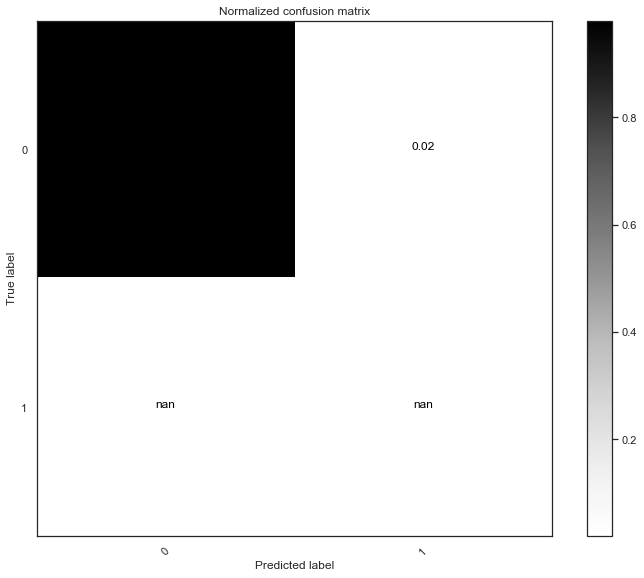

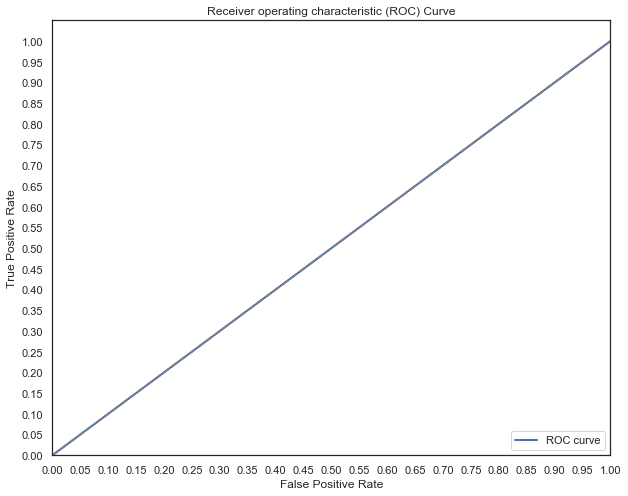

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf_vectorizer',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degr

<Figure size 576x576 with 0 Axes>

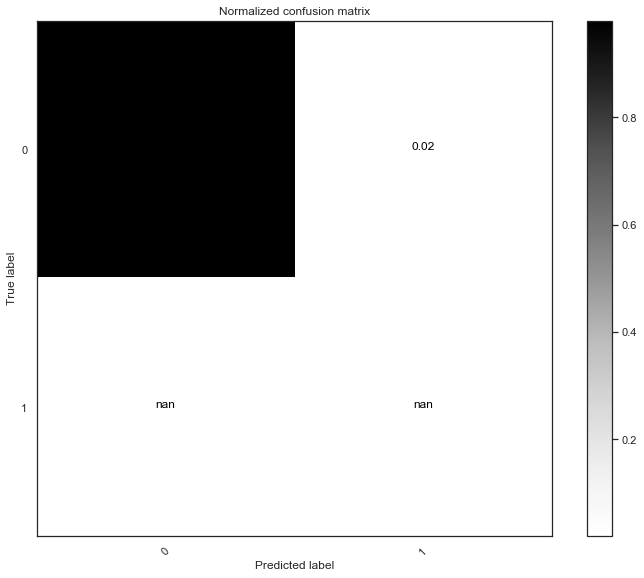

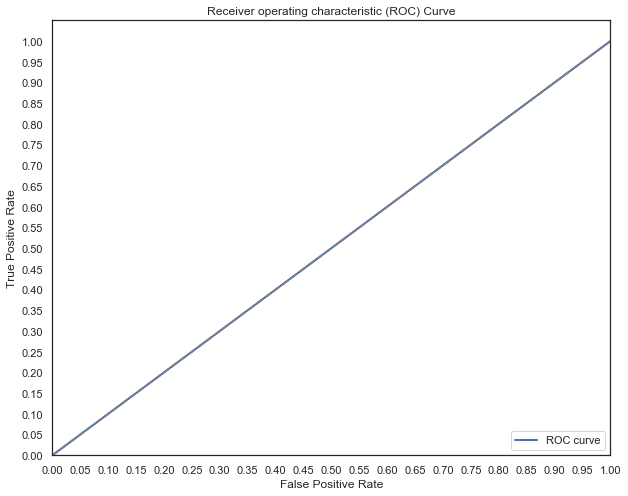

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vo...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                            

<Figure size 576x576 with 0 Axes>

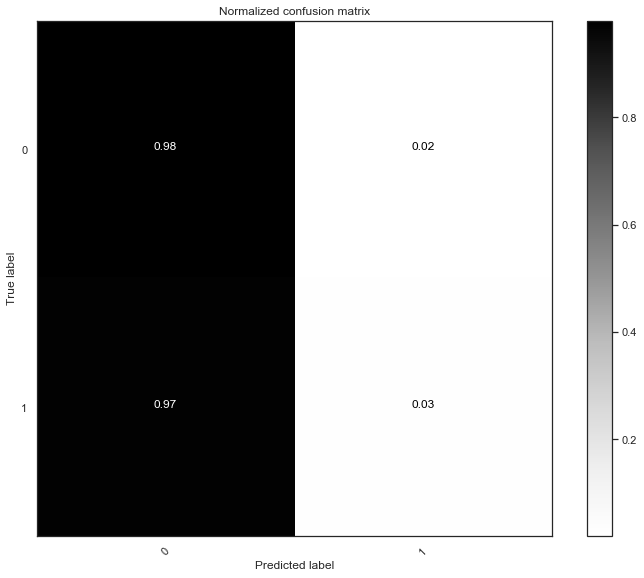

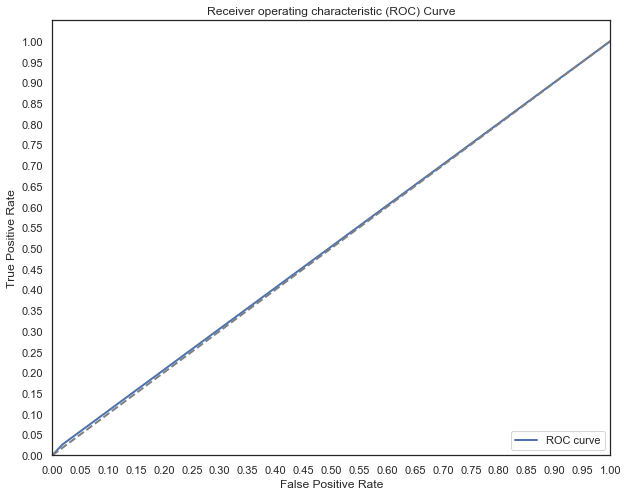

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vo...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

<Figure size 576x576 with 0 Axes>

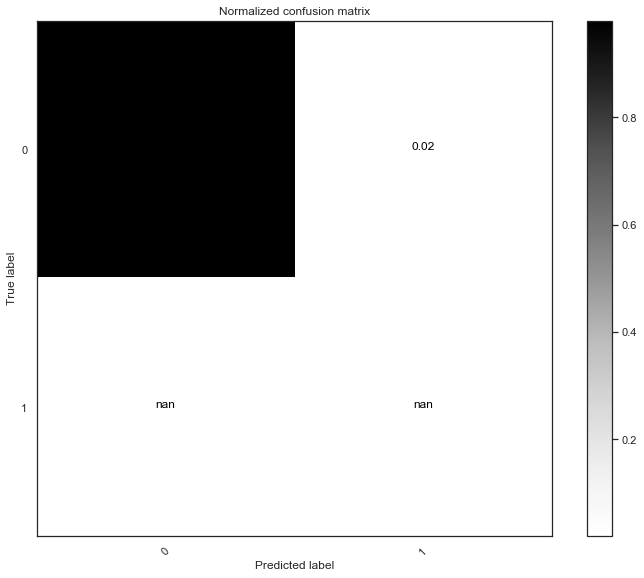

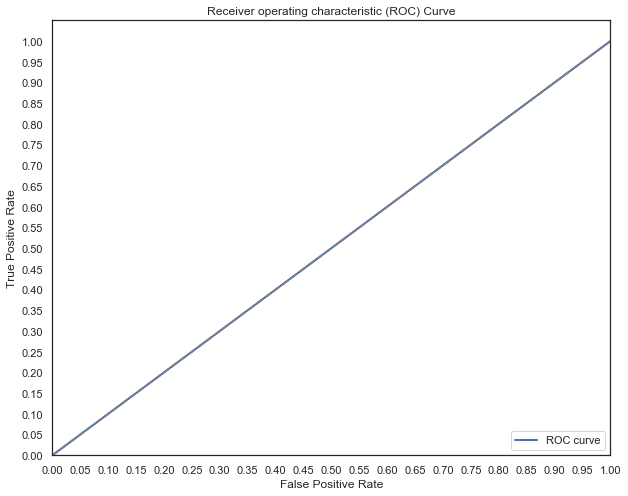

In [275]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    train_preds = pipe.predict(X_train)
    test_preds = pipe.predict(X_test)
    train_score = accuracy_score(y_train, train_preds)
    test_score = accuracy_score(y_test, test_preds)
    print(pipe)
    print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(train_score, test_score))
    print("")
    print('-'*70)
    print("")
    print(metrics.classification_report(y_test, test_preds))
    print("")
    print('-'*70)
    print("")
    cnf_matrix = confusion_matrix(y_test, test_preds)
    plt.figure(figsize=(8, 8))
    plot_confusion_matrix(cnf_matrix, classes=list(set(y_train)), normalize=True,
                      title='Normalized confusion matrix')
    fpr, tpr, thresholds = roc_curve(y_test.astype('int'), test_preds.astype('int'))
    print('AUC:', auc(fpr, tpr))
    lw = 2
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    
    plt.show()

In this pipelines set, each model performs poorly with the 'selected' class due to imbalance in the data sample. In fact, the ROC curves show that the models don't perform better than random guessing. I'll address this through both SMOTE and undersampling.

__SMOTE__

_Address class imbalance with SMOTE_

_Vectorize text_ 

In [276]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(sample.commentBody)

In [277]:
count_vectorizer.vocabulary_.get('money')

45327

_Create term frequencies_

In [278]:
transformer = TfidfTransformer()
X_tf = transformer.fit_transform(X)

_Perform SMOTE_

In [279]:
# y = sample['editorsSelection']
X_SMOTE, y_SMOTE = SMOTE().fit_sample(X_tf, sample['editorsSelection'])
# X_SMOTE, y_SMOTE = SMOTE().fit_sample(X_tf, comments['editorsSelection']) 

In [280]:
print(pd.Series(y_SMOTE).value_counts())

1    98091
0    98091
dtype: int64


_Split data into train and test sets_

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE)

In [282]:
print(len(y_test))
y_test

49046


array([1, 1, 1, ..., 1, 0, 0])

In [283]:
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier()

In [284]:
nb_classifier.fit(X_train, y_train)
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

In [285]:
rf_classifier.fit(X_train, y_train)
rf_train_preds = rf_classifier.predict(X_train)
rf_test_preds = rf_classifier.predict(X_test)

In [286]:
nb_train_score = accuracy_score(y_train, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)
rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)

print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")
print('-'*70)
print("")
print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))

Multinomial Naive Bayes
Training Accuracy: 0.8828 		 Testing Accuracy: 0.8648

----------------------------------------------------------------------

Random Forest
Training Accuracy: 0.9993 		 Testing Accuracy: 0.9894


In [287]:
print(metrics.classification_report(y_test, nb_test_preds))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85     24582
           1       0.79      0.99      0.88     24464

    accuracy                           0.86     49046
   macro avg       0.89      0.87      0.86     49046
weighted avg       0.89      0.86      0.86     49046



Normalized confusion matrix
[[0.9915658 0.0084342]
 [0.210381  0.789619 ]]


<Figure size 576x576 with 0 Axes>

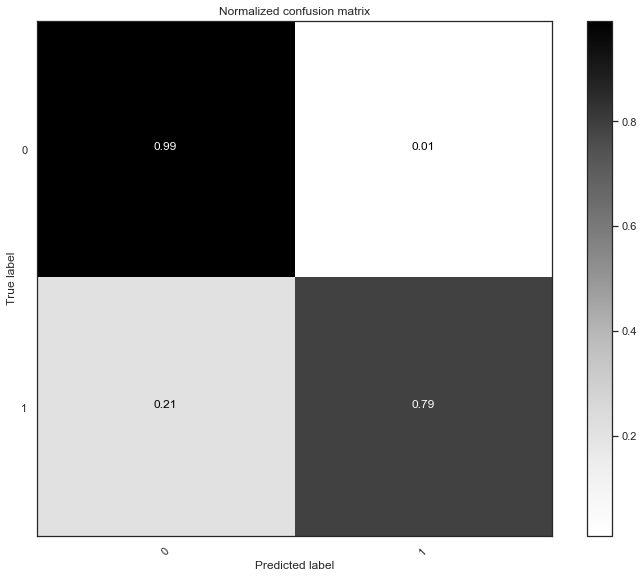

In [288]:
cnf_matrix = confusion_matrix(y_test, nb_test_preds)

plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=list(set(y_train)), normalize=True,
                      title='Normalized confusion matrix')


plt.show()

In [289]:
print(metrics.classification_report(y_test, rf_test_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     24582
           1       1.00      0.98      0.99     24464

    accuracy                           0.99     49046
   macro avg       0.99      0.99      0.99     49046
weighted avg       0.99      0.99      0.99     49046



Normalized confusion matrix
[[0.98282504 0.01717496]
 [0.00373042 0.99626958]]


<Figure size 576x576 with 0 Axes>

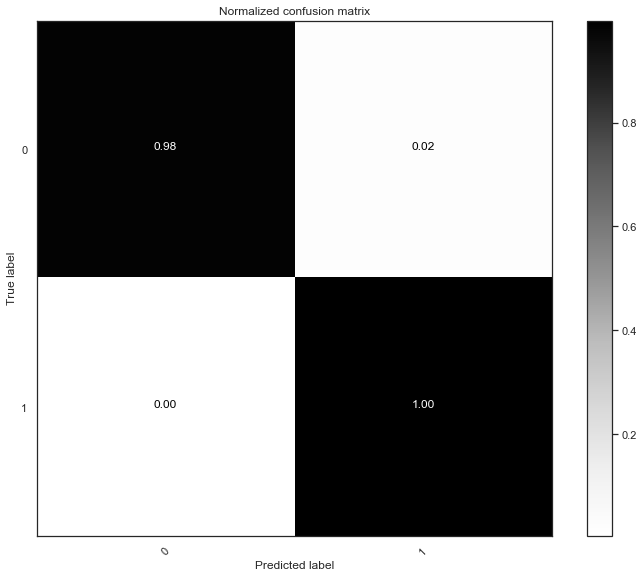

In [290]:
cnf_matrix = confusion_matrix(y_test, rf_test_preds)

plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=list(set(y_train)), normalize=True,
                      title='Normalized confusion matrix')
plt.show()

W0923 18:08:12.551098 140736124887936 legend.py:1289] No handles with labels found to put in legend.


AUC: 0.989421844821611
AUC: 0.8651097793964


W0923 18:08:12.789288 140736124887936 legend.py:1289] No handles with labels found to put in legend.


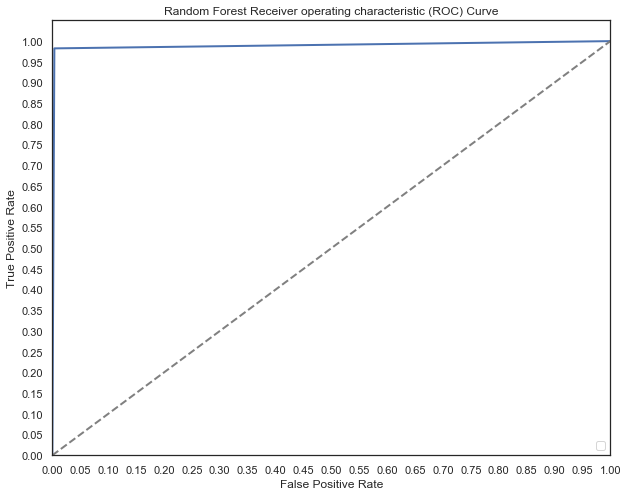

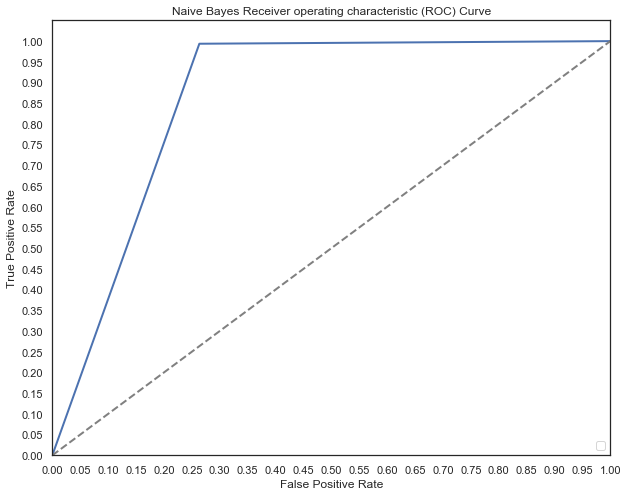

In [291]:
fpr, tpr, thresholds = roc_curve(y_test.astype('int'), rf_test_preds.astype('int'))
print('AUC:', auc(fpr, tpr))
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, lw=lw)
plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")

fpr, tpr, thresholds = roc_curve(y_test.astype('int'), nb_test_preds.astype('int'))
print('AUC:', auc(fpr, tpr))
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, lw=lw)
plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

A significant improvement: both ROC curves have strong results, likely due to the great accuracy of the SMOTE models.

As expected, the SMOTE adjustment improved the model performance, particularly for the 'Selected' class.

__Classification with undersampling__

In [309]:
# delete this version later
selected = sample[sample['editorsSelection']==1]
nonselected = sample[sample['editorsSelection']==0]
nonselected = nonselected.sample(1909)


# comments = pd.concat([comments['commentBody'], comments['editorsSelection']], axis=1)
# selected = comments[comments['editorsSelection']=='1']
# nonselected = comments[comments['editorsSelection']=='0']
# nonselected = nonselected.sample(36104)

In [310]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909 entries, 1816971 to 445177
Data columns (total 2 columns):
commentBody         1909 non-null object
editorsSelection    1909 non-null int64
dtypes: int64(1), object(1)
memory usage: 44.7+ KB


In [311]:
data_resampled = pd.concat([selected, nonselected], axis=0)
data_resampled.shape

(3818, 2)

In [312]:
X_train, X_test, y_train, y_test = train_test_split(data_resampled['commentBody'], data_resampled['editorsSelection'], test_size=.4)

In [313]:
base_clf = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', MultinomialNB())
                    ]) 
svm_clf = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', svm.SVC())
                    ]) 
tree_clf = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                    ('clf', tree.DecisionTreeClassifier())
                    ])
rf_clf = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', RandomForestClassifier())
                    ])

In [314]:
pipelines = [base_clf, svm_clf, tree_clf, rf_clf]

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf_vectorizer',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)
Training Accuracy: 0.7681 	

<Figure size 576x576 with 0 Axes>

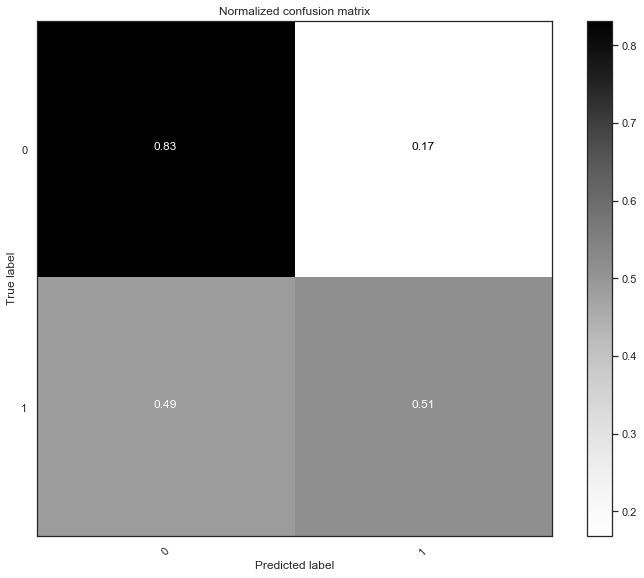

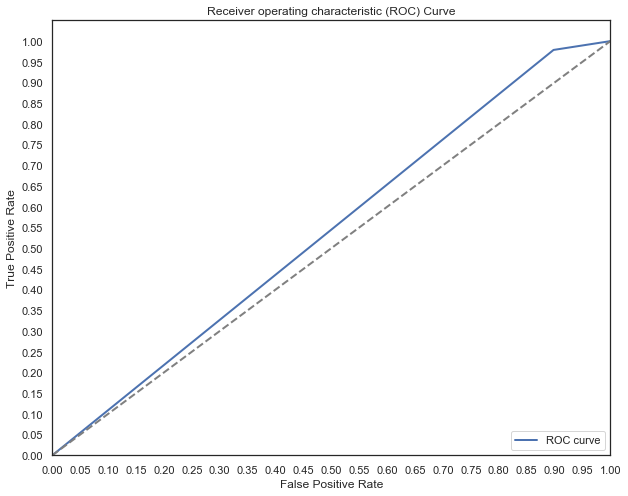

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf_vectorizer',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degr

<Figure size 576x576 with 0 Axes>

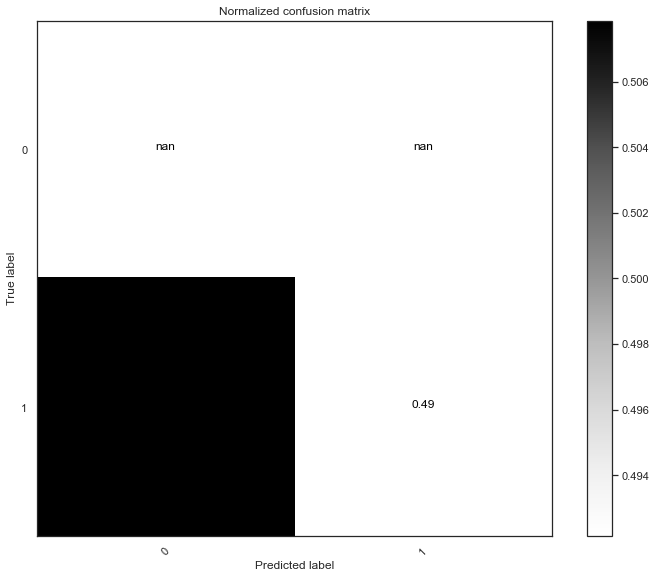

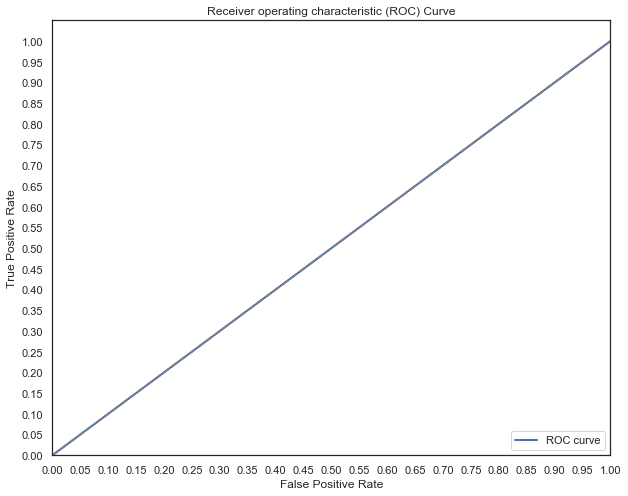

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vo...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                            

<Figure size 576x576 with 0 Axes>

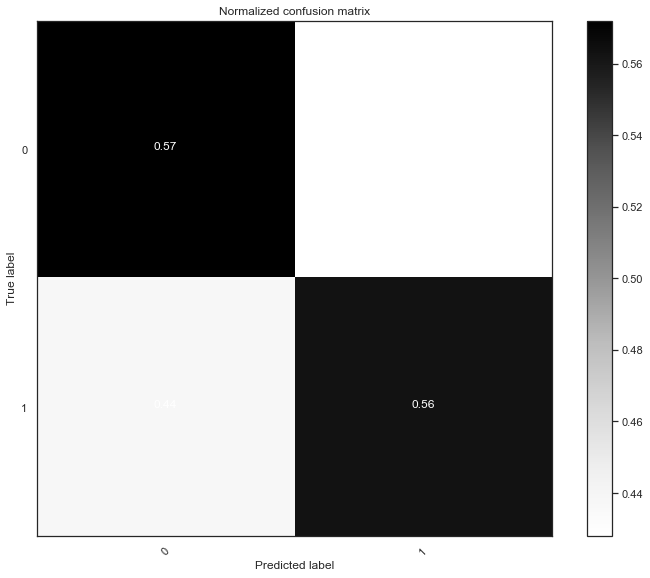

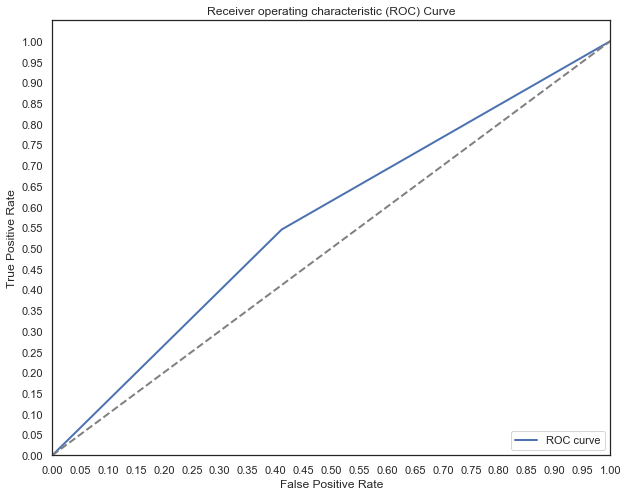

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vo...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

<Figure size 576x576 with 0 Axes>

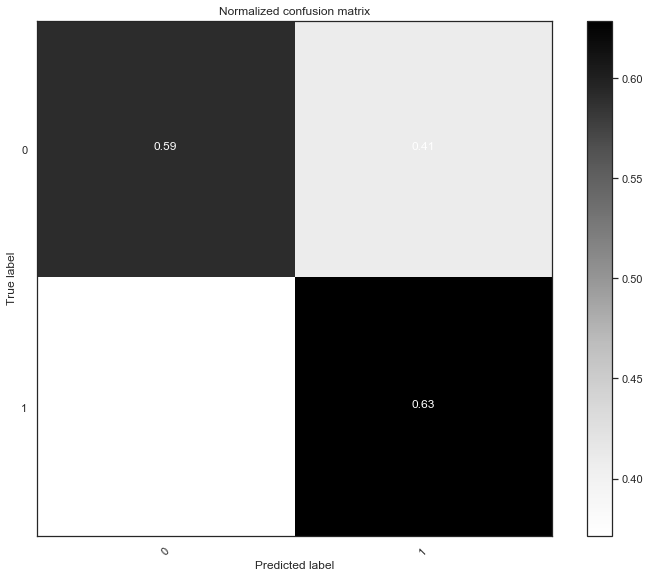

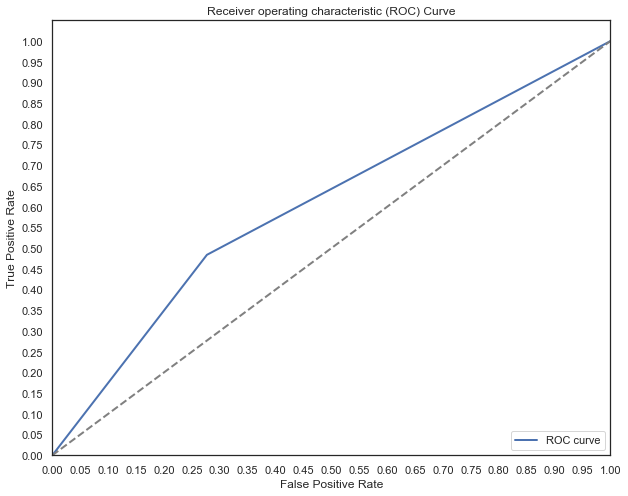

In [317]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    train_preds = pipe.predict(X_train)
    test_preds = pipe.predict(X_test)
    train_score = accuracy_score(y_train, train_preds)
    test_score = accuracy_score(y_test, test_preds)
    print(pipe)
    print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(train_score, test_score))
    print("")
    print('-'*70)
    print("")
    print(metrics.classification_report(y_test, test_preds))
    print("")
    print('-'*70)
    print("")
    cnf_matrix = confusion_matrix(y_test, test_preds)
    plt.figure(figsize=(8, 8))
    plot_confusion_matrix(cnf_matrix, classes=list(set(y_train)), normalize=True,
                      title='Normalized confusion matrix')
    
    fpr, tpr, thresholds = roc_curve(y_test.astype('int'), test_preds.astype('int'))
    print('AUC:', auc(fpr, tpr))
    lw = 2
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    
    plt.show()

Logistic and SVM classification models perform poorly; Decision Tree and Random Forest both perform considerably better than random guessing. The issue driving the decrease in performance relative to SMOTE is that this sample size is less than 5 percent of the SMOTE data set.

That being said, given the significant class imbalance that led to SMOTE model with subsequently significant synthethic camples, I think the more reliable approach is move forward with the undersampled model. I will finalize the model and results with additional parameter tuning.

In [318]:
rf_clf = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', RandomForestClassifier())
                    ])
# Set grid search params

param_grid_rf = {"clf__max_depth": [3, 1, None],
              "clf__max_features": [1, 3, 5, 10],
              "clf__min_samples_split": [2, 3, 5, 10],
              "clf__bootstrap": [True, False],
              "clf__criterion": ["gini", "entropy"]}

# Construct grid search
gs_rf = GridSearchCV(estimator=rf_clf,
            param_grid=param_grid_rf,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=1, clf__min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=1, clf__min_samples_split=2, total=   0.3s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=1, clf__min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=1, clf__min_samples_split=2, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=1, clf__min_samples_split=2 
[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=1, clf__min_samples_split=2, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=1, clf__min_samples_split=3 
[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=1, clf__min_samples_split=3, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=1, clf__min_samples_split=3 
[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=1, clf__min_samples_split=3, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=1, clf__min_samples_split=3 
[CV]  clf__bootstrap=True, clf__criterion=gi

[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=10, clf__min_samples_split=2, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=10, clf__min_samples_split=2 
[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=10, clf__min_samples_split=2, total=   0.3s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=10, clf__min_samples_split=2 
[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=10, clf__min_samples_split=2, total=   0.3s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=10, clf__min_samples_split=3 
[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=10, clf__min_samples_split=3, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=3, clf__max_features=10, clf__min_samples_split=3 
[CV]  clf__bootstrap=True, clf__crit

[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=1, clf__max_features=3, clf__min_samples_split=10, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=1, clf__max_features=5, clf__min_samples_split=2 
[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=1, clf__max_features=5, clf__min_samples_split=2, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=1, clf__max_features=5, clf__min_samples_split=2 
[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=1, clf__max_features=5, clf__min_samples_split=2, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=1, clf__max_features=5, clf__min_samples_split=2 
[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=1, clf__max_features=5, clf__min_samples_split=2, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=1, clf__max_features=5, clf__min_samples_split=3 
[CV]  clf__bootstrap=True, clf__criterion=g

[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=None, clf__max_features=1, clf__min_samples_split=10, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=None, clf__max_features=1, clf__min_samples_split=10 
[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=None, clf__max_features=1, clf__min_samples_split=10, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=None, clf__max_features=1, clf__min_samples_split=10 
[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=None, clf__max_features=1, clf__min_samples_split=10, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=None, clf__max_features=3, clf__min_samples_split=2 
[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=None, clf__max_features=3, clf__min_samples_split=2, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=None, clf__max_features=3, clf__min_samples_split=2 
[CV]  clf__boot

[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=None, clf__max_features=10, clf__min_samples_split=5, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=None, clf__max_features=10, clf__min_samples_split=5 
[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=None, clf__max_features=10, clf__min_samples_split=5, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=None, clf__max_features=10, clf__min_samples_split=10 
[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=None, clf__max_features=10, clf__min_samples_split=10, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=None, clf__max_features=10, clf__min_samples_split=10 
[CV]  clf__bootstrap=True, clf__criterion=gini, clf__max_depth=None, clf__max_features=10, clf__min_samples_split=10, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=gini, clf__max_depth=None, clf__max_features=10, clf__min_samples_split=10 
[CV]  c

[CV]  clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=3, clf__max_features=5, clf__min_samples_split=3, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=3, clf__max_features=5, clf__min_samples_split=5 
[CV]  clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=3, clf__max_features=5, clf__min_samples_split=5, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=3, clf__max_features=5, clf__min_samples_split=5 
[CV]  clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=3, clf__max_features=5, clf__min_samples_split=5, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=3, clf__max_features=5, clf__min_samples_split=5 
[CV]  clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=3, clf__max_features=5, clf__min_samples_split=5, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=3, clf__max_features=5, clf__min_samples_split=10 
[CV]  clf__bootstra

[CV]  clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=1, clf__max_features=3, clf__min_samples_split=3, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=1, clf__max_features=3, clf__min_samples_split=3 
[CV]  clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=1, clf__max_features=3, clf__min_samples_split=3, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=1, clf__max_features=3, clf__min_samples_split=3 
[CV]  clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=1, clf__max_features=3, clf__min_samples_split=3, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=1, clf__max_features=3, clf__min_samples_split=5 
[CV]  clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=1, clf__max_features=3, clf__min_samples_split=5, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=1, clf__max_features=3, clf__min_samples_split=5 
[CV]  clf__bootstrap

[CV]  clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=None, clf__max_features=1, clf__min_samples_split=2, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=None, clf__max_features=1, clf__min_samples_split=2 
[CV]  clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=None, clf__max_features=1, clf__min_samples_split=2, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=None, clf__max_features=1, clf__min_samples_split=3 
[CV]  clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=None, clf__max_features=1, clf__min_samples_split=3, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=None, clf__max_features=1, clf__min_samples_split=3 
[CV]  clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=None, clf__max_features=1, clf__min_samples_split=3, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=None, clf__max_features=1, clf__min_samples_split

[CV]  clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=None, clf__max_features=5, clf__min_samples_split=10, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=None, clf__max_features=5, clf__min_samples_split=10 
[CV]  clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=None, clf__max_features=5, clf__min_samples_split=10, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=None, clf__max_features=10, clf__min_samples_split=2 
[CV]  clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=None, clf__max_features=10, clf__min_samples_split=2, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=None, clf__max_features=10, clf__min_samples_split=2 
[CV]  clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=None, clf__max_features=10, clf__min_samples_split=2, total=   0.2s
[CV] clf__bootstrap=True, clf__criterion=entropy, clf__max_depth=None, clf__max_features=10, clf__min_sampl

[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=3, clf__max_features=3, clf__min_samples_split=5, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=3, clf__max_features=3, clf__min_samples_split=10 
[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=3, clf__max_features=3, clf__min_samples_split=10, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=3, clf__max_features=3, clf__min_samples_split=10 
[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=3, clf__max_features=3, clf__min_samples_split=10, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=3, clf__max_features=3, clf__min_samples_split=10 
[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=3, clf__max_features=3, clf__min_samples_split=10, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=3, clf__max_features=5, clf__min_samples_split=2 
[CV]  clf__bootstrap=False, cl

[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=1, clf__max_features=1, clf__min_samples_split=5, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=1, clf__max_features=1, clf__min_samples_split=5 
[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=1, clf__max_features=1, clf__min_samples_split=5, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=1, clf__max_features=1, clf__min_samples_split=5 
[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=1, clf__max_features=1, clf__min_samples_split=5, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=1, clf__max_features=1, clf__min_samples_split=10 
[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=1, clf__max_features=1, clf__min_samples_split=10, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=1, clf__max_features=1, clf__min_samples_split=10 
[CV]  clf__bootstrap=False, clf__

[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=1, clf__max_features=10, clf__min_samples_split=3, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=1, clf__max_features=10, clf__min_samples_split=3 
[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=1, clf__max_features=10, clf__min_samples_split=3, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=1, clf__max_features=10, clf__min_samples_split=5 
[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=1, clf__max_features=10, clf__min_samples_split=5, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=1, clf__max_features=10, clf__min_samples_split=5 
[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=1, clf__max_features=10, clf__min_samples_split=5, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=1, clf__max_features=10, clf__min_samples_split=5 
[CV]  clf__bootstrap=False, 

[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=None, clf__max_features=5, clf__min_samples_split=2, total=   0.3s
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=None, clf__max_features=5, clf__min_samples_split=3 
[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=None, clf__max_features=5, clf__min_samples_split=3, total=   0.3s
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=None, clf__max_features=5, clf__min_samples_split=3 
[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=None, clf__max_features=5, clf__min_samples_split=3, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=None, clf__max_features=5, clf__min_samples_split=3 
[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=None, clf__max_features=5, clf__min_samples_split=3, total=   0.3s
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=None, clf__max_features=5, clf__min_samples_split=5 
[CV]  clf__b

[CV]  clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=3, clf__max_features=3, clf__min_samples_split=2, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=3, clf__max_features=3, clf__min_samples_split=2 
[CV]  clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=3, clf__max_features=3, clf__min_samples_split=2, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=3, clf__max_features=3, clf__min_samples_split=2 
[CV]  clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=3, clf__max_features=3, clf__min_samples_split=2, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=3, clf__max_features=3, clf__min_samples_split=3 
[CV]  clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=3, clf__max_features=3, clf__min_samples_split=3, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=3, clf__max_features=3, clf__min_samples_split=3 
[CV]  clf__b

[CV]  clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=3, clf__max_features=10, clf__min_samples_split=10, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=3, clf__max_features=10, clf__min_samples_split=10 
[CV]  clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=3, clf__max_features=10, clf__min_samples_split=10, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=1, clf__max_features=1, clf__min_samples_split=2 
[CV]  clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=1, clf__max_features=1, clf__min_samples_split=2, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=1, clf__max_features=1, clf__min_samples_split=2 
[CV]  clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=1, clf__max_features=1, clf__min_samples_split=2, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=1, clf__max_features=1, clf__min_samples_split=2 
[CV]  

[CV]  clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=1, clf__max_features=5, clf__min_samples_split=5, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=1, clf__max_features=5, clf__min_samples_split=10 
[CV]  clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=1, clf__max_features=5, clf__min_samples_split=10, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=1, clf__max_features=5, clf__min_samples_split=10 
[CV]  clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=1, clf__max_features=5, clf__min_samples_split=10, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=1, clf__max_features=5, clf__min_samples_split=10 
[CV]  clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=1, clf__max_features=5, clf__min_samples_split=10, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=1, clf__max_features=10, clf__min_samples_split=2 
[CV] 

[CV]  clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=None, clf__max_features=3, clf__min_samples_split=3, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=None, clf__max_features=3, clf__min_samples_split=5 
[CV]  clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=None, clf__max_features=3, clf__min_samples_split=5, total=   0.3s
[CV] clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=None, clf__max_features=3, clf__min_samples_split=5 
[CV]  clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=None, clf__max_features=3, clf__min_samples_split=5, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=None, clf__max_features=3, clf__min_samples_split=5 
[CV]  clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=None, clf__max_features=3, clf__min_samples_split=5, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=entropy, clf__max_depth=None, clf__max_features=3, clf__min_sampl

[Parallel(n_jobs=1)]: Done 576 out of 576 | elapsed:  3.3min finished


Best accuracy: 0.624

Best params:
 {'clf__bootstrap': False, 'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__max_features': 5, 'clf__min_samples_split': 10}


In [319]:
rf_clf = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', RandomForestClassifier())
                    ])
# Set grid search params

param_grid_rf = {"clf__max_depth": [None],
              "clf__max_features": [10],
              "clf__min_samples_split": [5],
              "clf__bootstrap": [False],
              "clf__criterion": ["gini"]}

# Construct grid search
gs_rf = GridSearchCV(estimator=rf_clf,
            param_grid=param_grid_rf,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=None, clf__max_features=10, clf__min_samples_split=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=None, clf__max_features=10, clf__min_samples_split=5, total=   0.3s
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=None, clf__max_features=10, clf__min_samples_split=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=None, clf__max_features=10, clf__min_samples_split=5, total=   0.2s
[CV] clf__bootstrap=False, clf__criterion=gini, clf__max_depth=None, clf__max_features=10, clf__min_samples_split=5 
[CV]  clf__bootstrap=False, clf__criterion=gini, clf__max_depth=None, clf__max_features=10, clf__min_samples_split=5, total=   0.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('count_vectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vo...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

<Figure size 576x576 with 0 Axes>

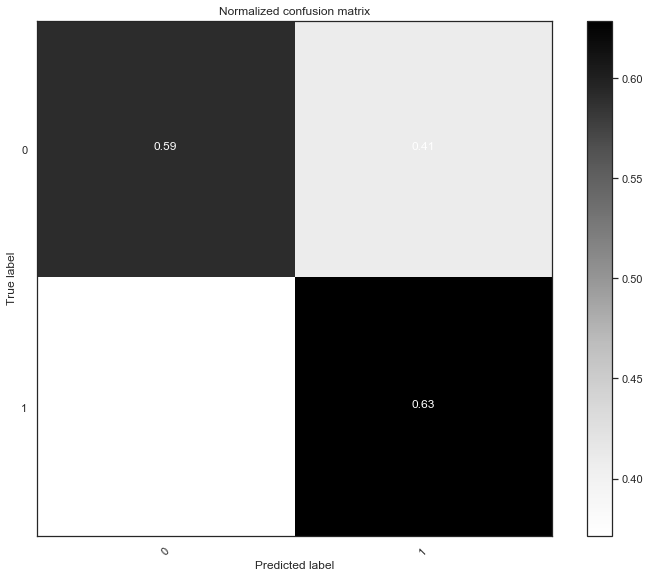

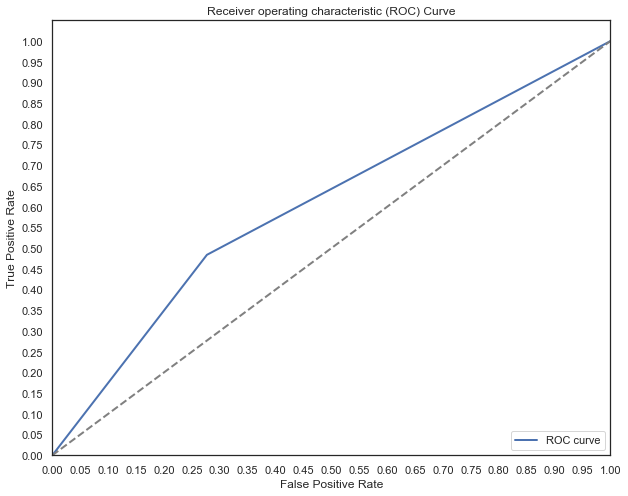

In [320]:
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)
train_score = accuracy_score(y_train, train_preds)
test_score = accuracy_score(y_test, test_preds)
print(pipe)
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(train_score, test_score))
print("")
print('-'*70)
print("")
print(metrics.classification_report(y_test, test_preds))
print("")
print('-'*70)
print("")
cnf_matrix = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=list(set(y_train)), normalize=True,
                  title='Normalized confusion matrix')

fpr, tpr, thresholds = roc_curve(y_test.astype('int'), test_preds.astype('int'))
print('AUC:', auc(fpr, tpr))
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")


plt.show()

From gridsearch, the model with best performance resulted in a test accuracy of 61%; however this deviates significantly from the training accuracy of 98%, likely due to overfitting.

### NLP with Neural Networks (WIP)

At the time of this project, Neural Networks had yet to be covered. I plan to update this section to include a classification with deep learning.

#### Classification

## Conclusion